In [24]:
!python -m pip install texlive texlive-latex-extra texlive-fonts-recommended dvipng

ERROR: Could not find a version that satisfies the requirement texlive (from versions: none)
ERROR: No matching distribution found for texlive
You should consider upgrading via the 'c:\Users\lenovo\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [25]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [26]:
import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
%matplotlib inline

# Useful for running matplotlib on high-dpi displays
%config InlineBackend.figure_format='retina'

In [27]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [28]:
data = pd.read_csv("telecom_churn.csv")

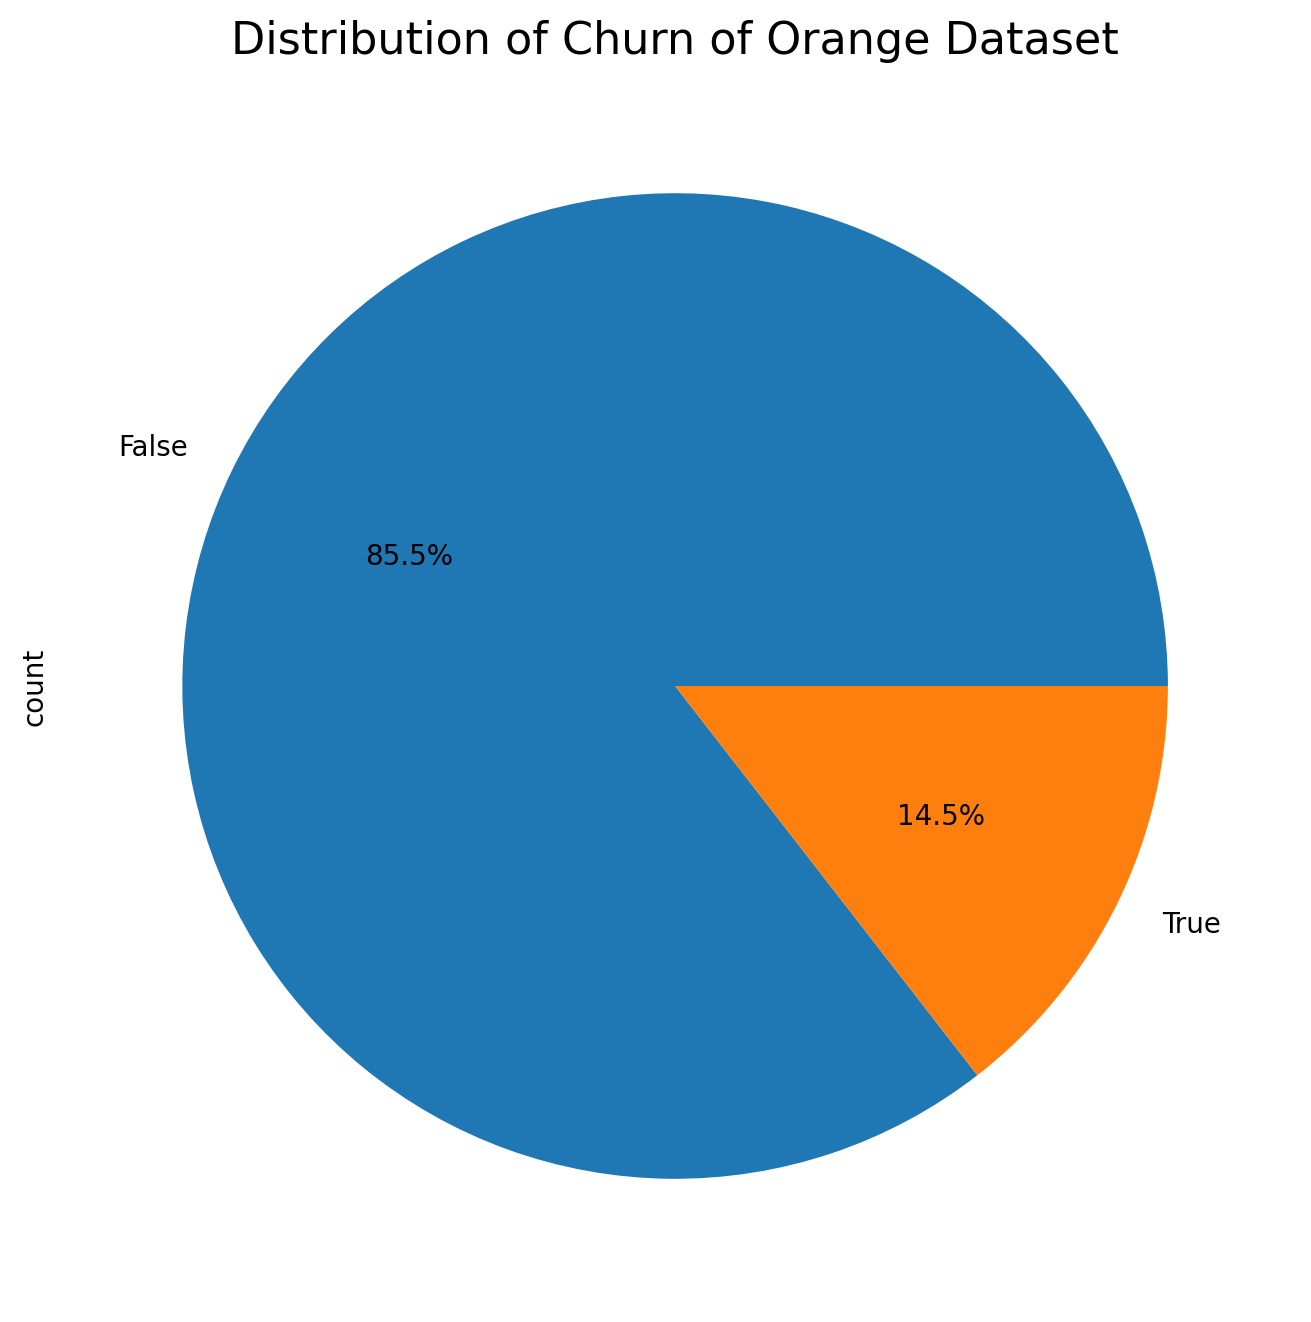

In [29]:
plt.figure(figsize=(10, 8))
data['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Churn of Orange Dataset', fontsize=16)
plt.show()


In [30]:
# Display the first few rows and general info about the dataset
data_info = data.info()
data_head = data.head()
data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

(None,
   State  Account length  Area code International plan Voice mail plan  \
 0    KS             128        415                 No             Yes   
 1    OH             107        415                 No             Yes   
 2    NJ             137        415                 No              No   
 3    OH              84        408                Yes              No   
 4    OK              75        415                Yes              No   
 
    Number vmail messages  Total day minutes  Total day calls  \
 0                     25              265.1              110   
 1                     26              161.6              123   
 2                      0              243.4              114   
 3                      0              299.4               71   
 4                      0              166.7              113   
 
    Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
 0             45.07              197.4               99             16.78   

## Change data format

In [31]:
# Original:
data.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [32]:
# Convert the "Area code" column to a categorical type
data['Area code'] = data['Area code'].astype('object')

# Verify the conversion by checking the data types again
data.dtypes

State                      object
Account length              int64
Area code                  object
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

## Numerical summary

In [33]:
# Summary statistics for numerical columns in the DataFrame
numerical_summary = data.describe().round(2)

# Display the summary statistics
numerical_summary

Account length  Number vmail messages  Total day minutes  \
count         3333.00                3333.00            3333.00   
mean           101.06                   8.10             179.78   
std             39.82                  13.69              54.47   
min              1.00                   0.00               0.00   
25%             74.00                   0.00             143.70   
50%            101.00                   0.00             179.40   
75%            127.00                  20.00             216.40   
max            243.00                  51.00             350.80   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count          3333.00           3333.00            3333.00          3333.00   
mean            100.44             30.56             200.98           100.11   
std              20.07              9.26              50.71            19.92   
min               0.00              0.00               0.00             0.00   
25%              87.00             24.43             166.60            87.00   
50%             101.00             30.50             201.40           100.00   
75%             114.00             36.79             235.30           114.00   
max             165.00             59.64             363.70           170.00   

       Total eve charge  Total night minutes  Total night calls  \
count           3333.00              3333.00            3333.00   
mean              17.08               200.87             100.11   
std                4.31                50.57              19.57   
min                0.00                23.20              33.00   
25%               14.16               167.00              87.00   
50%               17.12               201.20             100.00   
75%               20.00               235.30             113.00   
max               30.91               395.00             175.00   

       Total night charge  Total intl minutes  Total intl calls  \
count             3333.00             3333.00           3333.00   
mean                 9.04               10.24              4.48   
std                  2.28                2.79              2.46   
min                  1.04                0.00              0.00   
25%                  7.52                8.50              3.00   
50%                  9.05               10.30              4.00   
75%                 10.59               12.10              6.00   
max                 17.77               20.00             20.00   

       Total intl charge  Customer service calls  
count            3333.00                 3333.00  
mean                2.76                    1.56  
std                 0.75                    1.32  
min                 0.00                    0.00  
25%                 2.30                    1.00  
50%                 2.78                    1.00  
75%                 3.27                    2.00  
max                 5.40                    9.00

## Analyze distribution of Churn

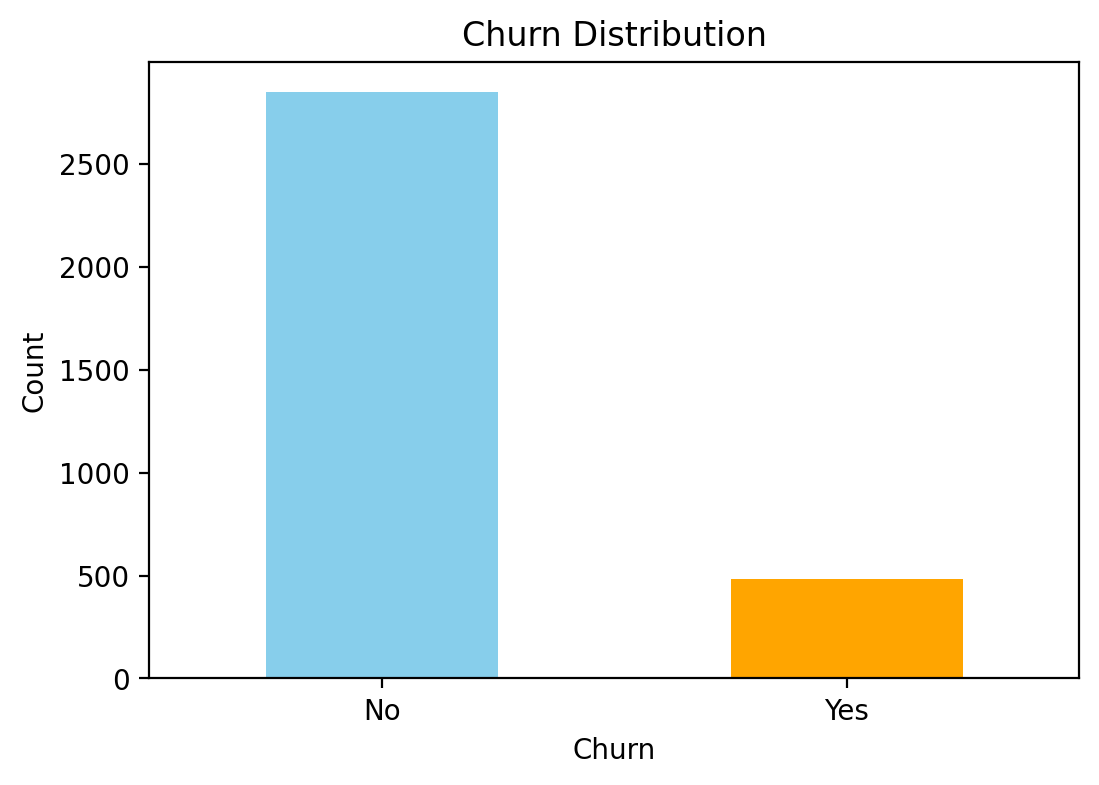

In [34]:
import matplotlib.pyplot as plt

# Churn distribution
churn_counts = data['Churn'].value_counts()

# Plot churn distribution
plt.figure(figsize=(6,4))
churn_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.show()


In [35]:
# Calculate churn rate
churn_rate = data['Churn'].mean() * 100  # Percentage

churn_rate


14.491449144914492

The churn rate in the dataset is approximately 14.49%. This means that around 14.5% of the customers in the dataset have discontinued their service with the company, while the remaining 85.5% have stayed. This relatively low churn rate indicates that most customers are retained, but a significant portion is still leaving. A churn rate of this magnitude may warrant a closer examination of the factors influencing customer attrition, as even a small churn rate can have substantial financial implications, especially for subscription-based businesses. Reducing churn by even a few percentage points can lead to significant improvements in revenue retention and customer lifetime value.

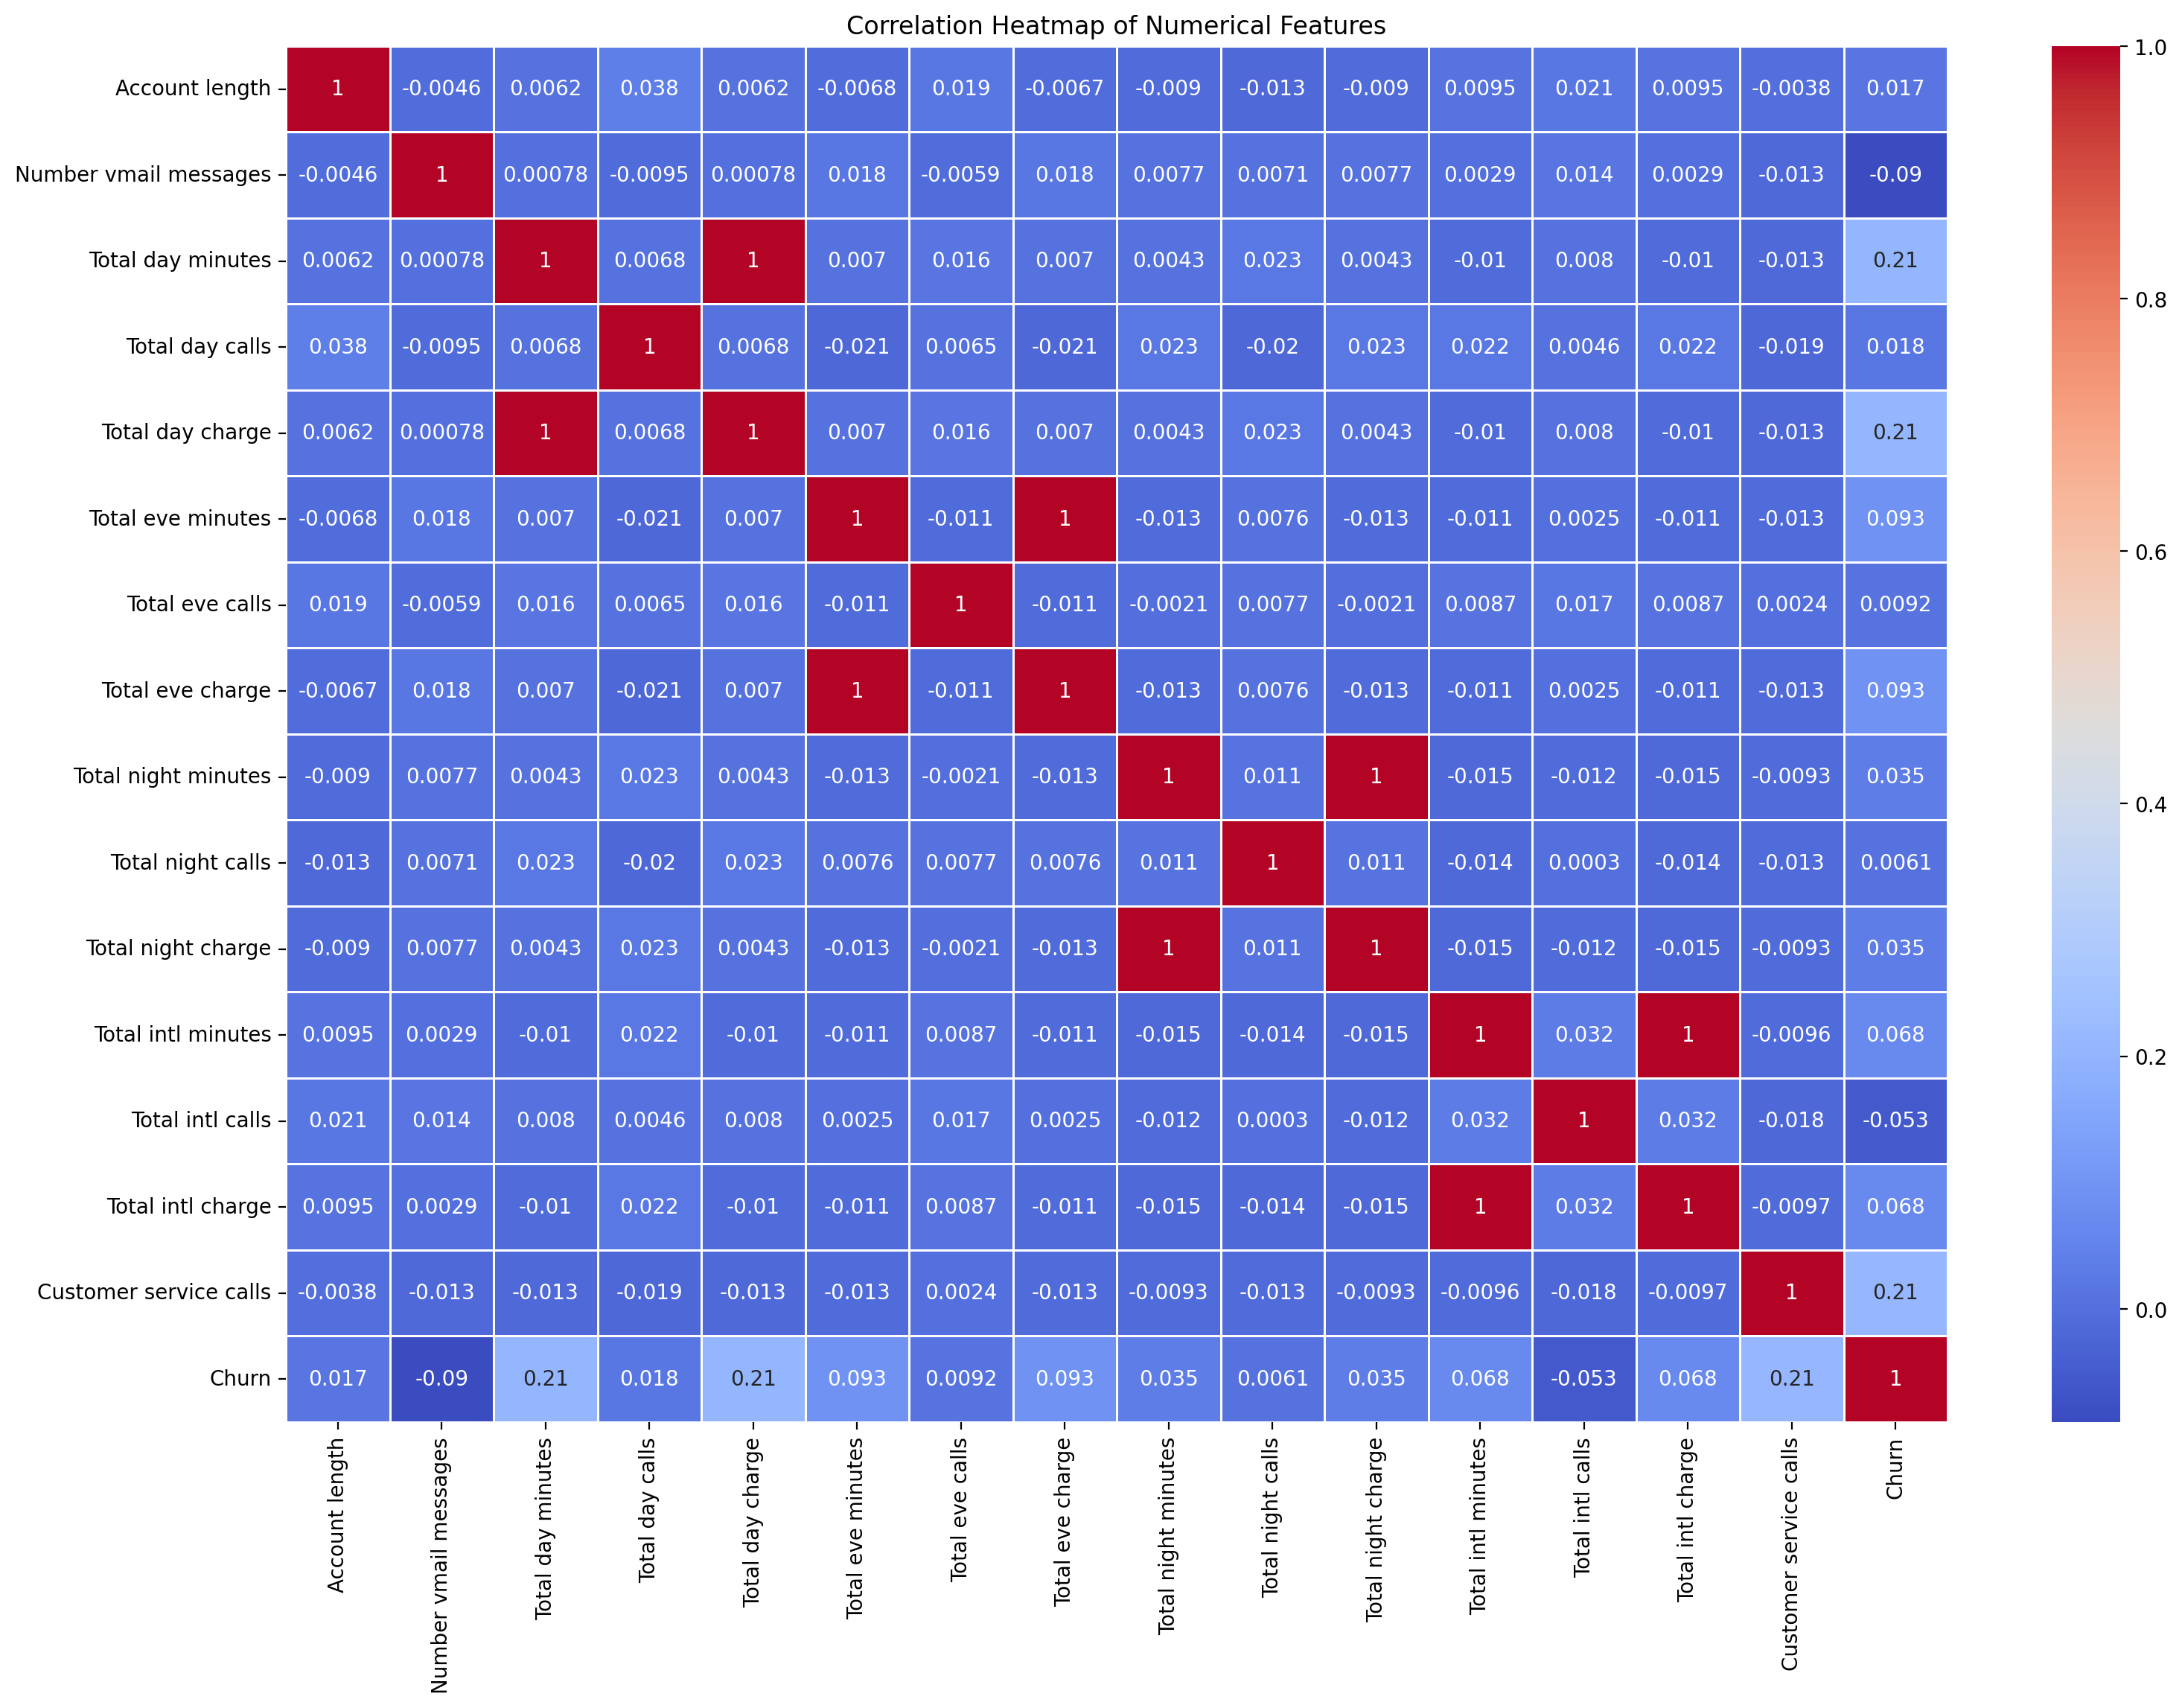

In [36]:
import seaborn as sns
# Selecting only numeric columns for correlation matrix
numeric_columns = data.select_dtypes(include=['float64', 'int64', 'bool'])

# Correlation matrix for numeric columns only
corr_matrix = numeric_columns.corr()

# Plot heatmap
# Plot heatmap with larger dimensions
plt.figure(figsize=(18,12))  # Increase the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


Charges and minutes are tightly linked, as expected, because charges are derived directly from the minutes used in various time periods (day, evening, night, and international). Therefore, these variables do not provide additional predictive information about churn beyond one another. The most notable correlation related to churn is the number of customer service calls, with a moderate positive correlation of approximately 0.21, indicating that customers who make more service calls are more likely to churn. This suggests that frequent interactions with customer service, possibly due to dissatisfaction or issues, may lead to churn. Conversely, usage patterns, including the total number of minutes spent on calls during different times of the day, show little to no correlation with churn, meaning that the amount of service usage is not a strong predictor of whether a customer will leave. Additionally, account length shows a weak negative correlation with churn, implying that customers with longer relationships with the company are slightly less likely to churn, but this effect is minimal. Overall, customer dissatisfaction, reflected through service call frequency, may be a more significant driver of churn than usage behavior.

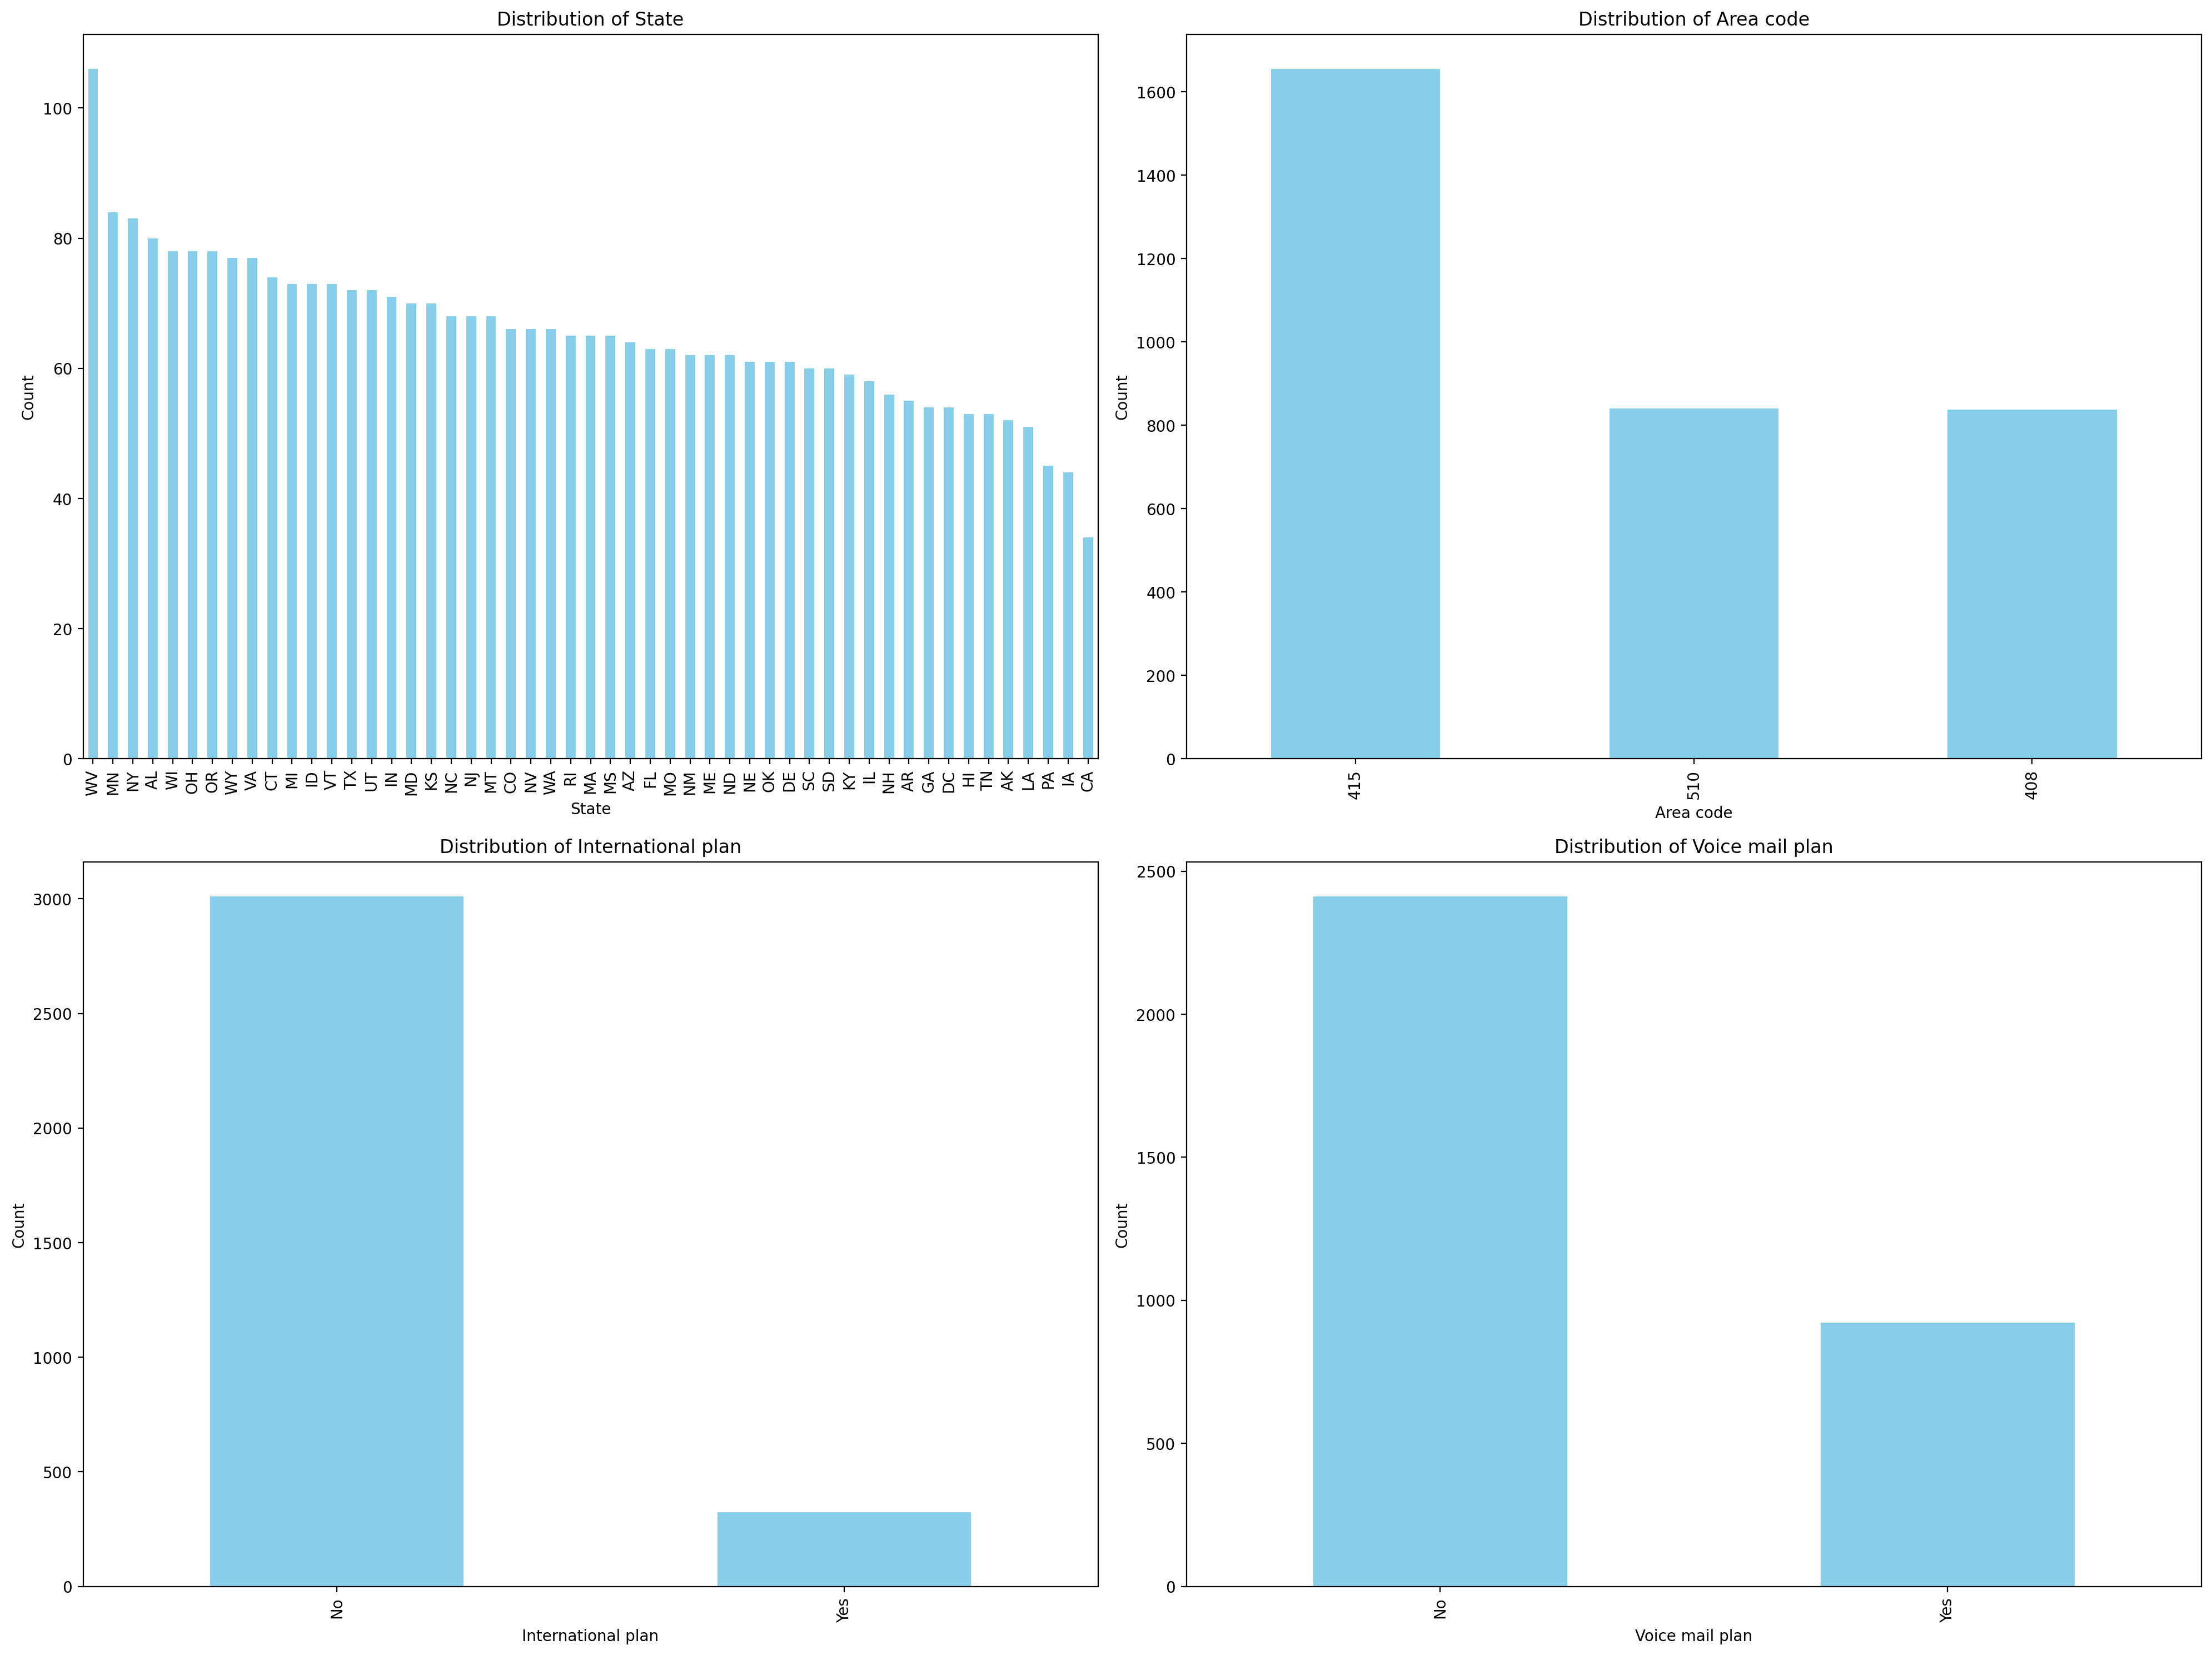

In [37]:
# Distribution of categorical columns
# Plot distribution of categorical columns
categorical_columns = ['State', 'Area code', 'International plan', 'Voice mail plan']
plt.figure(figsize=(20,15))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    data[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


The categorical columns exhibit varying degrees of imbalance. Features like the International plan and Voice mail plan show a strong preference for the "No" option, indicating that most customers do not opt for these services. The churn distribution is also imbalanced, with most customers remaining loyal, but the presence of churned customers highlights areas that need further analysis. The even distribution across State and Area code suggests that the customer base is geographically diverse with no clear regional concentration.

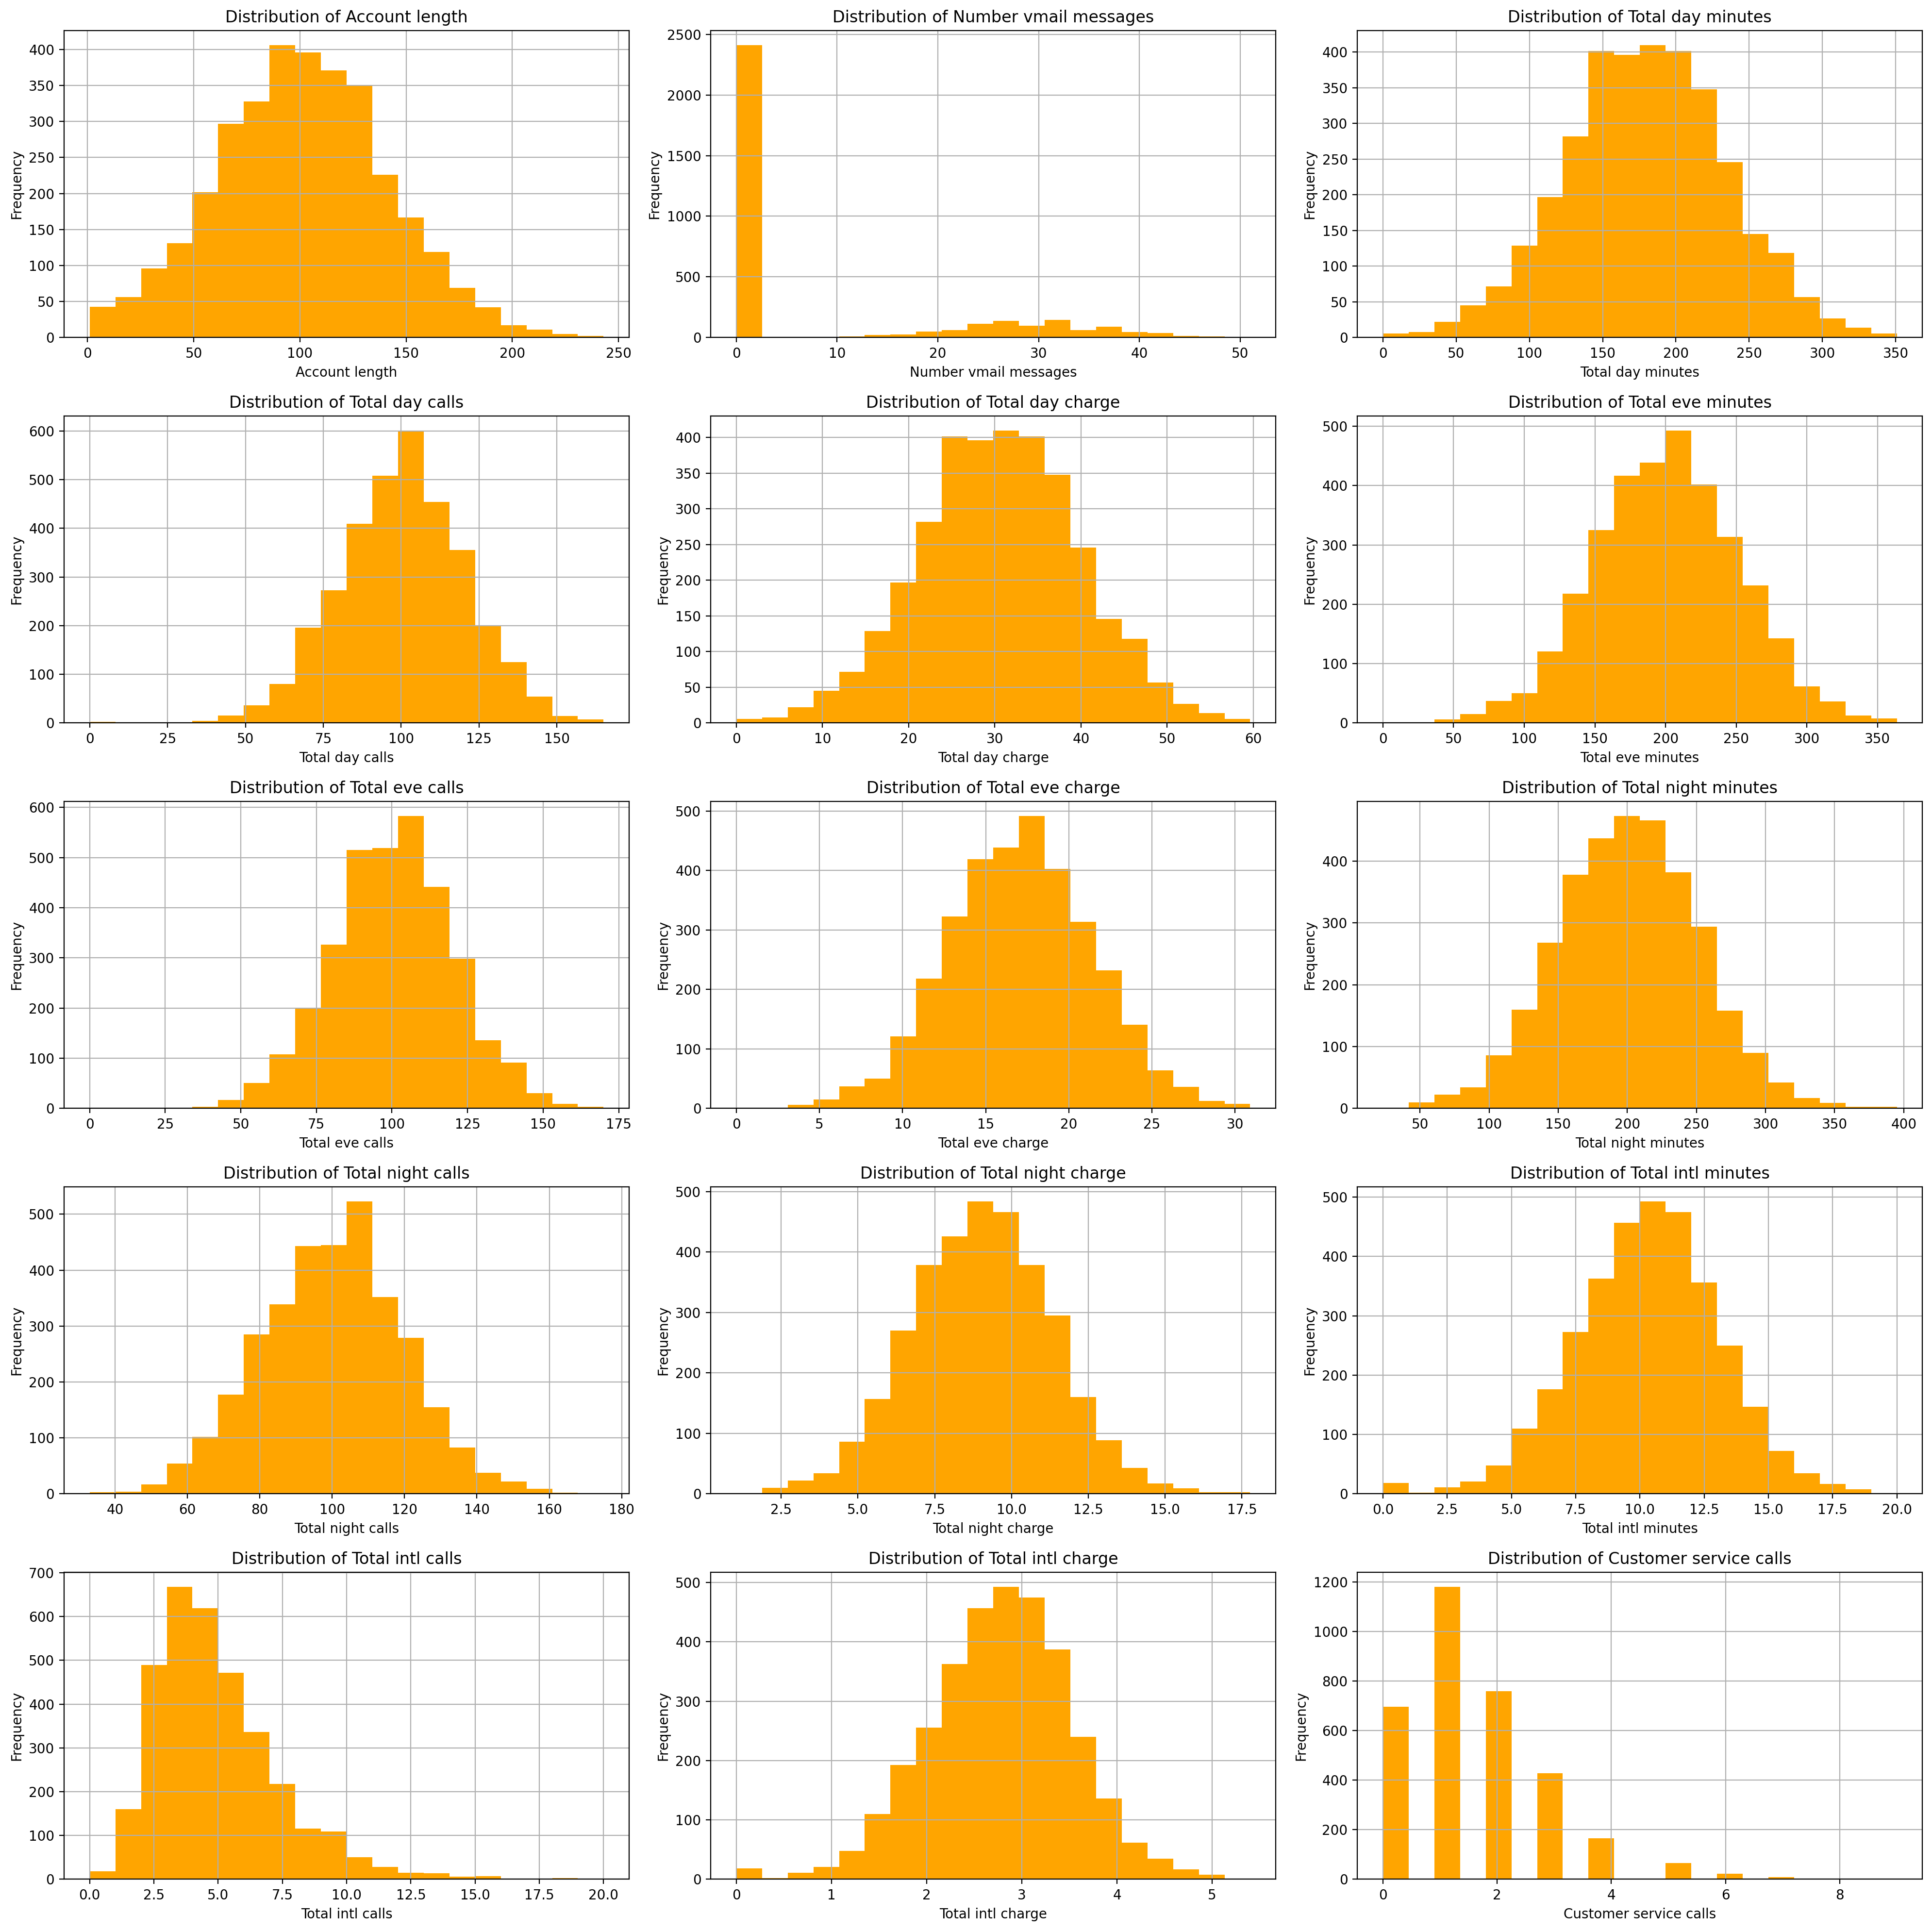

In [38]:
# Plot distribution of numerical columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
plt.figure(figsize=(20,20))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(5, 3, i)
    data[col].hist(bins=20, color='orange')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


\begin{itemize}
    \item \textbf{Account Length}: The distribution of account length is fairly spread out, with a slight skew towards shorter account lengths. This suggests that most customers have been with the company for a moderate period, with fewer customers having very long-standing accounts.
    
    \item \textbf{Number of Voicemail Messages}: The majority of customers have zero voicemail messages, as seen by a significant spike at zero. This aligns with the observation that most customers do not subscribe to a voicemail plan. Very few customers have a high number of voicemail messages.
    
    \item \textbf{Total Day Minutes, Total Eve Minutes, Total Night Minutes, Total International Minutes}: These columns show a roughly normal distribution (bell-shaped), with most customers using a moderate amount of minutes. A few outliers represent customers with very high usage.
    
    \item \textbf{Total Day Calls, Total Eve Calls, Total Night Calls, Total International Calls}: The number of calls is distributed quite uniformly across these columns. Most customers make a moderate number of calls, with fewer customers making very high or very low numbers of calls.
    
    \item \textbf{Total Day Charge, Total Eve Charge, Total Night Charge, Total International Charge}: The distributions for these charges mirror the distributions for the corresponding minutes (day, evening, night, and international) because charges are directly derived from the number of minutes used. These are also close to normal, with a few outliers representing higher charges.
    
    \item \textbf{Customer Service Calls}: The distribution of customer service calls is heavily skewed towards zero, meaning most customers rarely contact customer service. A small portion of customers, however, have made multiple service calls, which may suggest dissatisfaction and a higher risk of churn.
\end{itemize}

\subsection*{Summary}
Most of the numerical columns (such as minutes, calls, and charges) follow a normal distribution, with most customers using a moderate amount of services. A few outliers, representing high usage or high charges, may either be high-value customers or those at risk of churn. Voicemail messages and customer service calls are highly skewed, with most customers not using voicemail and few calling customer service frequently. The distribution of customer service calls could indicate potential dissatisfaction among those who call frequently.



State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


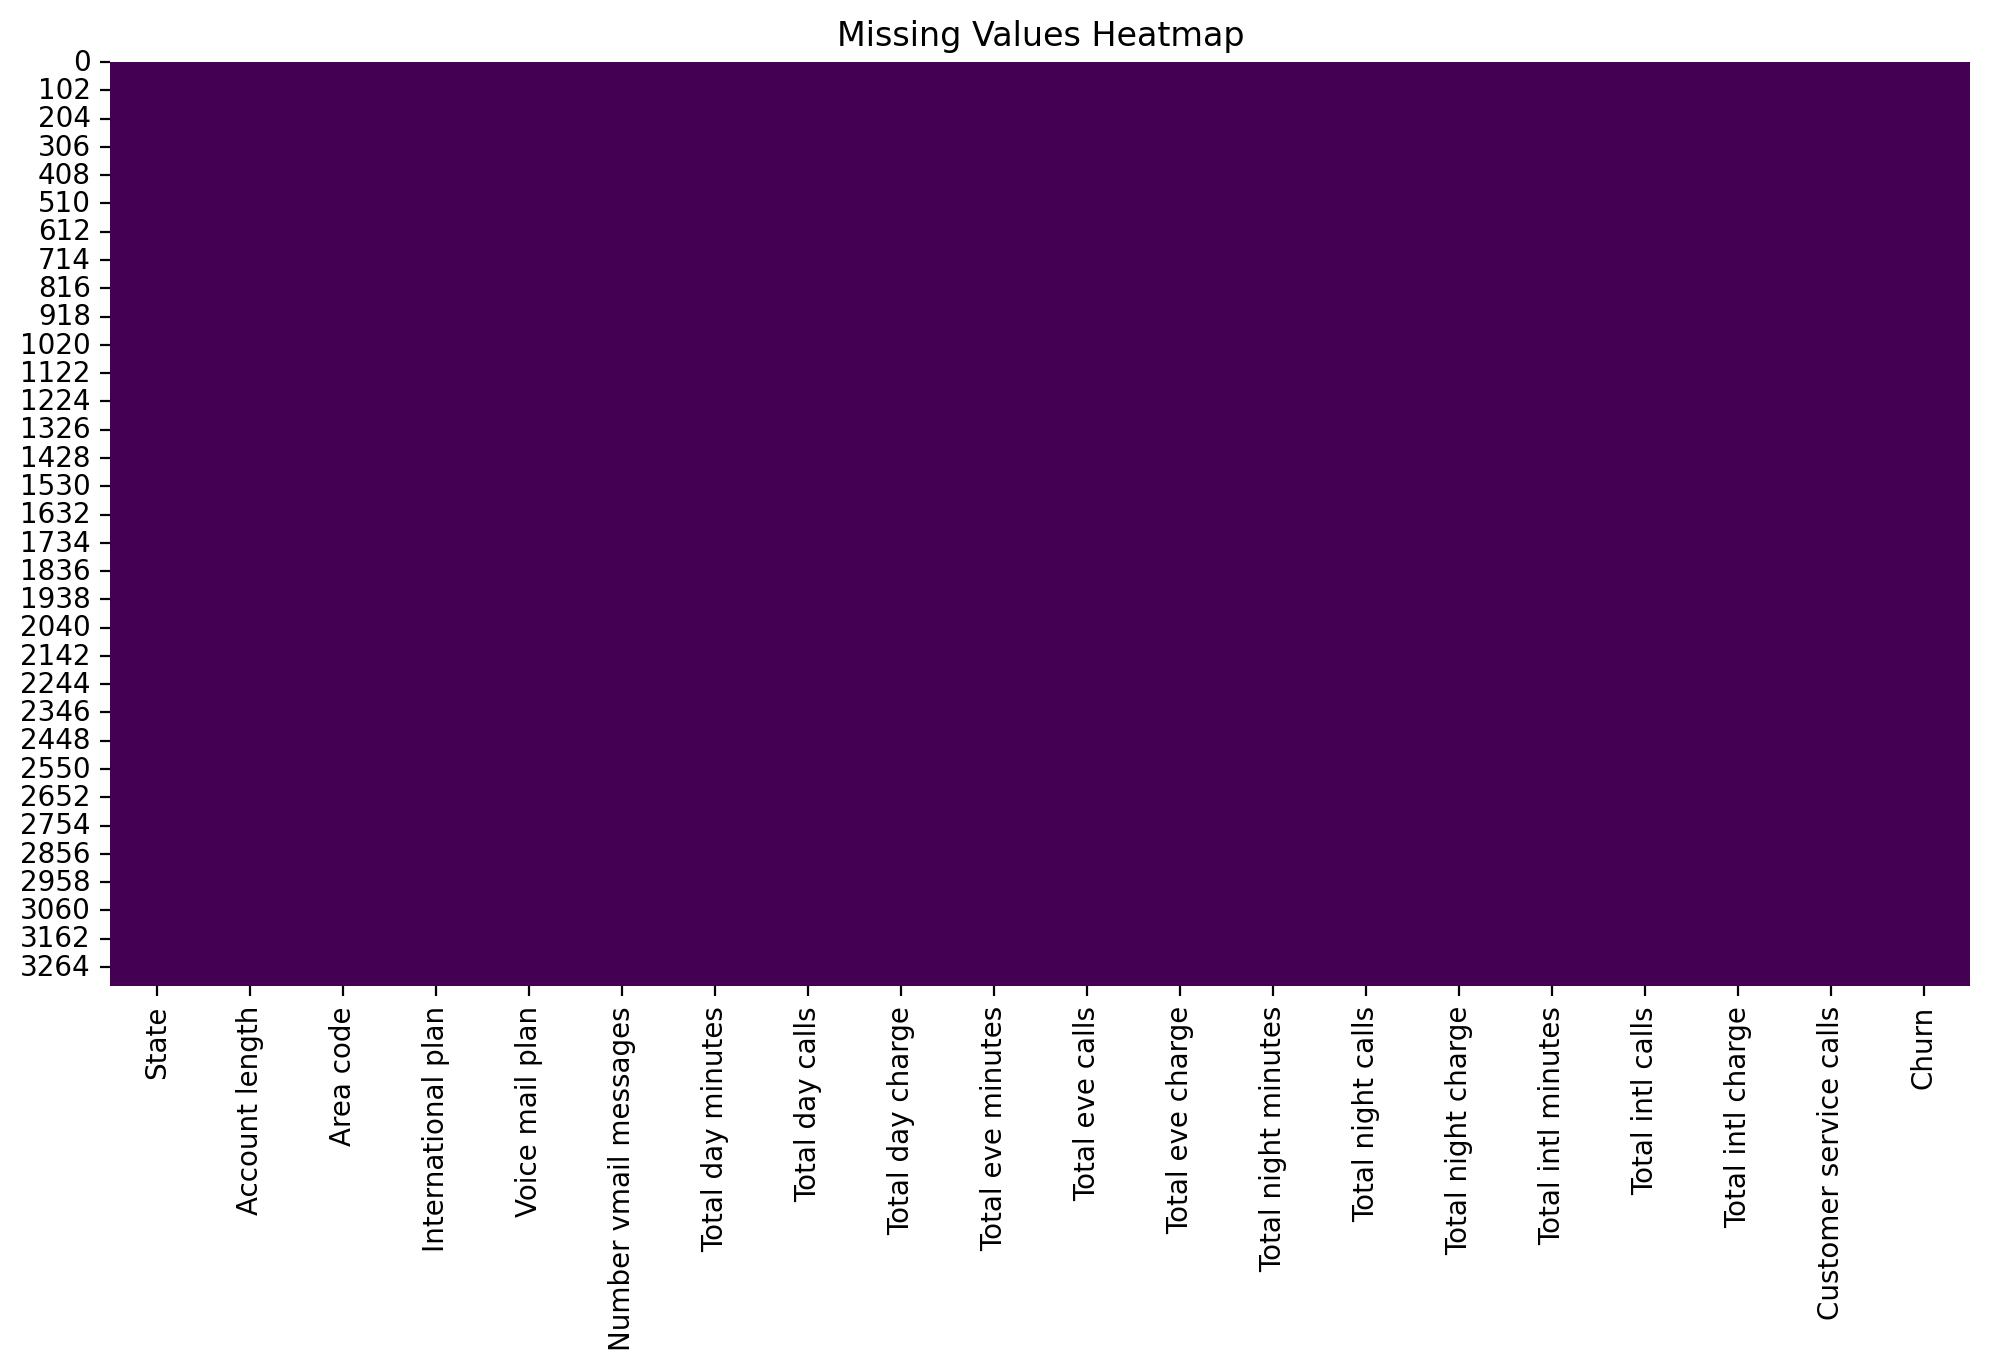

In [39]:
# Visualize missing values
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)
# Display columns with missing values
missing_values[missing_values > 0]

import seaborn as sns
import matplotlib.pyplot as plt

# Plot missing value heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

The heatmap indicates that there are no missing values in the dataset, as the entire grid is fully colored (showing no gaps). Additionally, the summary shows that there are no columns with missing values.

In [40]:
# Detect outlier

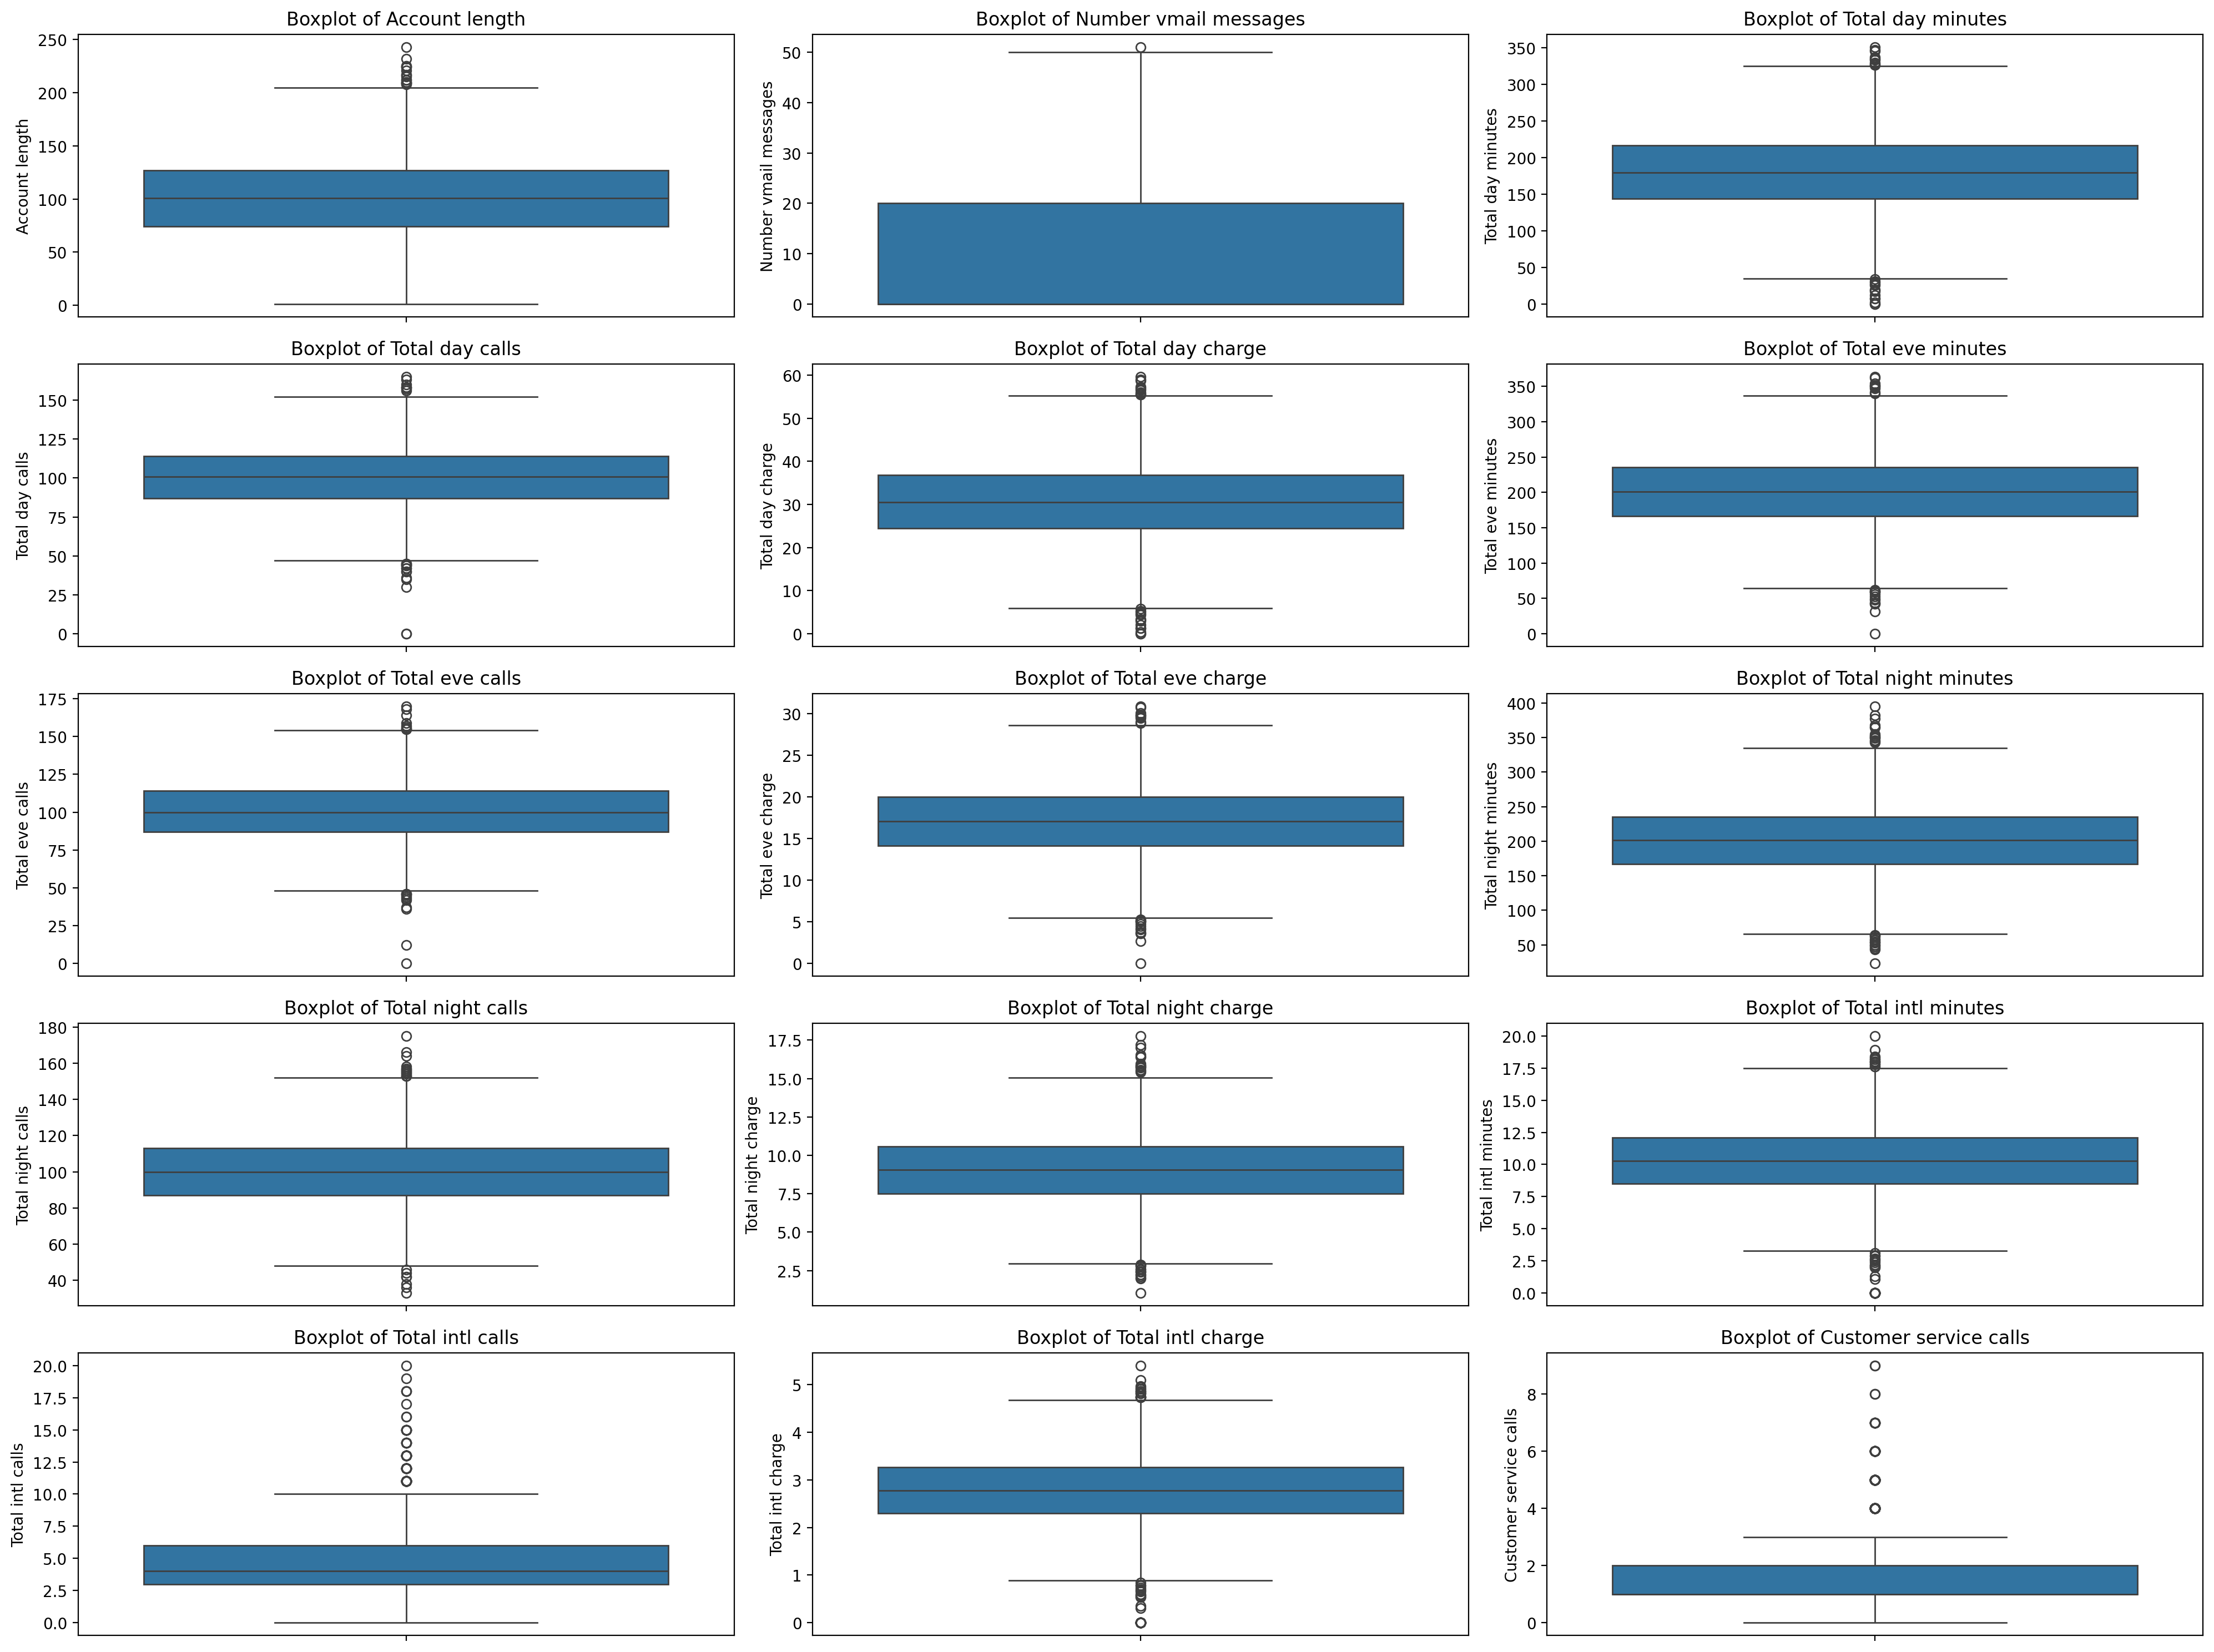

In [41]:
# Plot box plots to visualize outliers in numerical columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
plt.figure(figsize=(20,15))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
    
plt.tight_layout()
plt.show()


The box plots for the numerical columns reveal several insights about outliers in the dataset:

    For columns such as Total day minutes, Total eve minutes, Total night minutes, and their corresponding charges, there are a few noticeable outliers beyond the whiskers. These likely represent customers with unusually high usage or charges.
    In the Customer service calls column, there are a few clear outliers, where most customers made between 0 to 3 service calls, but some made many more.
    Number of voicemail messages also has outliers with very few customers having a high number of voicemail messages, while most have none.

In [42]:
# Finding outlier by Z-Score
from scipy import stats

# Calculate Z-scores for numerical columns
z_scores = np.abs(stats.zscore(data[numeric_columns]))

# Define a threshold to identify outliers (commonly 3 standard deviations)
outliers = np.where(z_scores > 3)

# Print out the indices of rows containing outliers
outlier_indices = np.unique(outliers[0])
outlier_indices


array([  22,   32,   41,   58,  115,  179,  182,  185,  219,  244,  272,
        301,  314,  329,  332,  343,  365,  377,  416,  468,  474,  483,
        488,  493,  504,  514,  522,  533,  542,  595,  636,  642,  646,
        674,  692,  694,  712,  721,  740,  756,  762,  778,  817,  821,
        837,  845,  854,  863,  878,  883,  889,  902,  908,  921,  922,
        957,  960,  974,  982,  985, 1021, 1028, 1052, 1080, 1092, 1113,
       1121, 1142, 1144, 1179, 1233, 1260, 1273, 1317, 1325, 1333, 1345,
       1355, 1392, 1397, 1400, 1407, 1408, 1419, 1445, 1502, 1551, 1564,
       1567, 1615, 1638, 1694, 1751, 1831, 1865, 1886, 1889, 1912, 1919,
       1986, 1989, 2001, 2212, 2223, 2269, 2288, 2321, 2327, 2331, 2345,
       2362, 2380, 2387, 2428, 2513, 2551, 2553, 2594, 2621, 2659, 2663,
       2669, 2703, 2716, 2732, 2733, 2736, 2753, 2775, 2786, 2835, 2887,
       2903, 2906, 2918, 2930, 2932, 2947, 2953, 2956, 2958, 2961, 2970,
       2979, 2988, 3025, 3026, 3071, 3081, 3107, 31

In [43]:
data = data.drop(outlier_indices)

In [44]:
data.reset_index(drop=True)

State  Account length Area code International plan Voice mail plan  \
0       KS             128       415                 No             Yes   
1       OH             107       415                 No             Yes   
2       NJ             137       415                 No              No   
3       OH              84       408                Yes              No   
4       OK              75       415                Yes              No   
...    ...             ...       ...                ...             ...   
3164    AZ             192       415                 No             Yes   
3165    WV              68       415                 No              No   
3166    RI              28       510                 No              No   
3167    CT             184       510                Yes              No   
3168    TN              74       415                 No             Yes   

      Number vmail messages  Total day minutes  Total day calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
3164                     36              156.2               77   
3165                      0              231.1               57   
3166                      0              180.8              109   
3167                      0              213.8              105   
3168                     25              234.4              113   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0                45.07              197.4               99             16.78   
1                27.47              195.5              103             16.62   
2                41.38              121.2              110             10.30   
3                50.90               61.9               88              5.26   
4                28.34              148.3              122             12.61   
...                ...                ...              ...               ...   
3164             26.55              215.5              126             18.32   
3165             39.29              153.4               55             13.04   
3166             30.74              288.8               58             24.55   
3167             36.35              159.6               84             13.57   
3168             39.85              265.9               82             22.60   

      Total night minutes  Total night calls  Total night charge  \
0                   244.7                 91               11.01   
1                   254.4                103               11.45   
2                   162.6                104                7.32   
3                   196.9                 89                8.86   
4                   186.9                121                8.41   
...                   ...                ...                 ...   
3164                279.1                 83               12.56   
3165                191.3                123                8.61   
3166                191.9                 91                8.64   
3167                139.2                137                6.26   
3168                241.4                 77               10.86   

      Total intl minutes  Total intl calls  Total intl charge  \
0                   10.0                 3               2.70   
1                   13.7                 3               3.70   
2                   12.2                 5               3.29   
3                    6.6                 7               1.78   
4                   10.1                 3               2.73   
...                  ...               ...                ...   
3164                 9.9                 6               2.67   
3

In [45]:
# Checking for duplicates in the dataset
duplicate_rows = data.duplicated()

# Display the number of duplicate rows
num_duplicates = duplicate_rows.sum()
num_duplicates


0

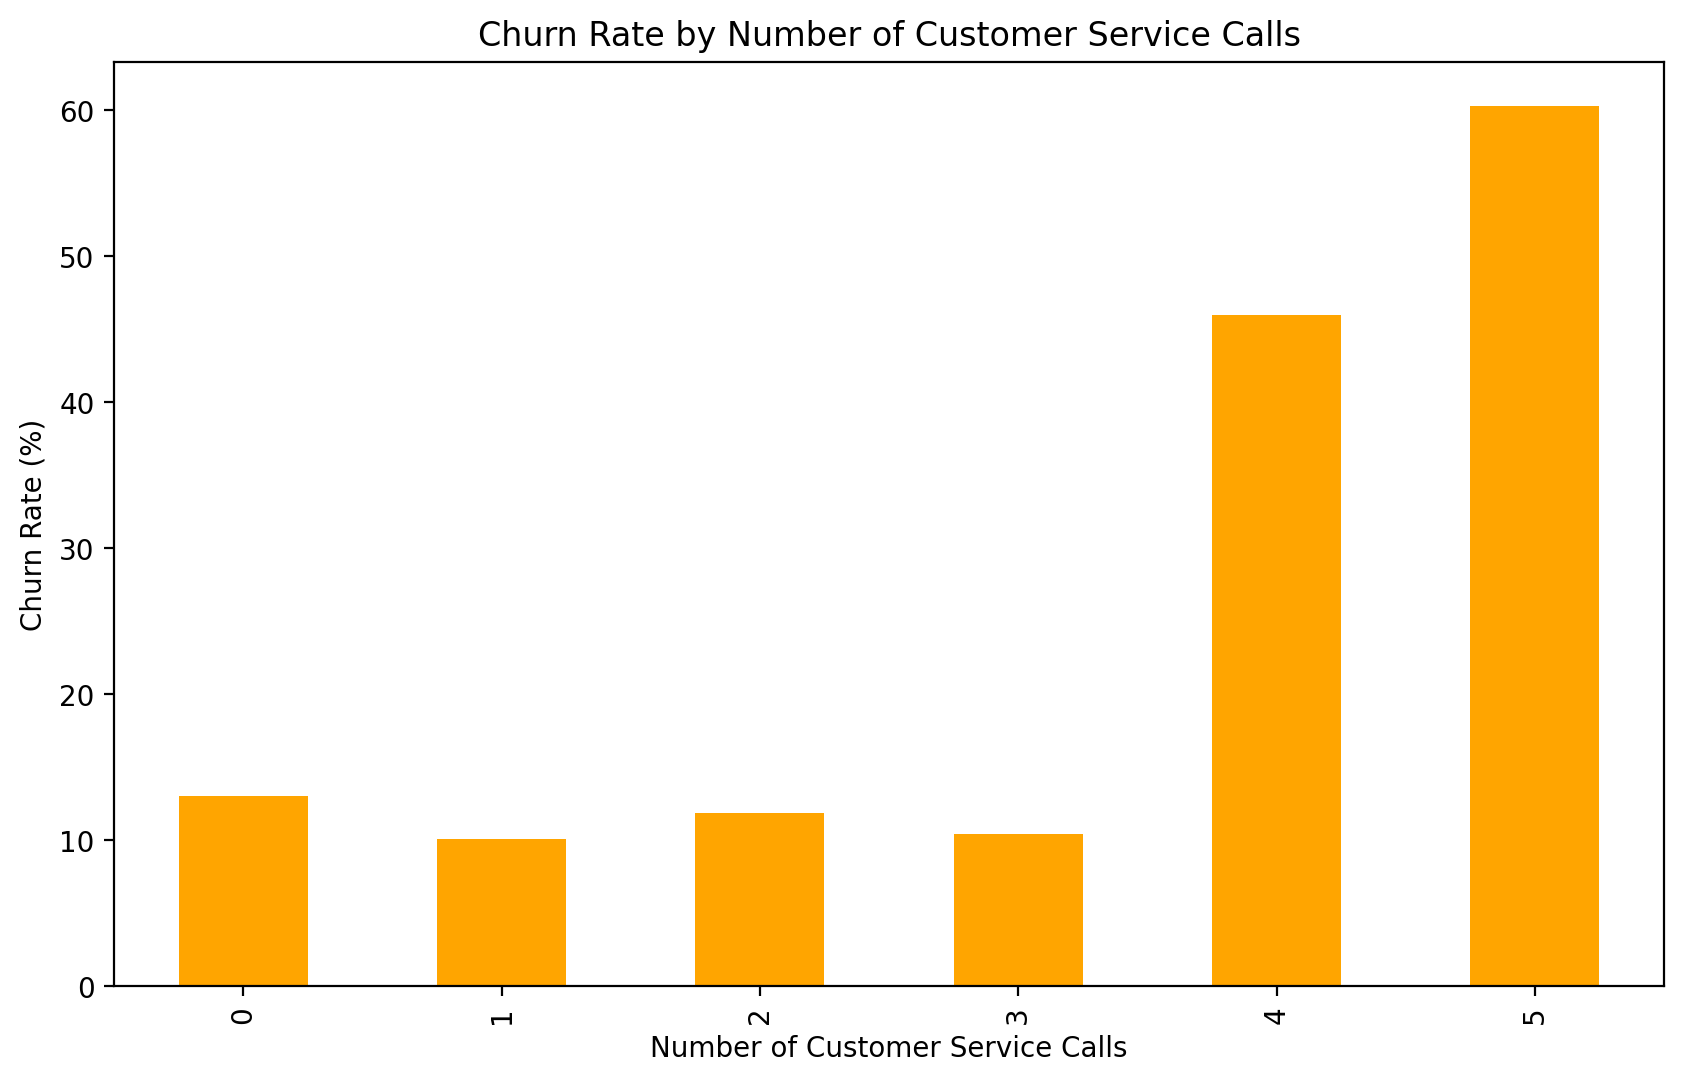

In [46]:
## Group data by number of customer service calls and calculate churn rate for each group
service_calls_churn = data.groupby('Customer service calls')['Churn'].mean() * 100

# Plot the churn rate against customer service calls
plt.figure(figsize=(10,6))
service_calls_churn.plot(kind='bar', color='orange')
plt.title('Churn Rate by Number of Customer Service Calls')
plt.xlabel('Number of Customer Service Calls')
plt.ylabel('Churn Rate (%)')
plt.show()


The bar chart shows the churn rate for different numbers of customer service calls. It indicates that as the number of customer service calls increases, the churn rate also tends to rise significantly.

    Customers who made very few or no customer service calls have a relatively low churn rate.
    However, those who made multiple calls (especially more than 3) show a noticeably higher churn rate.

This suggests that frequent interaction with customer service may be associated with dissatisfaction, leading to an increased likelihood of churn.

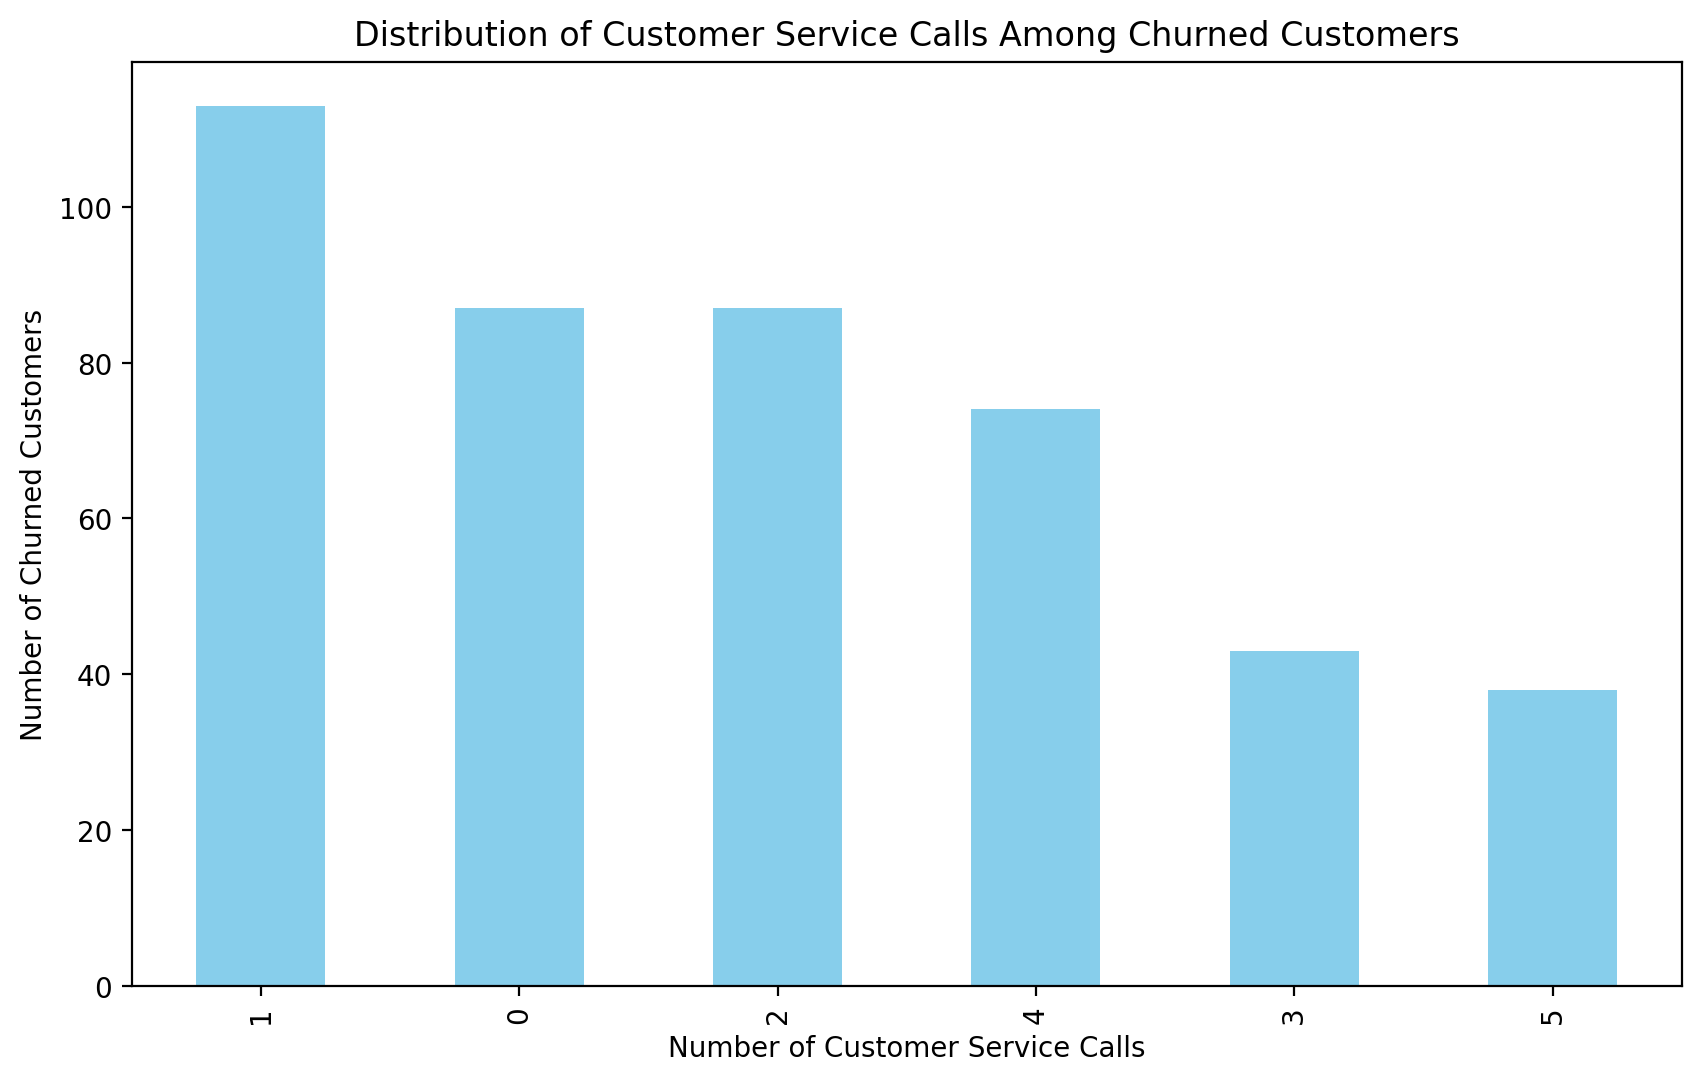

(1, 113)

In [47]:
# Filter the data to include only churned customers
churned_customers = data[data['Churn'] == True]

# Analyze the distribution of customer service calls among churned customers
churned_calls_distribution = churned_customers['Customer service calls'].value_counts()

# Plot the distribution
plt.figure(figsize=(10,6))
churned_calls_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Customer Service Calls Among Churned Customers')
plt.xlabel('Number of Customer Service Calls')
plt.ylabel('Number of Churned Customers')
plt.show()

# Return the most common number of customer service calls among churned customers
churned_calls_distribution.idxmax(), churned_calls_distribution.max()


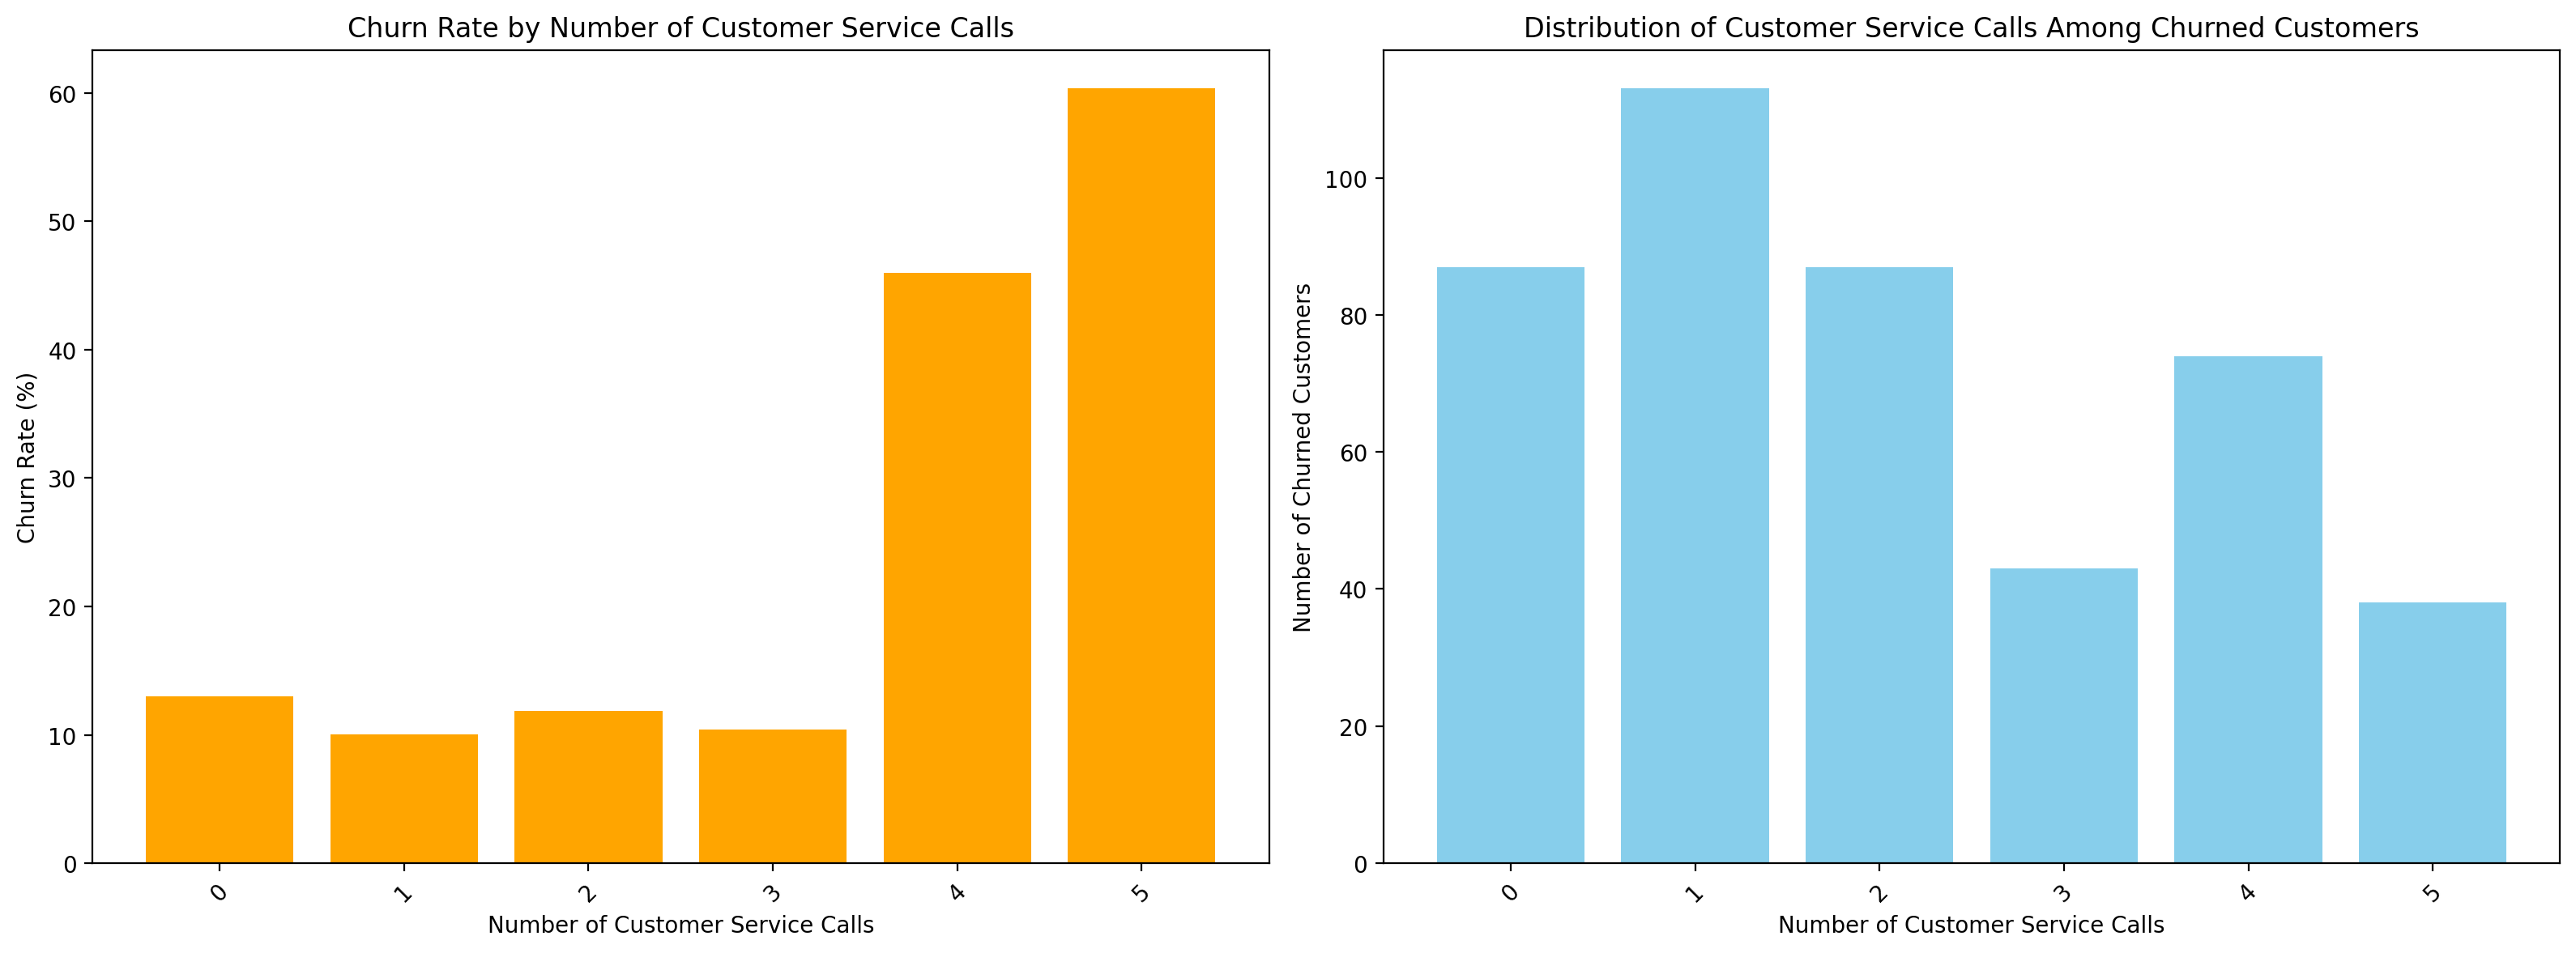

In [48]:
import matplotlib.pyplot as plt

# Group data by number of customer service calls and calculate churn rate for each group
service_calls_churn = data.groupby('Customer service calls')['Churn'].mean() * 100

# Filter the data to include only churned customers
churned_customers = data[data['Churn'] == True]

# Analyze the distribution of customer service calls among churned customers
churned_calls_distribution = churned_customers['Customer service calls'].value_counts()

# Create subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Churn rate by number of customer service calls
ax[0].bar(service_calls_churn.index, service_calls_churn, color='orange')
ax[0].set_title('Churn Rate by Number of Customer Service Calls')
ax[0].set_xlabel('Number of Customer Service Calls')
ax[0].set_ylabel('Churn Rate (%)')

# Set x-ticks for Plot 1 to ensure all values show
ax[0].set_xticks(service_calls_churn.index)
ax[0].set_xticklabels(service_calls_churn.index, rotation=45)

# Plot 2: Distribution of customer service calls among churned customers
ax[1].bar(churned_calls_distribution.index, churned_calls_distribution, color='skyblue')
ax[1].set_title('Distribution of Customer Service Calls Among Churned Customers')
ax[1].set_xlabel('Number of Customer Service Calls')
ax[1].set_ylabel('Number of Churned Customers')

# Set x-ticks for Plot 2 to ensure all values show
ax[1].set_xticks(churned_calls_distribution.index)
ax[1].set_xticklabels(churned_calls_distribution.index, rotation=45)

# Show the plots
plt.tight_layout()
plt.show()


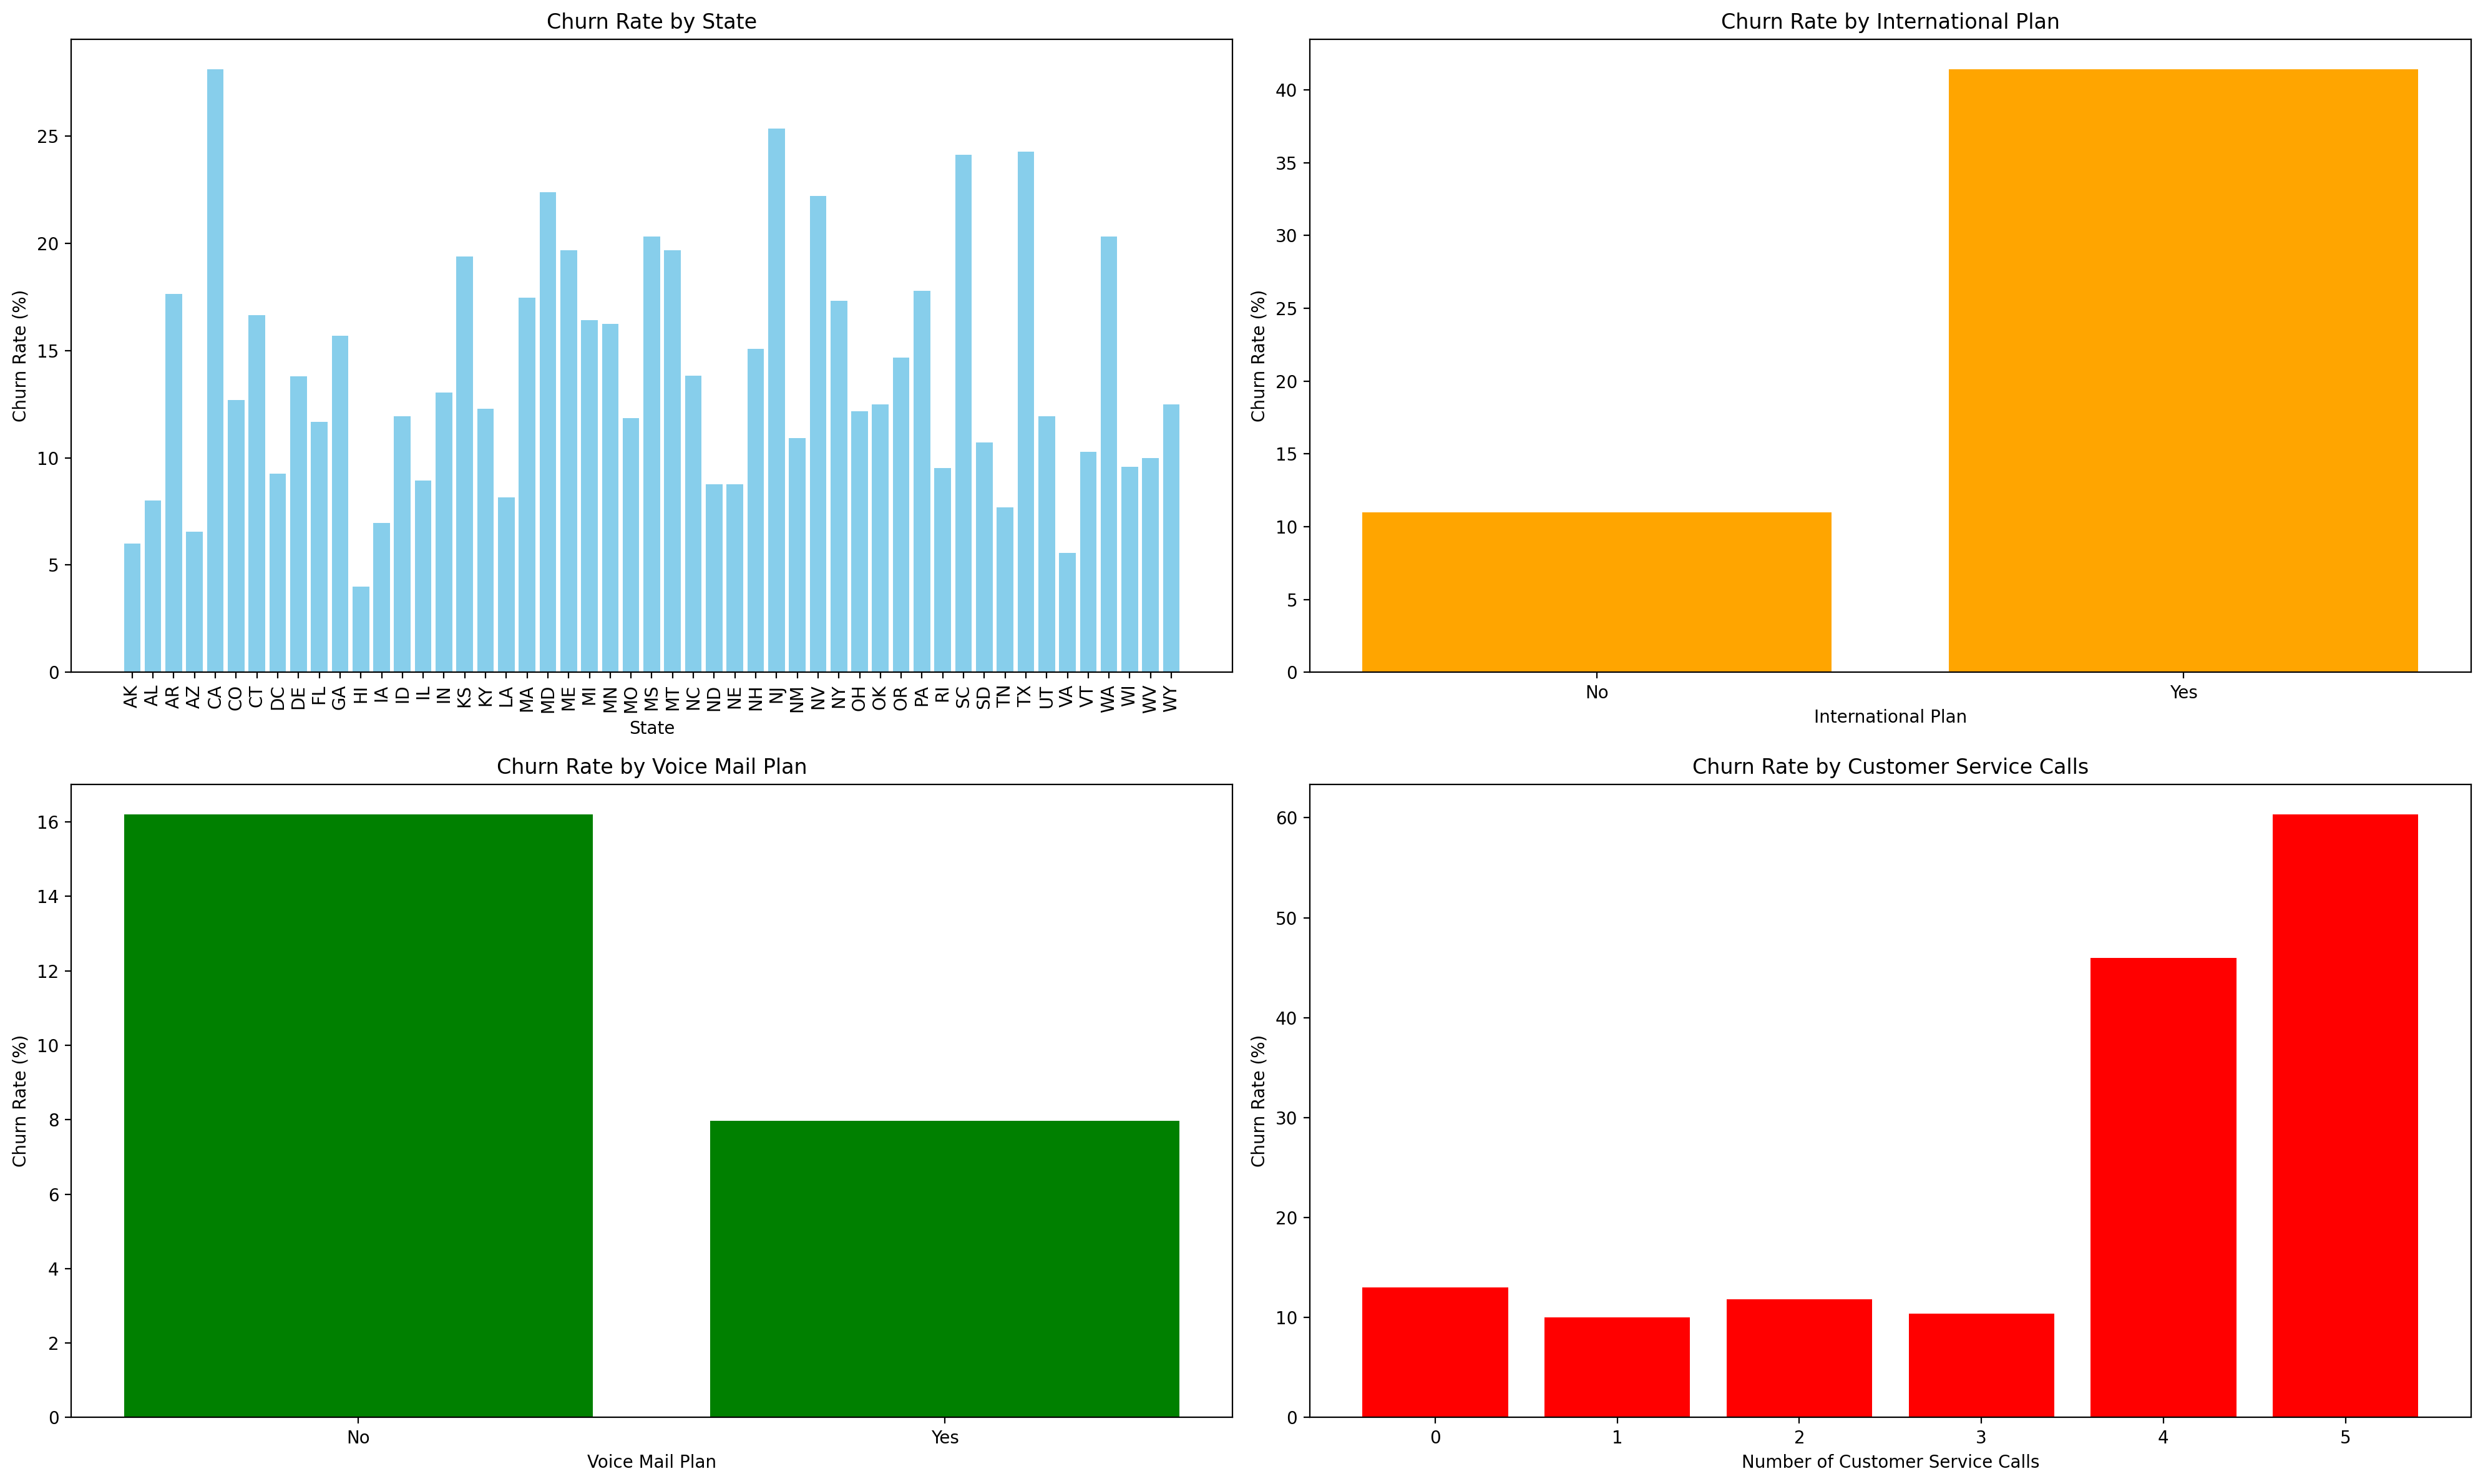

In [49]:
# Re-run the churn rate visualization across features

fig, axs = plt.subplots(2, 2, figsize=(20, 12))
# Calculate churn rate for each categorical feature and visualize

# Churn rate by State
state_churn_rate = data.groupby('State')['Churn'].mean() * 100

# Churn rate by International plan
intl_plan_churn_rate = data.groupby('International plan')['Churn'].mean() * 100

# Churn rate by Voice mail plan
vmail_plan_churn_rate = data.groupby('Voice mail plan')['Churn'].mean() * 100

# Churn rate by Customer service calls
service_calls_churn_rate = data.groupby('Customer service calls')['Churn'].mean() * 100

# Plotting churn rate across features

# # Plot churn rate by state
# axs[0, 0].bar(state_churn_rate.index, state_churn_rate, color='skyblue')
# axs[0, 0].set_title('Churn Rate by State')
# axs[0, 0].set_xlabel('State')
# axs[0, 0].set_ylabel('Churn Rate (%)')
# axs[0, 0].tick_params(axis='x', rotation=90)

# # Plot churn rate by international plan
# axs[0, 1].bar(intl_plan_churn_rate.index, intl_plan_churn_rate, color='orange')
# axs[0, 1].set_title('Churn Rate by International Plan')
# axs[0, 1].set_xlabel('International Plan')
# axs[0, 1].set_ylabel('Churn Rate (%)')

# # Plot churn rate by voice mail plan
# axs[1, 0].bar(vmail_plan_churn_rate.index, vmail_plan_churn_rate, color='green')
# axs[1, 0].set_title('Churn Rate by Voice Mail Plan')
# axs[1, 0].set_xlabel('Voice Mail Plan')
# axs[1, 0].set_ylabel('Churn Rate (%)')

# # Plot churn rate by customer service calls
# axs[1, 1].bar(service_calls_churn_rate.index, service_calls_churn_rate, color='red')
# axs[1, 1].set_title('Churn Rate by Customer Service Calls')
# axs[1, 1].set_xlabel('Number of Customer Service Calls')
# axs[1, 1].set_ylabel('Churn Rate (%)')

# plt.tight_layout()
# plt.show()

# Plot churn rate by state
axs[0, 0].bar(state_churn_rate.index, state_churn_rate, color='skyblue')
axs[0, 0].set_title('Churn Rate by State')
axs[0, 0].set_xlabel('State')
axs[0, 0].set_ylabel('Churn Rate (%)')
axs[0, 0].tick_params(axis='x', rotation=90)

# Plot churn rate by international plan
axs[0, 1].bar(intl_plan_churn_rate.index, intl_plan_churn_rate, color='orange')
axs[0, 1].set_title('Churn Rate by International Plan')
axs[0, 1].set_xlabel('International Plan')
axs[0, 1].set_ylabel('Churn Rate (%)')

# Plot churn rate by voice mail plan
axs[1, 0].bar(vmail_plan_churn_rate.index, vmail_plan_churn_rate, color='green')
axs[1, 0].set_title('Churn Rate by Voice Mail Plan')
axs[1, 0].set_xlabel('Voice Mail Plan')
axs[1, 0].set_ylabel('Churn Rate (%)')

# Plot churn rate by customer service calls
axs[1, 1].bar(service_calls_churn_rate.index, service_calls_churn_rate, color='red')
axs[1, 1].set_title('Churn Rate by Customer Service Calls')
axs[1, 1].set_xlabel('Number of Customer Service Calls')
axs[1, 1].set_ylabel('Churn Rate (%)')

plt.tight_layout()
plt.show()


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


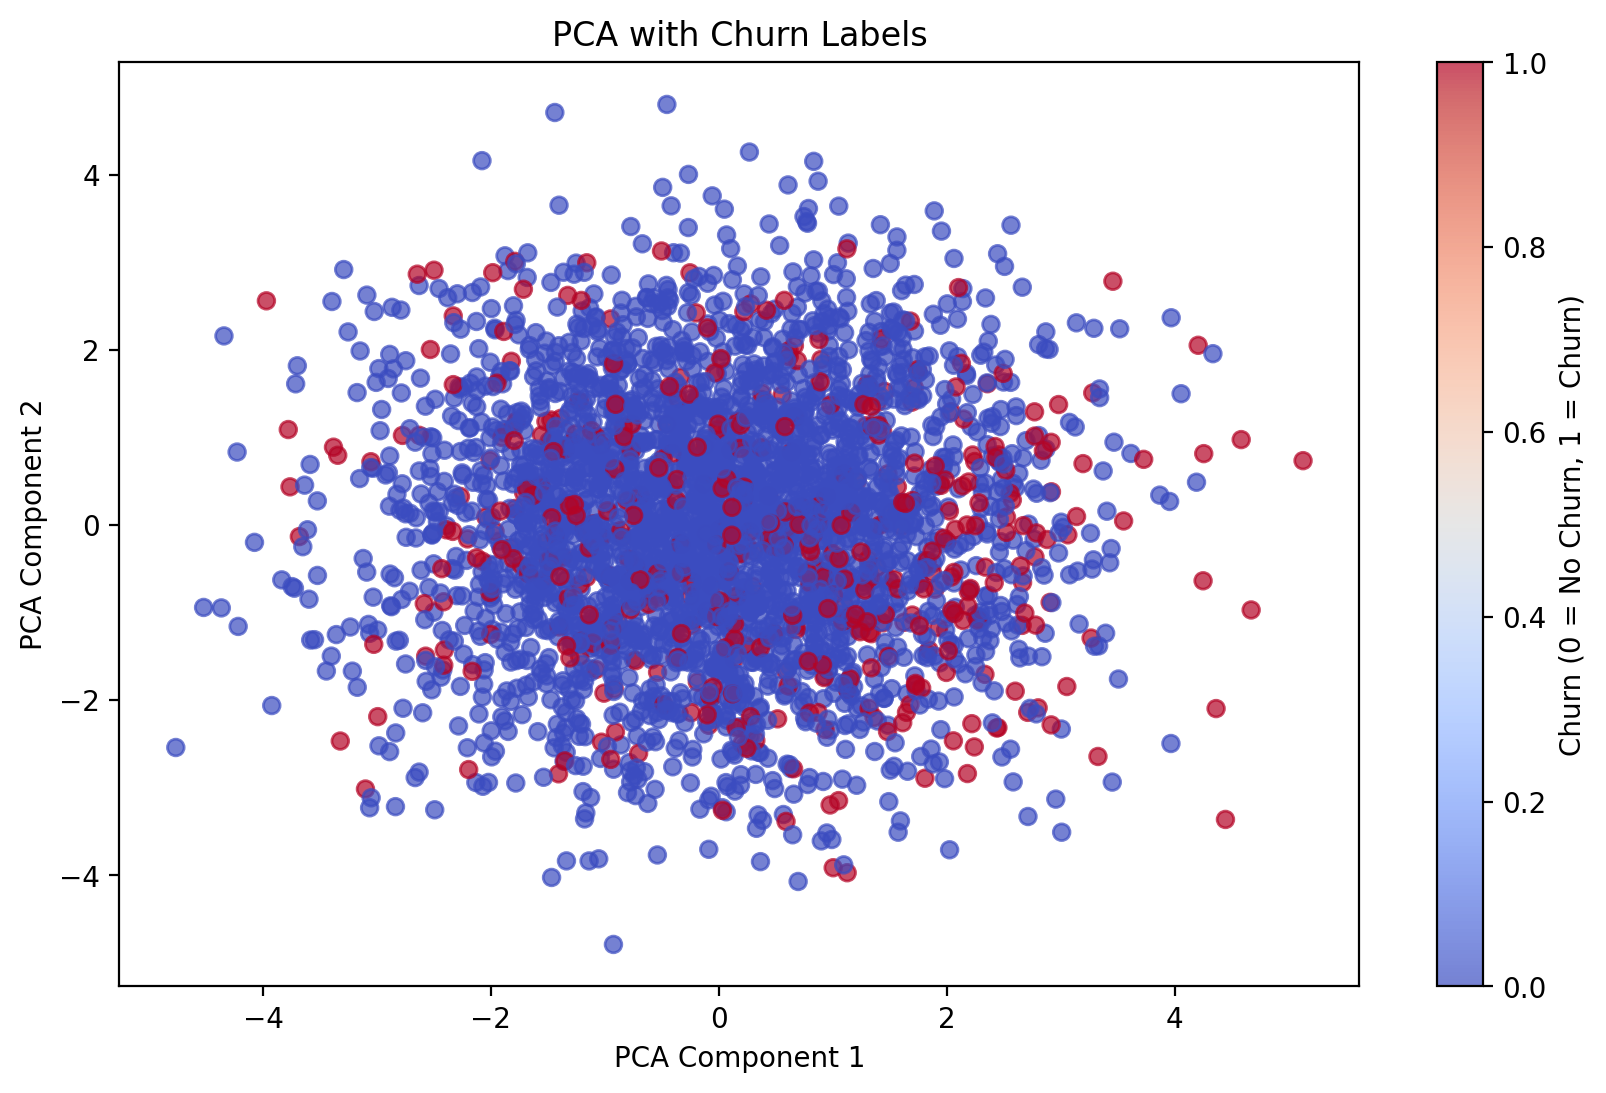

In [50]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Encode categorical features
data_encoded = data.copy()
label_encoders = {}

for col in ['State', 'International plan', 'Voice mail plan', 'Area code']:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Select all features (now encoded)
X_full = data_encoded.drop('Churn', axis=1)  # Drop churn because it's the target

# Scale the full feature set
scaler = StandardScaler()
X_scaled_full = scaler.fit_transform(X_full)

# Apply K-Means clustering
kmeans_full = KMeans(n_clusters=2, random_state=42)
clusters_full = kmeans_full.fit_predict(X_scaled_full)

# Add cluster labels to the original data
data_encoded['Cluster'] = clusters_full

# Visualize clusters using PCA (for 2D visualization)
pca_full = PCA(n_components=2)
X_pca_full = pca_full.fit_transform(X_scaled_full)

# plt.figure(figsize=(10,6))
# plt.scatter(X_pca_full[:, 0], X_pca_full[:, 1], c=clusters_full, cmap='viridis')
# plt.title('Customer Segmentation with K-Means (All Features)')
# plt.xlabel('PCA Component 1')
# plt.ylabel('PCA Component 2')
# plt.colorbar(label='Cluster')
# plt.show()
# Add churn labels to PCA visualization
plt.figure(figsize=(10,6))
plt.scatter(X_pca_full[:, 0], X_pca_full[:, 1], c=data_encoded['Churn'], cmap='coolwarm', alpha=0.7)
plt.title('PCA with Churn Labels')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Churn (0 = No Churn, 1 = Churn)')
plt.show()



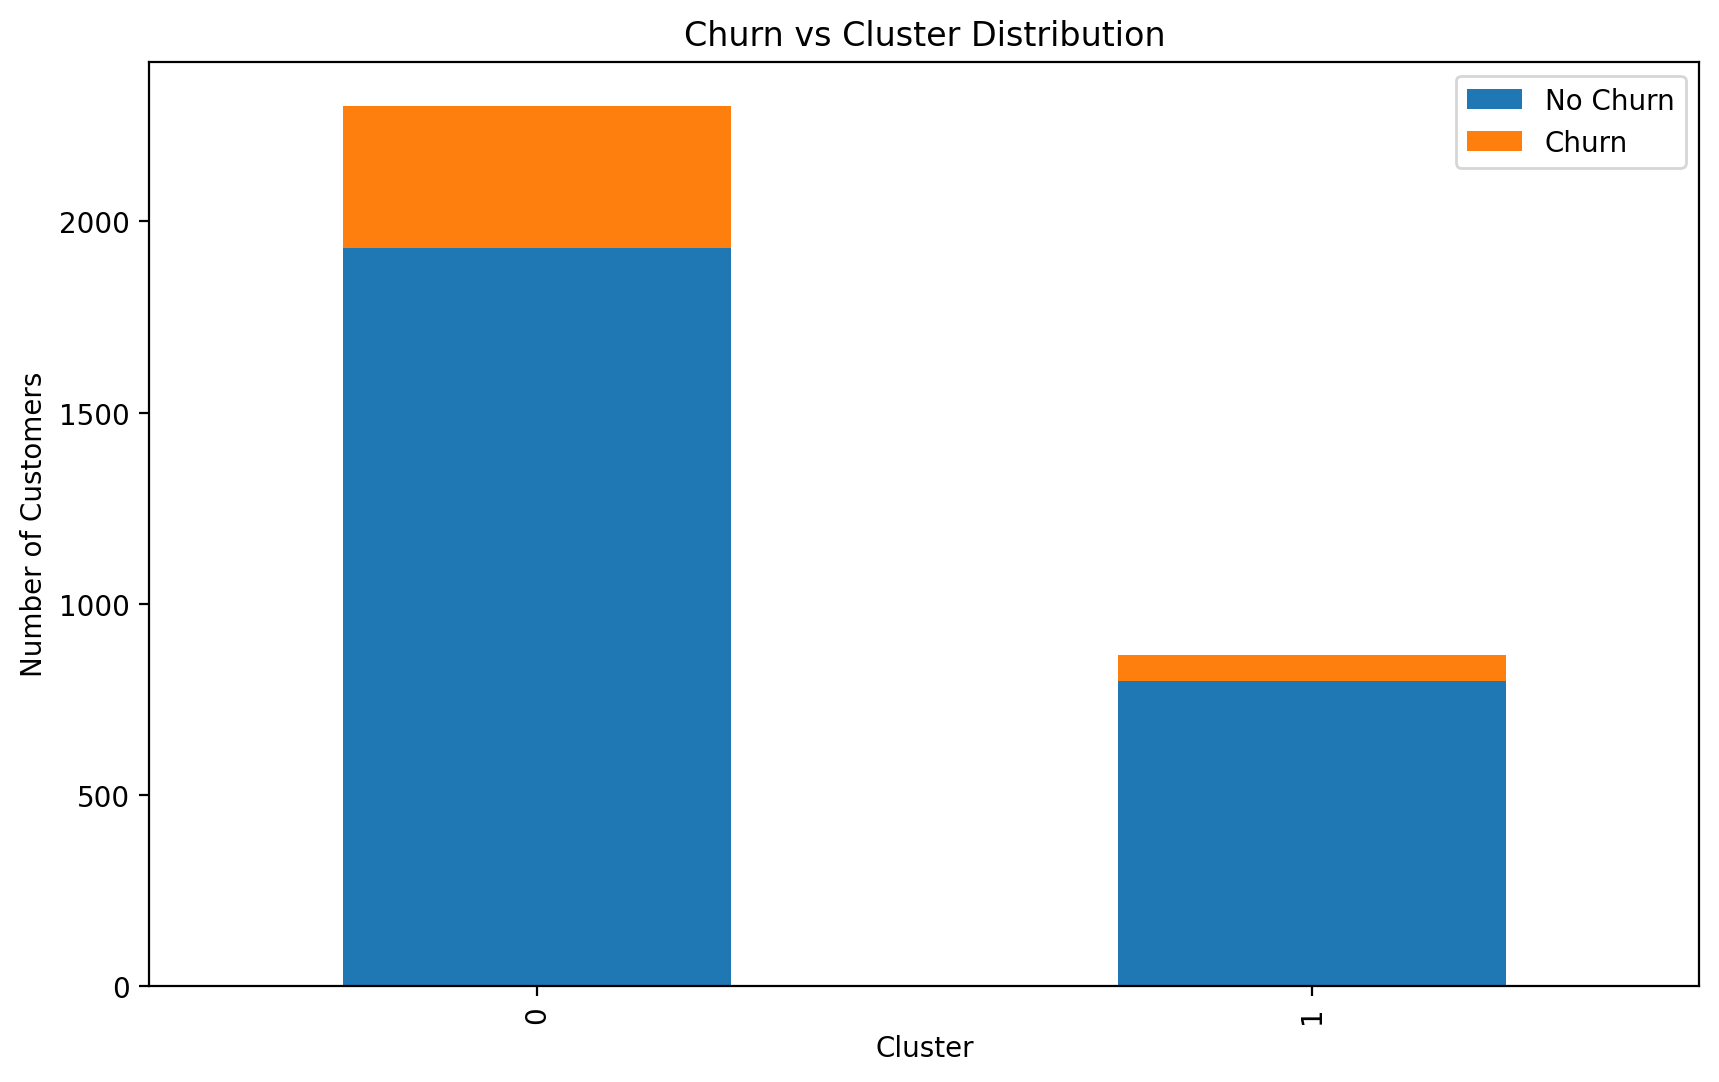

Churn    False  True 
Cluster              
0         1930    373
1          797     69

In [51]:
# Cross-tabulation to compare churn with clusters
churn_cluster_comparison = pd.crosstab(data_encoded['Cluster'], data['Churn'])

# Plot the comparison
churn_cluster_comparison.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Churn vs Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.legend(['No Churn', 'Churn'])
plt.show()
# Count the number of churned and non-churned customers in each cluster
churn_count_per_cluster = pd.crosstab(data_encoded['Cluster'], data_encoded['Churn'])

# Display the results
churn_count_per_cluster


In [52]:
data_encoded_full = data_encoded

In [53]:
# Group the data by cluster and calculate the mean of each feature
cluster_characteristics = data_encoded_full.groupby('Cluster').mean()

# Display the characteristics of each cluster
cluster_characteristics

State  Account length  Area code  International plan  \
Cluster                                                             
0        26.270083      100.574468   1.001737            0.096830   
1        25.307159      101.607390   1.011547            0.099307   

         Voice mail plan  Number vmail messages  Total day minutes  \
Cluster                                                              
0                    0.0               0.000000         180.464611   
1                    1.0              29.181293         179.789492   

         Total day calls  Total day charge  Total eve minutes  \
Cluster                                                         
0             100.755536         30.679535         200.592749   
1             100.210162         30.564711         202.401039   

         Total eve calls  Total eve charge  Total night minutes  \
Cluster                                                           
0             100.282675         17.050569           200.693009   
1              99.961894         17.204388           201.539607   

         Total night calls  Total night charge  Total intl minutes  \
Cluster                                                              
0                99.948762            9.031290           10.314807   
1               100.224018            9.069319           10.294804   

         Total intl calls  Total intl charge  Customer service calls     Churn  
Cluster                                                                         
0                4.380808           2.785488                1.536691  0.161963  
1                4.333718           2.780162                1.451501  0.079677

In [54]:
# Group the data by Churn label and calculate the mean of each feature
churn_characteristics = data_encoded_full.groupby('Churn').mean()

# Display the characteristics of churned and non-churned customers
churn_characteristics

State  Account length  Area code  International plan  \
Churn                                                             
False  25.941327      100.586725     1.0022            0.066373   
True   26.411765      102.522624     1.0181            0.289593   

       Voice mail plan  Number vmail messages  Total day minutes  \
Churn                                                              
False         0.292263               8.488816         175.501063   
True          0.156109               4.800905         209.765385   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
Churn                                                                          
False       100.439311         29.835728         199.127759       100.143014   
True        101.638009         35.660588         213.174208       100.515837   

       Total eve charge  Total night minutes  Total night calls  \
Churn                                                             
False         16.926098           200.120719          99.991199   
True          18.119887           205.882579         100.226244   

       Total night charge  Total intl minutes  Total intl calls  \
Churn                                                             
False            9.005508           10.238907          4.425376   
True             9.264864           10.743891          4.013575   

       Total intl charge  Customer service calls   Cluster  
Churn                                                       
False           2.765009                1.427943  0.292263  
True            2.901403                2.040724  0.156109

Higher customer service calls: If churned customers have more customer service calls, it may indicate dissatisfaction or frustration.
Different service plans: If churned customers are more likely to have certain plans, this could signal issues with those plans (e.g., international plan dissatisfaction).
Usage differences: Differences in usage patterns (e.g., high international usage among churned customers) could highlight a need for better pricing or plan optimization.

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


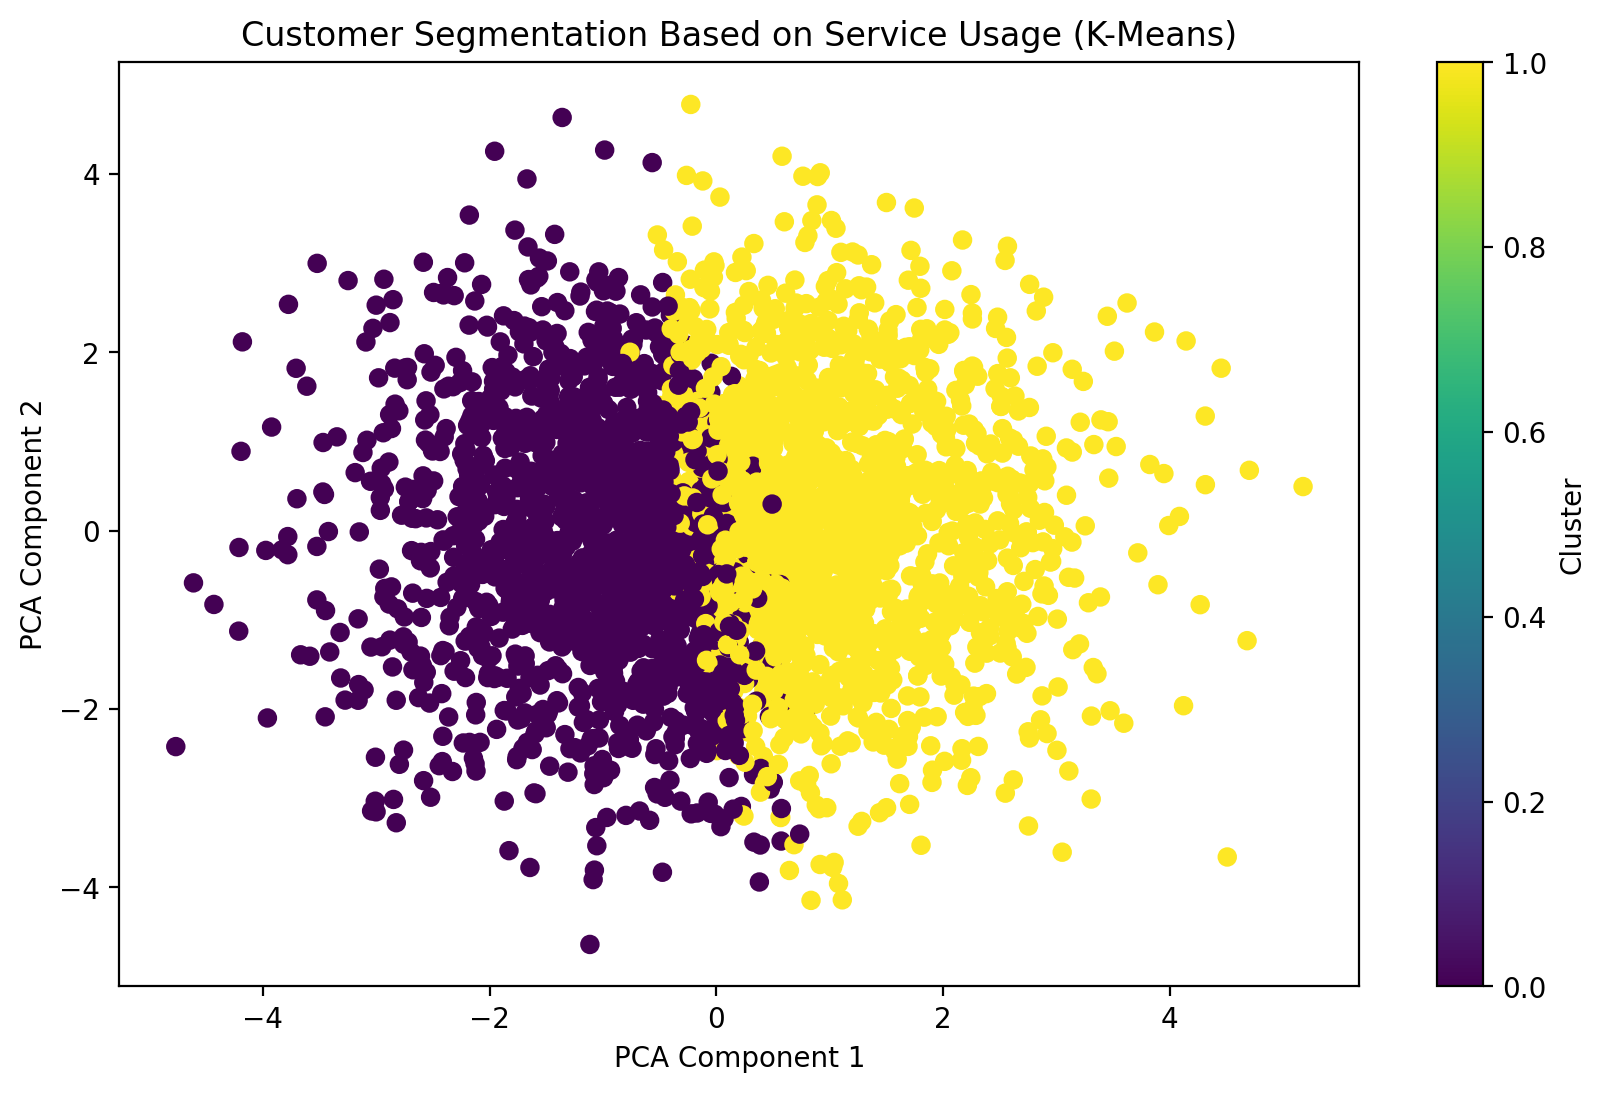

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select service usage features
usage_features = ['Total day minutes', 'Total eve minutes', 'Total night minutes', 
                  'Total intl minutes', 'Total day charge', 'Total eve charge', 
                  'Total night charge', 'Total intl charge']

# Scale the service usage features
scaler = StandardScaler()
X_scaled_usage = scaler.fit_transform(data[usage_features])

# Apply K-Means clustering
kmeans_usage = KMeans(n_clusters=2, random_state=42)
clusters_usage = kmeans_usage.fit_predict(X_scaled_usage)

# Add cluster labels to the original data
data['Usage_Cluster'] = clusters_usage

# Visualize clusters using PCA (for 2D visualization)
pca_usage = PCA(n_components=2)
X_pca_usage = pca_usage.fit_transform(X_scaled_usage)

plt.figure(figsize=(10,6))
plt.scatter(X_pca_usage[:, 0], X_pca_usage[:, 1], c=clusters_usage, cmap='viridis')
plt.title('Customer Segmentation Based on Service Usage (K-Means)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [56]:
from scipy.stats import chi2_contingency
import pandas as pd

# List of categorical features in the dataset
categorical_features = ['State', 'Area code', 'International plan', 'Voice mail plan']

# Run Chi-Square test for each categorical feature against churn
chi_square_results = {}

for feature in categorical_features:
    # Create a contingency table
    contingency_table = pd.crosstab(data[feature], data['Churn'])
    
    # Perform Chi-Square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Store the results
    chi_square_results[feature] = {'Chi-Square Statistic': chi2, 'P-value': p}

# Convert the results into a DataFrame for better visualization
chi_square_df = pd.DataFrame(chi_square_results).T
chi_square_df

Chi-Square Statistic       P-value
State                          77.014910  8.392151e-03
Area code                       0.273606  8.721419e-01
International plan            212.832943  3.309917e-48
Voice mail plan                34.821812  3.613028e-09

Summary of Key Findings:

    State and Voice Mail Plan show statistically significant relationships with churn, but their effect is moderate.
    International Plan has a very strong relationship with churn, indicating customers who subscribe to this plan are much more likely to churn.
    Area Code does not have any significant impact on churn.

In [57]:
data.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn', 'Usage_Cluster'],
      dtype='object')

In [58]:
cols_to_drop = ["State", "Area code","Total day minutes", "Total day calls", "Total eve minutes", "Total eve minutes", "Total night calls","Total night minutes", "Total intl calls", "Total intl minutes"]
data = data.drop(columns=cols_to_drop)

In [59]:
data

Account length International plan Voice mail plan  \
0                128                 No             Yes   
1                107                 No             Yes   
2                137                 No              No   
3                 84                Yes              No   
4                 75                Yes              No   
...              ...                ...             ...   
3328             192                 No             Yes   
3329              68                 No              No   
3330              28                 No              No   
3331             184                Yes              No   
3332              74                 No             Yes   

      Number vmail messages  Total day charge  Total eve calls  \
0                        25             45.07               99   
1                        26             27.47              103   
2                         0             41.38              110   
3                         0             50.90               88   
4                         0             28.34              122   
...                     ...               ...              ...   
3328                     36             26.55              126   
3329                      0             39.29               55   
3330                      0             30.74               58   
3331                      0             36.35               84   
3332                     25             39.85               82   

      Total eve charge  Total night charge  Total intl charge  \
0                16.78               11.01               2.70   
1                16.62               11.45               3.70   
2                10.30                7.32               3.29   
3                 5.26                8.86               1.78   
4                12.61                8.41               2.73   
...                ...                 ...                ...   
3328             18.32               12.56               2.67   
3329             13.04                8.61               2.59   
3330             24.55                8.64               3.81   
3331             13.57                6.26               1.35   
3332             22.60               10.86               3.70   

      Customer service calls  Churn  Usage_Cluster  
0                          1  False              1  
1                          1  False              0  
2                          0  False              1  
3                          2  False              1  
4                          3  False              0  
...                      ...    ...            ...  
3328                       2  False              1  
3329                       3  False              1  
3330                       2  False              0  
3331                       2  False              1  
3332                       0  False              1  

[3169 rows x 12 columns]

In [60]:
# Encode object type with binary values
data['International plan'] = data['International plan'].map({'No': 0, 'Yes': 1})
data['Voice mail plan'] = data['Voice mail plan'].map({'No': 0, 'Yes': 1})
data['Churn'] = data['Churn'].map({False: 0, True: 1})

In [70]:
data = data.drop(columns="Usage_Cluster")

In [74]:
data = data.drop(columns="Total eve calls")

In [75]:
data.columns

Index(['Account length', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day charge', 'Total eve charge',
       'Total night charge', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [76]:
data.to_csv("orange_telecom_churn.csv")

In [105]:
data.shape

(3169, 10)

#  Data

In [77]:
import pandas as pd
import numpy as np
import math as math
import random
from sklearn.utils import shuffle
import sklearn.preprocessing  as prepro
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
from xgboost import XGBClassifier
# from adjustText import adjust_text


#constants
random_state = 42
plotColor = ['b','g','r','m','c', 'y']
markers = ['+','o','*','^','v','>','<']

#set up
sns.set(style='whitegrid')
%matplotlib inline

## Original data

In [78]:
X = data.drop(columns="Churn")
y = data["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print("----------------------------")
print("Original features shape, ", X.shape)
print("Original target shape, ", y.shape)
print("x train shape, ", X_train.shape)
print("y train shape, ", y_train.shape)
print("x test shape, ", X_test.shape)
print("y test shape, ", y_test.shape)
print("----------------------------")

----------------------------
Original features shape,  (3169, 9)
Original target shape,  (3169,)
x train shape,  (2535, 9)
y train shape,  (2535,)
x test shape,  (634, 9)
y test shape,  (634,)
----------------------------


## Upsampling data

In [79]:
smote = SMOTE(random_state=42)
X_train_upsampled , y_train_upsampled = smote.fit_resample(X_train,y_train)
print("----------------------------")
print("Original x train shape, ", X_train.shape)
print("Resample x train shape, ", X_train_upsampled.shape)
print("----------------------------")

----------------------------
Original x train shape,  (2535, 9)
Resample x train shape,  (4382, 9)
----------------------------


## Downsampling data

In [80]:
from imblearn.under_sampling import RandomUnderSampler

# Define the undersampler
rus = RandomUnderSampler(random_state=random_state)

# Fit and resample the training data
x_train_downsampled, y_train_downsampled = rus.fit_resample(X_train, y_train)

# Print shapes to compare
print("----------------------------")
print("Original x_train shape: ", X_train.shape)
print("Downsampled x_train shape: ", x_train_downsampled.shape)
print("----------------------------")


----------------------------
Original x_train shape:  (2535, 9)
Downsampled x_train shape:  (688, 9)
----------------------------


# Build model

## Tuning

In [81]:
def Parameter_tunning(x, y, models, clsModelsNm, parameters, score):
    
    tuned_params = {}
    for i,model in enumerate(models):
        print(clsModelsNm[i])
        grid = GridSearchCV(estimator = model 
                            , cv = 5
                            , param_grid = parameters[clsModelsNm[i]]
                            , scoring = score
                            , n_jobs = 1)
        grid.fit(x,y)
        print(grid.best_score_)
        print(grid.best_params_)
        tuned_params[clsModelsNm[i]] = {'params':grid.best_params_}
    
    return tuned_params

In [82]:
import yaml

with open('../../configs/train_config.yaml', 'r') as file:
    model_params = yaml.safe_load(file)

scoreMatrix = ['accuracy','precision','recall','f1','neg_log_loss']

### Original Data

In [83]:
og_clsLR = LogisticRegression(random_state=random_state)
og_clsRF = RandomForestClassifier(random_state=random_state)
og_clsXGB = XGBClassifier(random_state=random_state)
og_clsDT = DecisionTreeClassifier(random_state=random_state)
clsModelsNm = ["Random Forest", "Decision Tree", "Logistic Regression", "XGBoost"]
og_clsModels = [og_clsRF, og_clsDT, og_clsLR, og_clsXGB]
clsParams = model_params
tuned_params = Parameter_tunning(X_train, y_train, og_clsModels, clsModelsNm, clsParams, 'neg_log_loss')

Random Forest
-0.21405265784664698
{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 7, 'n_estimators': 400}
Decision Tree
-0.42630055381447196
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 7}
Logistic Regression


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

-0.31493157989563886
{'C': 1, 'max_iter': 200, 'solver': 'lbfgs'}
XGBoost
-0.19659633680423005
{'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 400, 'reg_alpha': 0.1, 'reg_lambda': 1}


In [84]:
# Prepare model information for original.yaml in the specified format
original_model_info = {
    "models": [
        {
            "name": "Random Forest",
            "hyperparameters": {
                "criterion": "entropy",
                "max_depth": 8,
                "min_samples_leaf": 7,
                "n_estimators": 400
            },
            "negative_log_loss": -0.23631390388245616
        },
        {
            "name": "Decision Tree",
            "hyperparameters": {
                "criterion": "gini",
                "max_depth": 6,
                "min_samples_leaf": 10
            },
            "negative_log_loss": -0.43976169521558167
        },
        {
            "name": "Logistic Regression",
            "hyperparameters": {
                "C": 10,
                "max_iter": 100,
                "solver": "sag"
            },
            "negative_log_loss": -0.3273547965394249
        },
        {
            "name": "XGBoost",
            "hyperparameters": {
                "gamma": 0.3,
                "learning_rate": 0.1,
                "max_depth": 9,
                "n_estimators": 400,
                "reg_alpha": 0.1,
                "reg_lambda": 1
            },
            "negative_log_loss": -0.229403062414106
        }
    ]
}

# Write to original.yaml file
original_output_path = '../../model_artifact/training/orange/original.yaml'
with open(original_output_path, 'w') as file:
    yaml.dump(original_model_info, file, default_flow_style=False)

print(f"Model information has been written to {original_output_path}")

Model information has been written to ../../model_artifact/training/orange/original.yaml


### Upsamling

In [85]:
os_clsLR = LogisticRegression(random_state=random_state)
os_clsRF = RandomForestClassifier(random_state=random_state)
os_clsXGB = XGBClassifier(random_state=random_state)
os_clsDT = DecisionTreeClassifier(random_state=random_state)
clsModelsNm = ["Random Forest", "Decision Tree", "Logistic Regression", "XGBoost"]
os_clsModels = [os_clsRF, os_clsDT, os_clsLR, os_clsXGB]
clsParams = model_params
os_tuned_params = Parameter_tunning(X_train_upsampled, y_train_upsampled, os_clsModels, clsModelsNm, clsParams, 'neg_log_loss')

# Write to a YAML file
model_info = {"models": [os_tuned_params]}
output_path = '../../model_artifact/training/orange/oversampling.yaml'
with open(output_path, 'w') as file:
    yaml.dump(model_info, file, default_flow_style=False)

print(f"Model information has been written to {output_path}")

Random Forest
-0.4146810166258249
{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 7, 'n_estimators': 400}
Decision Tree
-0.6177686809019558
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 10}
Logistic Regression


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

-0.6023682606887213
{'C': 1, 'max_iter': 200, 'solver': 'lbfgs'}
XGBoost
-0.22259882693866156
{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 400, 'reg_alpha': 0.01, 'reg_lambda': 0.1}
Model information has been written to ../../model_artifact/training/orange/oversampling.yaml


In [86]:
os_tuned_params

{'Random Forest': {'params': {'criterion': 'gini',
   'max_depth': 8,
   'min_samples_leaf': 7,
   'n_estimators': 400}},
 'Decision Tree': {'params': {'criterion': 'gini',
   'max_depth': 6,
   'min_samples_leaf': 10}},
 'Logistic Regression': {'params': {'C': 1,
   'max_iter': 200,
   'solver': 'lbfgs'}},
 'XGBoost': {'params': {'gamma': 0,
   'learning_rate': 0.1,
   'max_depth': 7,
   'n_estimators': 400,
   'reg_alpha': 0.01,
   'reg_lambda': 0.1}}}

In [87]:
# Prepare model information in the specified format
os_model_info = {
    "models": [
        {
            "name": "Random Forest",
            "hyperparameters": {
                "criterion": "gini",
                "max_depth": 8,
                "min_samples_leaf": 7,
                "n_estimators": 400
            },
            "negative_log_loss": -0.3111081168748049
        },
        {
            "name": "Decision Tree",
            "hyperparameters": {
                "criterion": "gini",
                "max_depth": 6,
                "min_samples_leaf": 7
            },
            "negative_log_loss": -0.4984625167049783
        },
        {
            "name": "Logistic Regression",
            "hyperparameters": {
                "C": 10,
                "max_iter": 100,
                "solver": "liblinear"
            },
            "negative_log_loss": -0.5160750127388386
        },
        {
            "name": "XGBoost",
            "hyperparameters": {
                "gamma": 0.2,
                "learning_rate": 0.1,
                "max_depth": 9,
                "n_estimators": 500,
                "reg_alpha": 0,
                "reg_lambda": 1
            },
            "negative_log_loss": -0.13365423296405415
        }
    ]
}

# Write to a YAML file
output_path = '../../model_artifact/training/orange/oversampling.yaml'
with open(output_path, 'w') as file:
    yaml.dump(os_model_info, file, default_flow_style=False)

print(f"Model information has been written to {output_path}")

Model information has been written to ../../model_artifact/training/orange/oversampling.yaml


### Downsampling

In [88]:
us_clsLR = LogisticRegression(random_state=random_state)
us_clsRF = RandomForestClassifier(random_state=random_state)
us_clsXGB = XGBClassifier(random_state=random_state)
us_clsDT = DecisionTreeClassifier(random_state=random_state)
clsModelsNm = ["Random Forest", "Decision Tree", "Logistic Regression", "XGBoost"]
us_clsModels = [us_clsRF, us_clsDT, us_clsLR, us_clsXGB]
clsParams = model_params
us_tuned_params = Parameter_tunning(x_train_downsampled, y_train_downsampled, us_clsModels, clsModelsNm, clsParams, 'neg_log_loss')
# Write to a YAML file
model_info = {"models": [us_tuned_params]}
output_path = '../../model_artifact/training/orange/undersampling.yaml'
with open(output_path, 'w') as file:
    yaml.dump(model_info, file, default_flow_style=False)

print(f"Model information has been written to {output_path}")

Random Forest
-0.4135525273144961
{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 7, 'n_estimators': 500}
Decision Tree
-1.005516306489905
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 10}
Logistic Regression


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

-0.5419834931745982
{'C': 1, 'max_iter': 200, 'solver': 'lbfgs'}
XGBoost
-0.4242648757221158
{'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 400, 'reg_alpha': 0.1, 'reg_lambda': 1}
Model information has been written to ../../model_artifact/training/orange/undersampling.yaml


In [89]:
# Prepare model information for undersampling.yaml in the specified format
undersampling_model_info = {
    "models": [
        {
            "name": "Random Forest",
            "hyperparameters": {
                "criterion": "entropy",
                "max_depth": 8,
                "min_samples_leaf": 7,
                "n_estimators": 400
            },
            "negative_log_loss": -0.454631940360374
        },
        {
            "name": "Decision Tree",
            "hyperparameters": {
                "criterion": "gini",
                "max_depth": 6,
                "min_samples_leaf": 10
            },
            "negative_log_loss": -1.0092165421412695
        },
        {
            "name": "Logistic Regression",
            "hyperparameters": {
                "C": 10,
                "max_iter": 100,
                "solver": "liblinear"
            },
            "negative_log_loss": -0.5710200048282904
        },
        {
            "name": "XGBoost",
            "hyperparameters": {
                "gamma": 0.3,
                "learning_rate": 0.1,
                "max_depth": 9,
                "n_estimators": 400,
                "reg_alpha": 0.1,
                "reg_lambda": 1
            },
            "negative_log_loss": -0.46247356966826275
        }
    ]
}

# Write to undersampling.yaml file
undersampling_output_path = '../../model_artifact/training/orange/undersampling.yaml'
with open(undersampling_output_path, 'w') as file:
    yaml.dump(undersampling_model_info, file, default_flow_style=False)

print(f"Model information has been written to {undersampling_output_path}")

Model information has been written to ../../model_artifact/training/orange/undersampling.yaml


## Visualizing

In [90]:
# Graph of precision & recall against threshold
def plot_precision_recall_vs_thresold(precisions, recalls, thresholds):
    plt.plot(thresholds,precisions[:-1],label="Precision")
    plt.plot(thresholds,recalls[:-1],label="Recall")
    plt.plot(thresholds,2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1]+recalls[:-1]) ,label="F1")
    plt.title("Precision, recall & F1 vs thresold")
    plt.xlabel("Thresold")
    plt.legend(loc='lower right')
    plt.show()

In [91]:
def Cross_validation_score(clsModels, clsModelsNm, clsSample, scoreMatrix):
    """ Cross validation using cross_val_score method """
    for i,model in enumerate(clsModels):
        print("===============================================")
        print(clsModelsNm[i])

        for j, sample in enumerate(clsSample):
            print("************************************************")
            print(sample[2])
            
            for score in scoreMatrix:
                scores = cross_val_score(model, sample[0], sample[1], cv=5 , scoring = score)
                print(score, " score:", scores.mean())
                
            y_scores = cross_val_predict(model, sample[0], sample[1], cv=5, method="predict_proba") 
            
            
            precisions, recalls, thresholds = metrics.precision_recall_curve(sample[1], y_scores[:][:,1]) 
            plot_precision_recall_vs_thresold(precisions, recalls, thresholds)
            score_matrix = pd.DataFrame({'Precisions': precisions[:-1]
                                ,'Recalls': recalls[:-1]
                                ,'F1': 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1]+recalls[:-1])
                                ,'Threshold': thresholds
                               })
            #print("When percision and recall are same \n" , score_matrix[ score_matrix['Precisions'] == score_matrix['Recalls']] )
            print("When F1 score is max \n" , score_matrix[ score_matrix['F1'] == max(score_matrix['F1'])])

### Original Data

In [92]:
with open('../../model_artifact/training/orange/original.yaml', 'r') as file:
    config = yaml.safe_load(file)

# Get the list of models
models = config["models"]
models

[{'hyperparameters': {'criterion': 'entropy',
   'max_depth': 8,
   'min_samples_leaf': 7,
   'n_estimators': 400},
  'name': 'Random Forest',
  'negative_log_loss': -0.23631390388245616},
 {'hyperparameters': {'criterion': 'gini',
   'max_depth': 6,
   'min_samples_leaf': 10},
  'name': 'Decision Tree',
  'negative_log_loss': -0.43976169521558167},
 {'hyperparameters': {'C': 10, 'max_iter': 100, 'solver': 'sag'},
  'name': 'Logistic Regression',
  'negative_log_loss': -0.3273547965394249},
 {'hyperparameters': {'gamma': 0.3,
   'learning_rate': 0.1,
   'max_depth': 9,
   'n_estimators': 400,
   'reg_alpha': 0.1,
   'reg_lambda': 1},
  'name': 'XGBoost',
  'negative_log_loss': -0.229403062414106}]

Random Forest Parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 7, 'n_estimators': 400}
Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 10}
Logistic Regression Parameters: {'C': 10, 'max_iter': 100, 'solver': 'sag'}
XGBoost Parameters: {'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 400, 'reg_alpha': 0.1, 'reg_lambda': 1}
Random Forest
************************************************
Original data
accuracy  score: 0.9337278106508876
precision  score: 0.9506894076861713
recall  score: 0.5491901108269396
f1  score: 0.6875329540676076
neg_log_loss  score: -0.21498961094819827


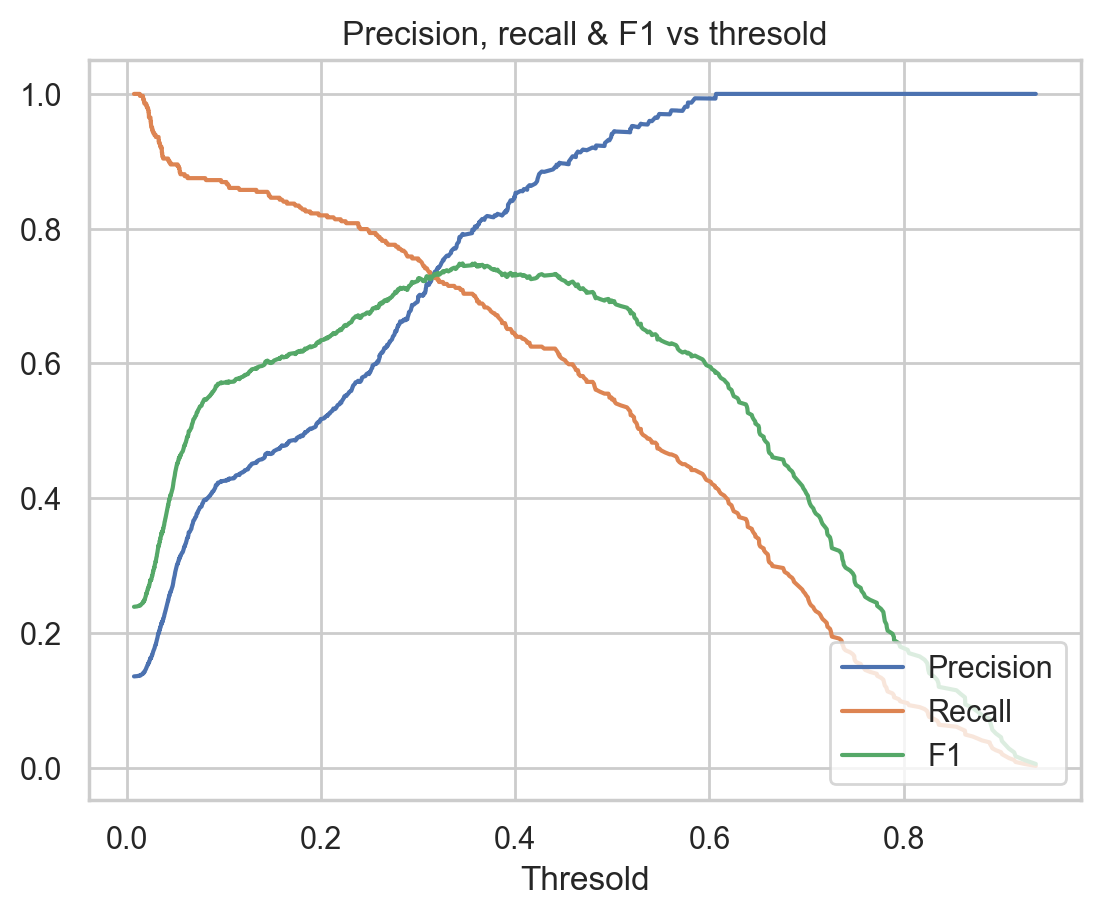

When F1 score is max 
       Precisions   Recalls        F1  Threshold
2227    0.792208  0.709302  0.748466   0.345588
Decision Tree
************************************************
Original data
accuracy  score: 0.923076923076923
precision  score: 0.7969307792245685
recall  score: 0.5898976982097187
f1  score: 0.673137534655187
neg_log_loss  score: -0.44530443389366525


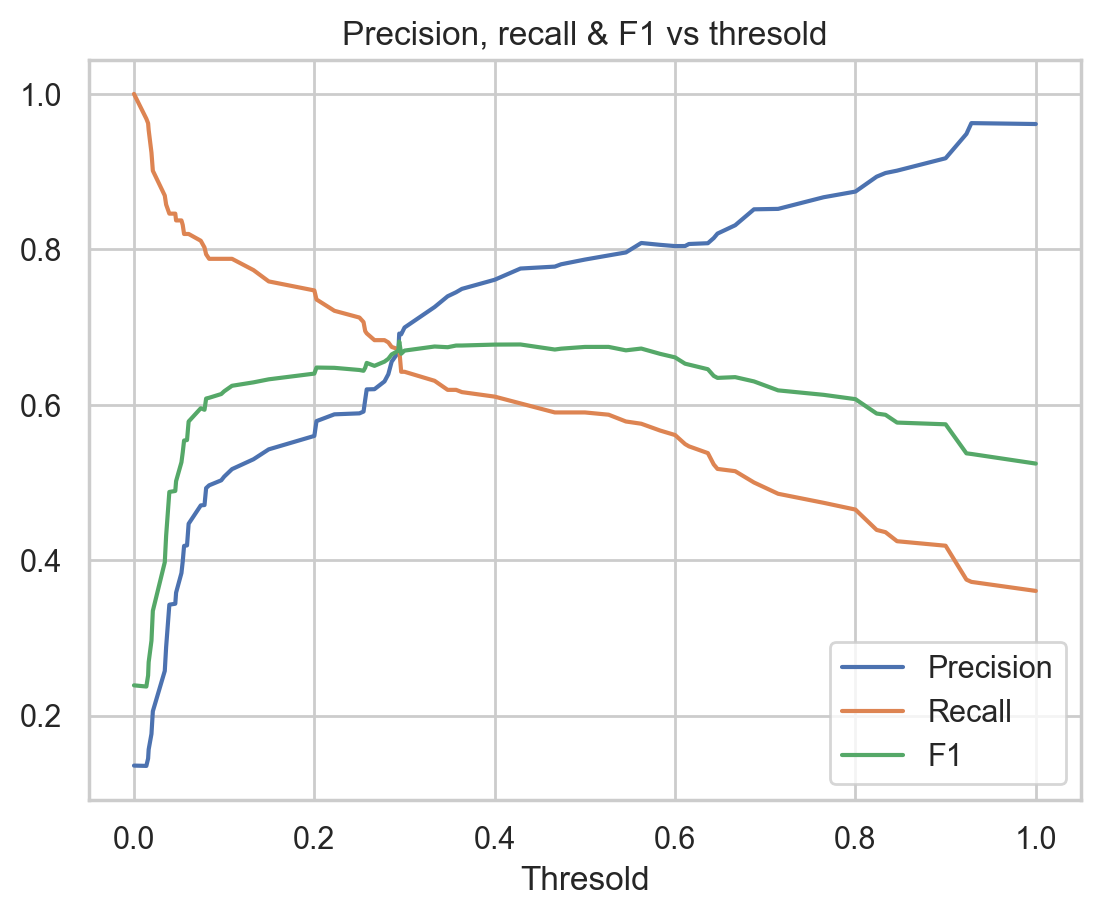

When F1 score is max 
     Precisions   Recalls        F1  Threshold
37    0.691617  0.671512  0.681416   0.294118
Logistic Regression
************************************************
Original data


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means

accuracy  score: 0.8642998027613412
precision  score: 0.4


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means

recall  score: 0.008738277919863598
f1  score: 0.01706470708307818


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means

neg_log_loss  score: -0.3784281715594316


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16524\381732776.py:5: RuntimeWarning: invalid value encountered in divide
  plt.plot(thresholds,2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1]+recalls[:-1]) ,label="F1")


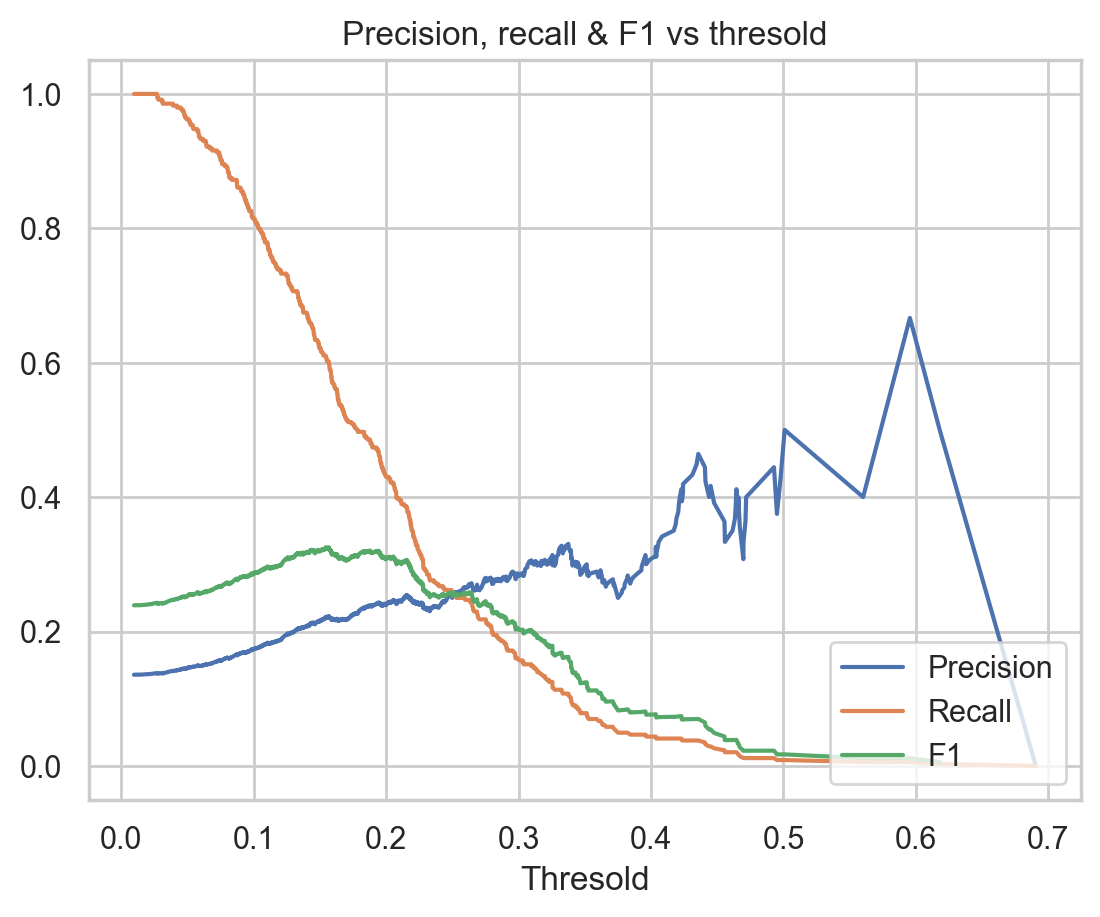

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16524\3138009618.py:22: RuntimeWarning: invalid value encountered in divide
  ,'F1': 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1]+recalls[:-1])


When F1 score is max 
       Precisions   Recalls        F1  Threshold
1588    0.221753  0.610465  0.325329   0.154417
XGBoost
************************************************
Original data
accuracy  score: 0.9416173570019725
precision  score: 0.8705707506471096
recall  score: 0.6713554987212276
f1  score: 0.7565709708481394
neg_log_loss  score: -0.19832219658960498


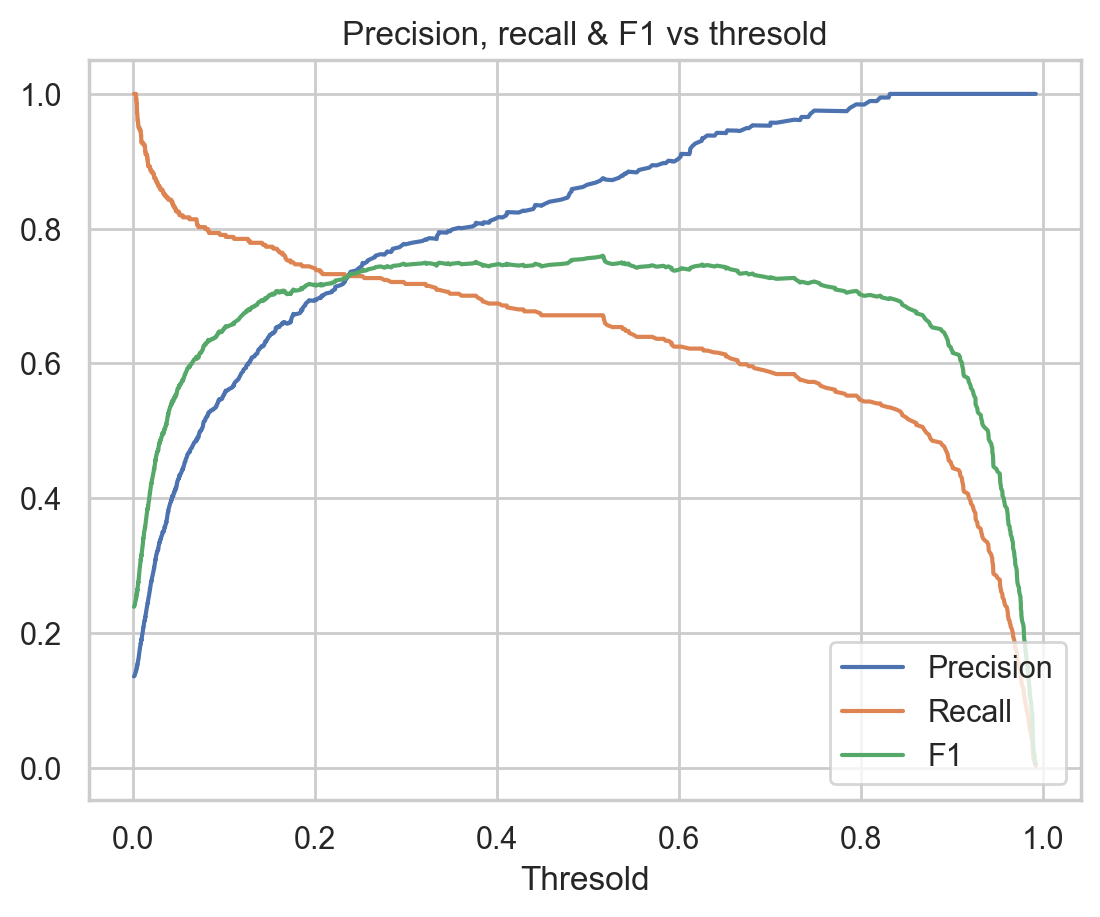

When F1 score is max 
       Precisions   Recalls        F1  Threshold
2271       0.875  0.671512  0.759868   0.516375


In [93]:
import yaml

# Load the YAML file
with open('../../model_artifact/training/orange/original.yaml', 'r') as file:
    config = yaml.safe_load(file)

# Get the list of models
models = config["models"]

# Extract hyperparameters for each model
og_random_forest_params = next(model['hyperparameters'] for model in models if model['name'] == 'Random Forest')
og_decision_tree_params = next(model['hyperparameters'] for model in models if model['name'] == 'Decision Tree')
og_logistic_regression_params = next(model['hyperparameters'] for model in models if model['name'] == 'Logistic Regression')
og_xgboost_params = next(model['hyperparameters'] for model in models if model['name'] == 'XGBoost')

# Print the hyperparameters for each model
print("Random Forest Parameters:", og_random_forest_params)
print("Decision Tree Parameters:", og_decision_tree_params)
print("Logistic Regression Parameters:", og_logistic_regression_params)
print("XGBoost Parameters:", og_xgboost_params)

# Build model and evaluate
og_clsDT = DecisionTreeClassifier(**og_decision_tree_params)
og_clsLR = LogisticRegression(**og_logistic_regression_params)
og_clsXGB = XGBClassifier(**og_xgboost_params)
og_clsRF = RandomForestClassifier(**og_random_forest_params)

og_clsModels = [og_clsRF, og_clsDT, og_clsLR, og_clsXGB]
Cross_validation_score(og_clsModels, clsModelsNm, [(X_train, y_train,'Original data')], scoreMatrix)

### Upsampling data

Random Forest Parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 7, 'n_estimators': 400}
Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 7}
Logistic Regression Parameters: {'C': 10, 'max_iter': 100, 'solver': 'liblinear'}
XGBoost Parameters: {'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 500, 'reg_alpha': 0, 'reg_lambda': 1}
Random Forest
************************************************
Upsamping data
accuracy  score: 0.8094401316234776
precision  score: 0.9082809229299118
recall  score: 0.6859934887300942
f1  score: 0.7814384496767469
neg_log_loss  score: -0.4155347189457334


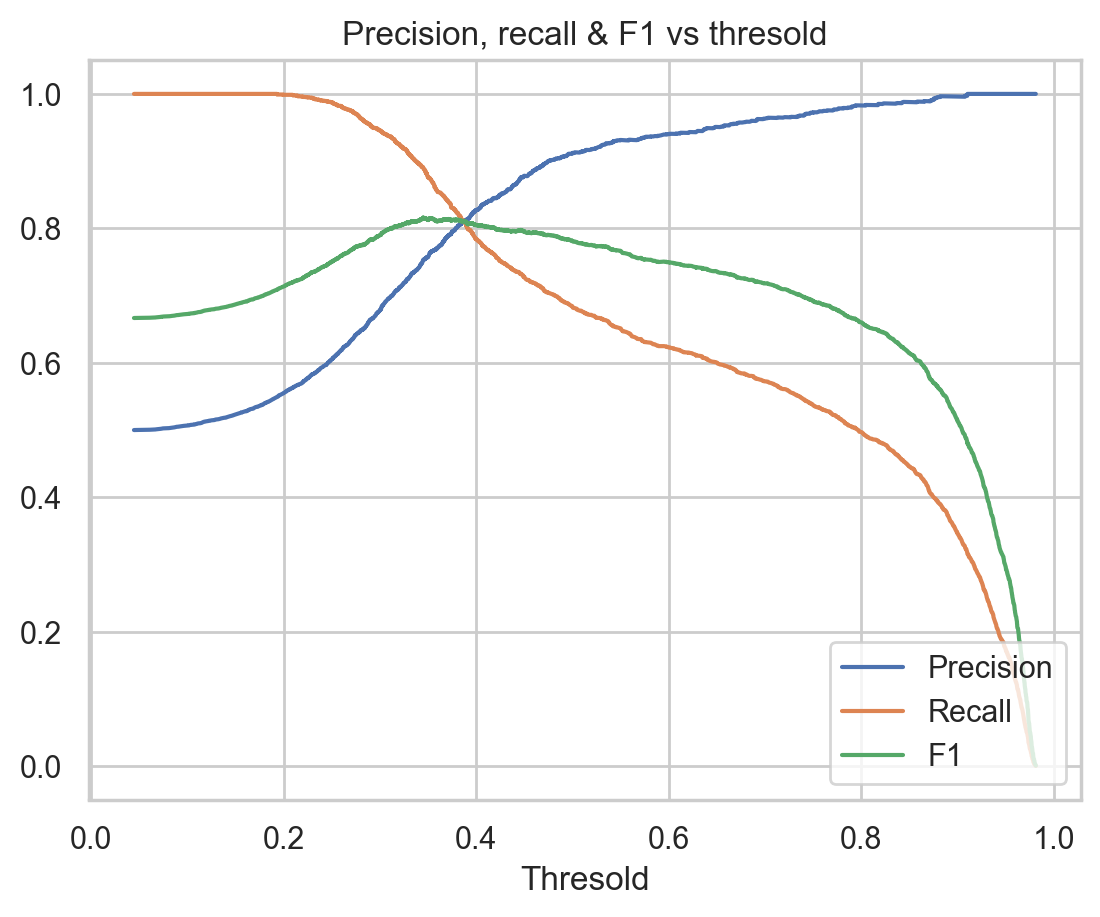

When F1 score is max 
       Precisions   Recalls        F1  Threshold
1792    0.753282  0.890461  0.816147   0.344945
Decision Tree
************************************************
Upsamping data
accuracy  score: 0.7736138662834591
precision  score: 0.8456601837509986
recall  score: 0.6718590403677932
f1  score: 0.747373541912699
neg_log_loss  score: -0.6409363610395896


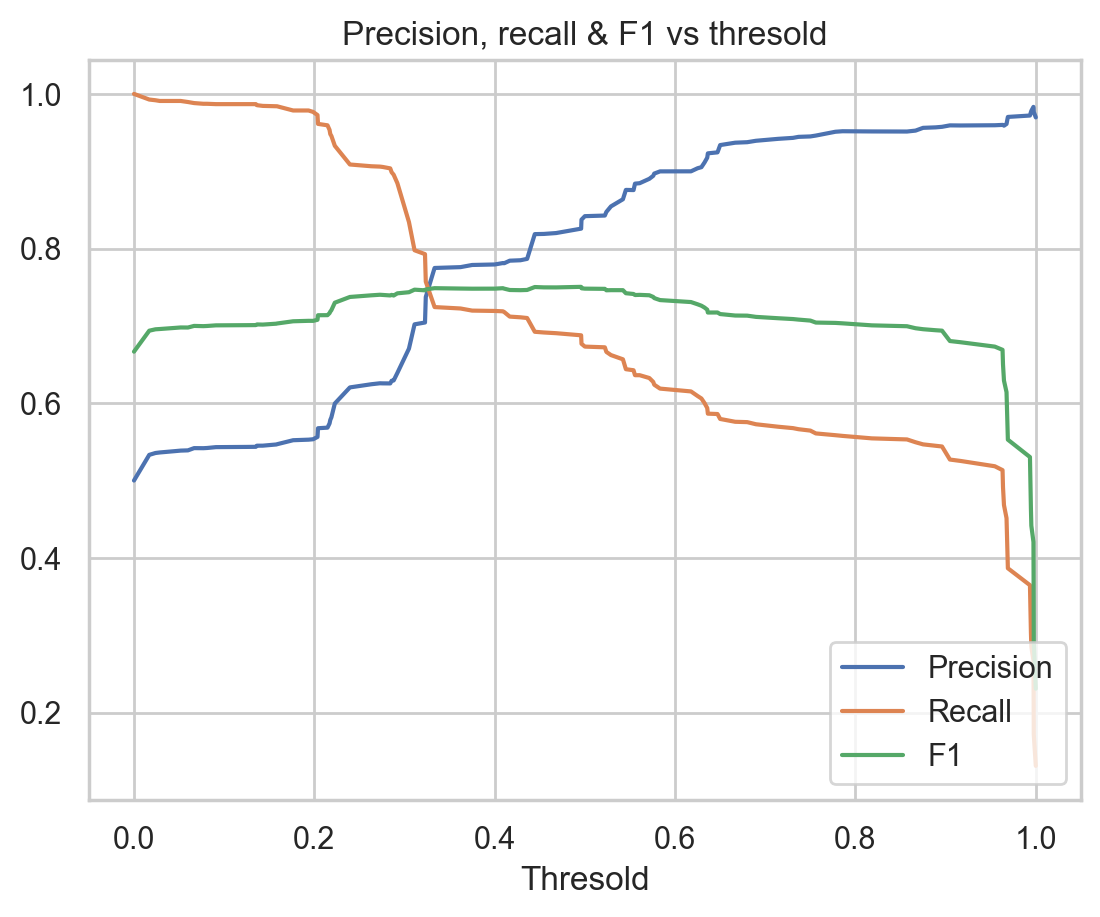

When F1 score is max 
     Precisions   Recalls        F1  Threshold
51    0.825753  0.687814  0.750498   0.495833
Logistic Regression
************************************************
Upsamping data
accuracy  score: 0.6759394052993029
precision  score: 0.6760421849329312
recall  score: 0.680070937477247
f1  score: 0.6771667703461143
neg_log_loss  score: -0.6027210649871402


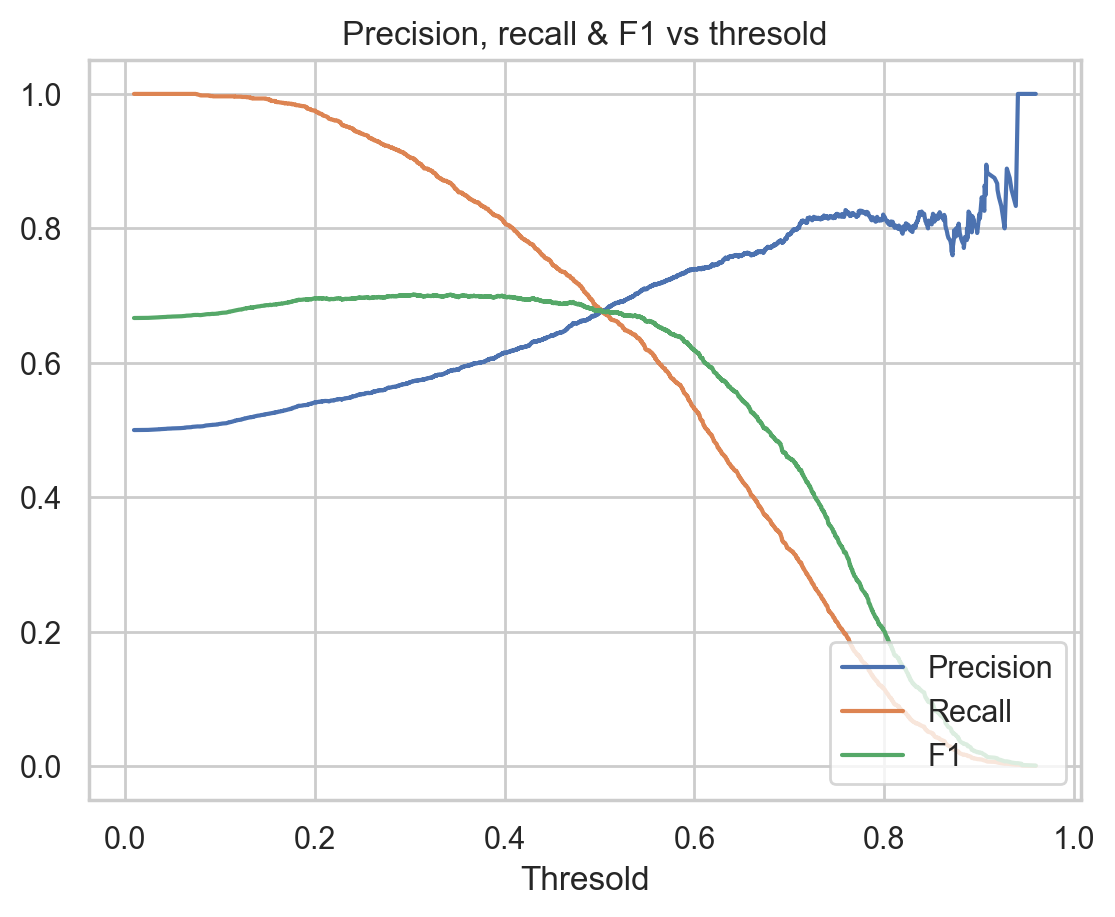

When F1 score is max 
       Precisions   Recalls        F1  Threshold
1156    0.588965  0.867184  0.701495   0.343299
XGBoost
************************************************
Upsamping data
accuracy  score: 0.8977611512889
precision  score: 0.9118211018362032
recall  score: 0.8808926472576737
f1  score: 0.895740159416676
neg_log_loss  score: -0.24835513720119456


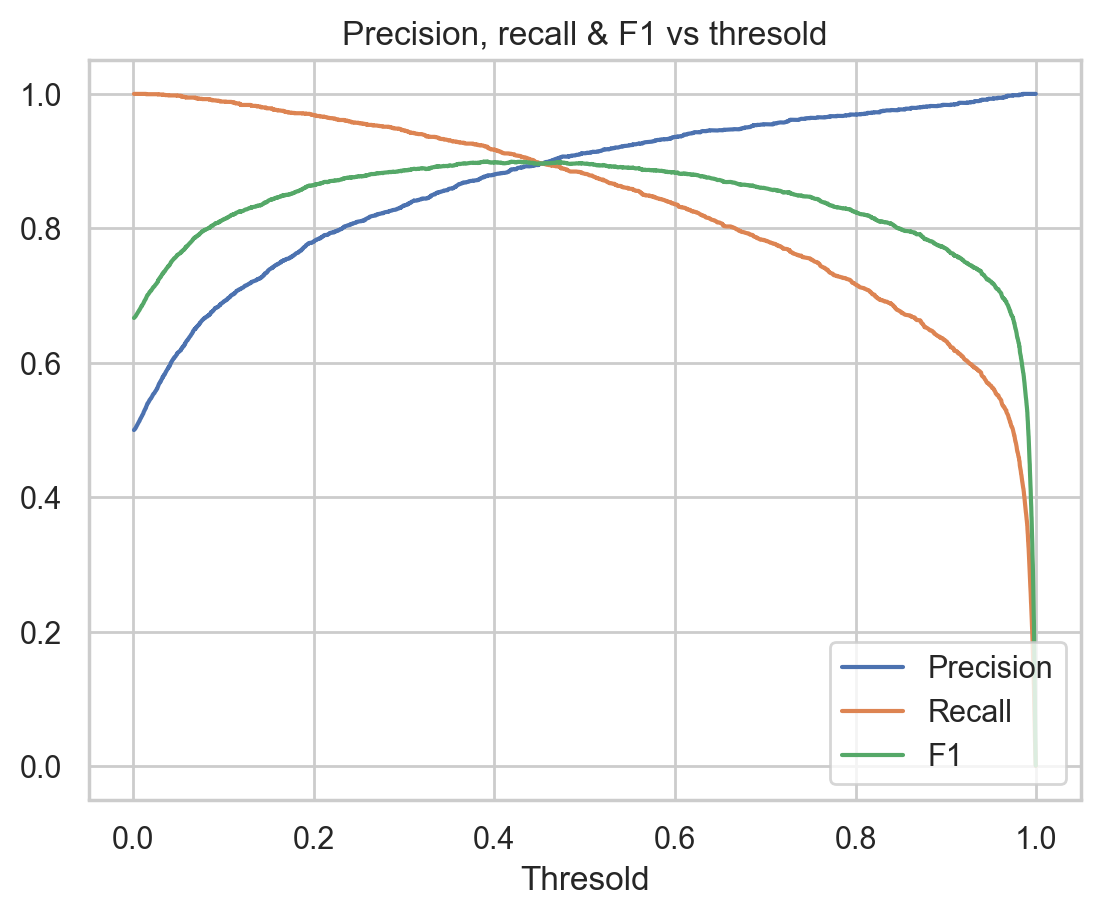

When F1 score is max 
       Precisions   Recalls        F1  Threshold
2082     0.87859  0.921497  0.899532   0.392403


In [94]:
import yaml

# Load the YAML file
with open('../../model_artifact/training/orange/oversampling.yaml', 'r') as file:
    config = yaml.safe_load(file)

# Get the list of models
models = config["models"]

# Extract hyperparameters for each model
os_random_forest_params = next(model['hyperparameters'] for model in models if model['name'] == 'Random Forest')
os_decision_tree_params = next(model['hyperparameters'] for model in models if model['name'] == 'Decision Tree')
os_logistic_regression_params = next(model['hyperparameters'] for model in models if model['name'] == 'Logistic Regression')
os_xgboost_params = next(model['hyperparameters'] for model in models if model['name'] == 'XGBoost')

# Print the hyperparameters for each model
print("Random Forest Parameters:", os_random_forest_params)
print("Decision Tree Parameters:", os_decision_tree_params)
print("Logistic Regression Parameters:", os_logistic_regression_params)
print("XGBoost Parameters:", os_xgboost_params)

# Build model and evaluate
os_clsDT = DecisionTreeClassifier(**os_decision_tree_params)
os_clsLR = LogisticRegression(**os_logistic_regression_params)
os_clsXGB = XGBClassifier(**os_xgboost_params)
os_clsRF = RandomForestClassifier(**os_random_forest_params)

os_clsModels = [os_clsRF, os_clsDT, os_clsLR, os_clsXGB]
Cross_validation_score(os_clsModels, clsModelsNm, [(X_train_upsampled, y_train_upsampled,'Upsamping data')], scoreMatrix)

### Downsampling data

Random Forest Parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 7, 'n_estimators': 400}
Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 10}
Logistic Regression Parameters: {'C': 10, 'max_iter': 100, 'solver': 'liblinear'}
XGBoost Parameters: {'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 400, 'reg_alpha': 0.1, 'reg_lambda': 1}
Random Forest
************************************************
Undersampling data
accuracy  score: 0.8473606262562148
precision  score: 0.845794524787089
recall  score: 0.8574168797953963
f1  score: 0.8453791226226188
neg_log_loss  score: -0.413855379156264


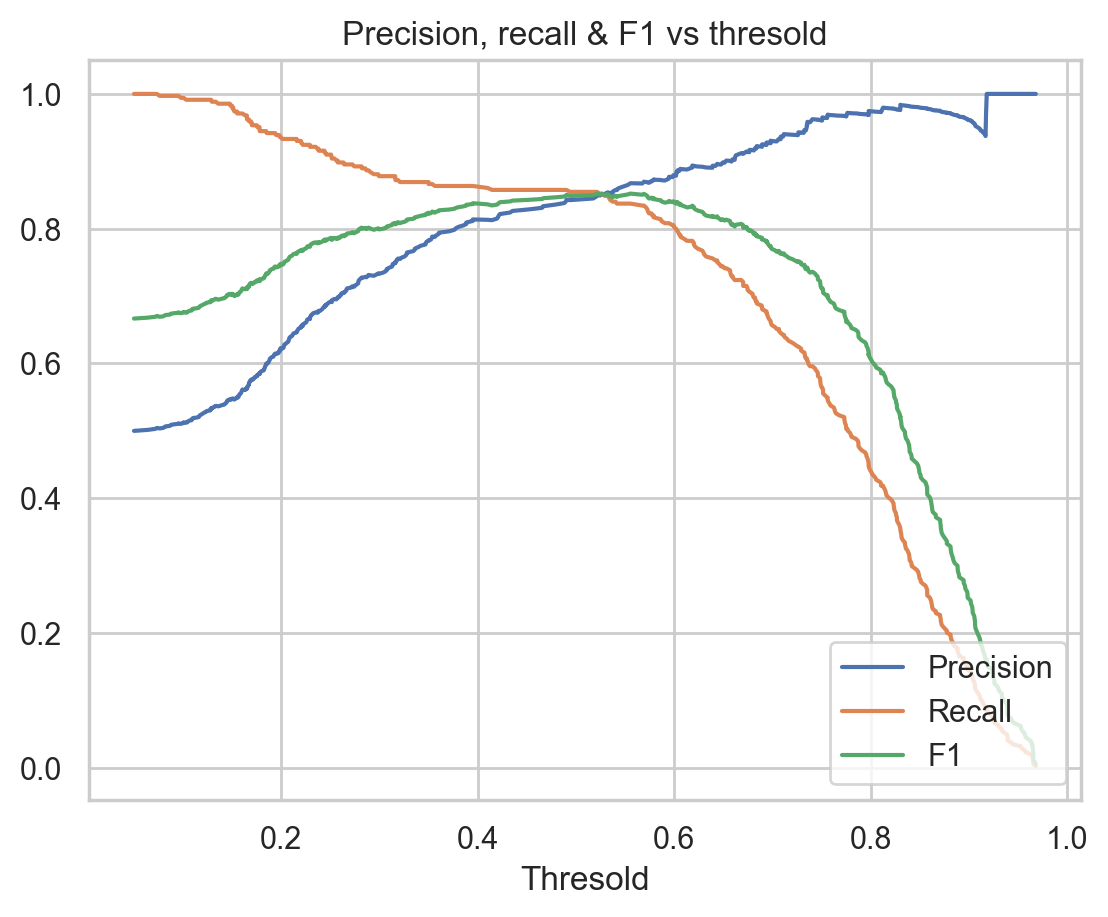

When F1 score is max 
      Precisions   Recalls        F1  Threshold
342    0.849711  0.854651  0.852174   0.521469
Decision Tree
************************************************
Undersampling data
accuracy  score: 0.805247011530731
precision  score: 0.851363723543274
recall  score: 0.7443307757885763
f1  score: 0.7923238693518655
neg_log_loss  score: -1.0693888809848733


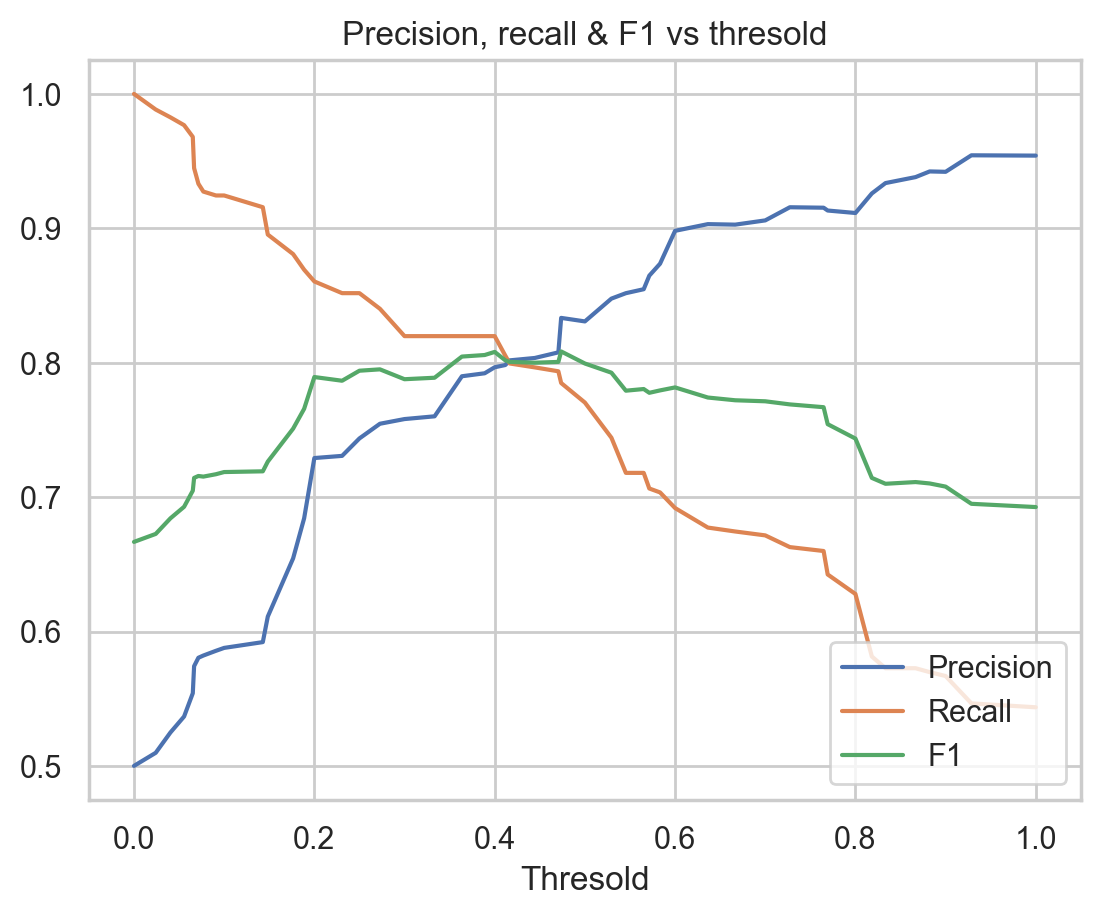

When F1 score is max 
     Precisions   Recalls        F1  Threshold
27    0.833333  0.784884  0.808383   0.473684
Logistic Regression
************************************************
Undersampling data
accuracy  score: 0.7499418174124617
precision  score: 0.7536734415326583
recall  score: 0.740920716112532
f1  score: 0.7467568759691331
neg_log_loss  score: -0.5442072547276013


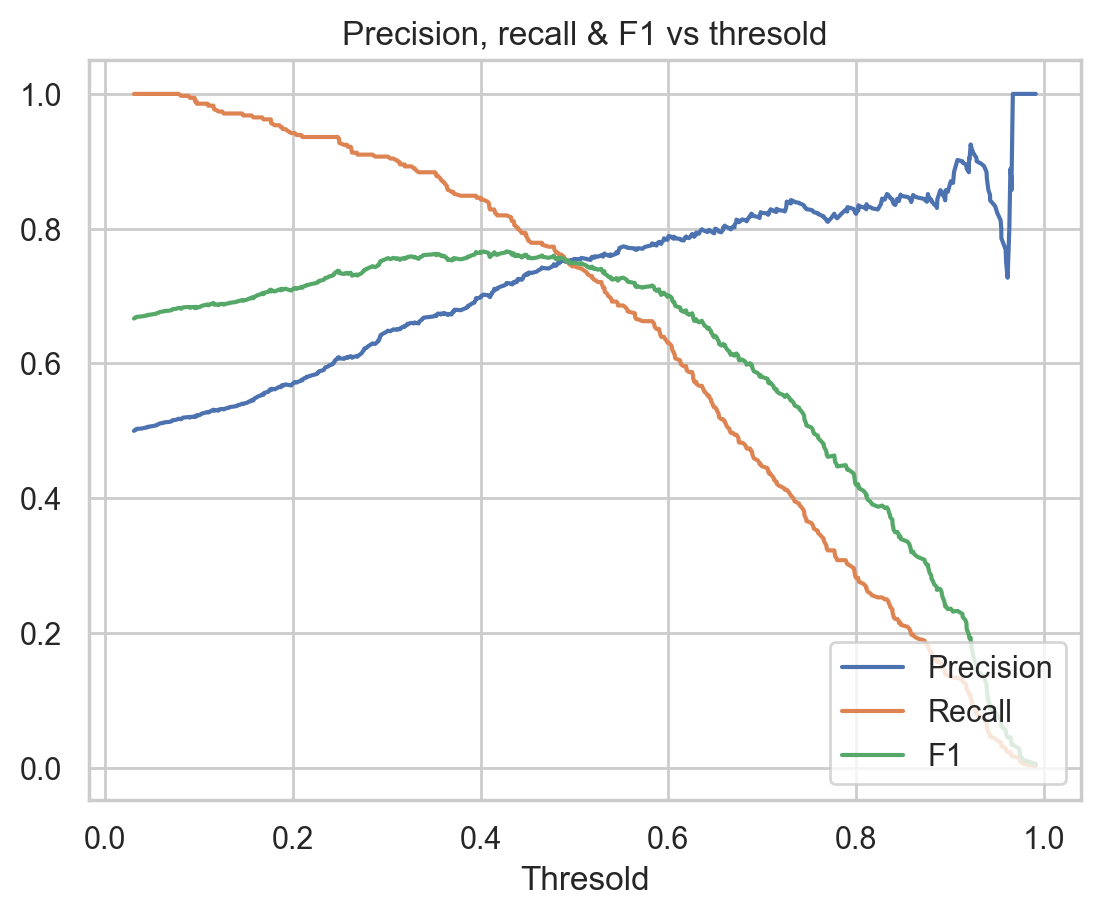

When F1 score is max 
      Precisions   Recalls        F1  Threshold
296    0.719388  0.819767  0.766304    0.42778
XGBoost
************************************************
Undersampling data
accuracy  score: 0.8197186078493601
precision  score: 0.8402419609079445
recall  score: 0.7905797101449276
f1  score: 0.8143192303373233
neg_log_loss  score: -0.43972943075871535


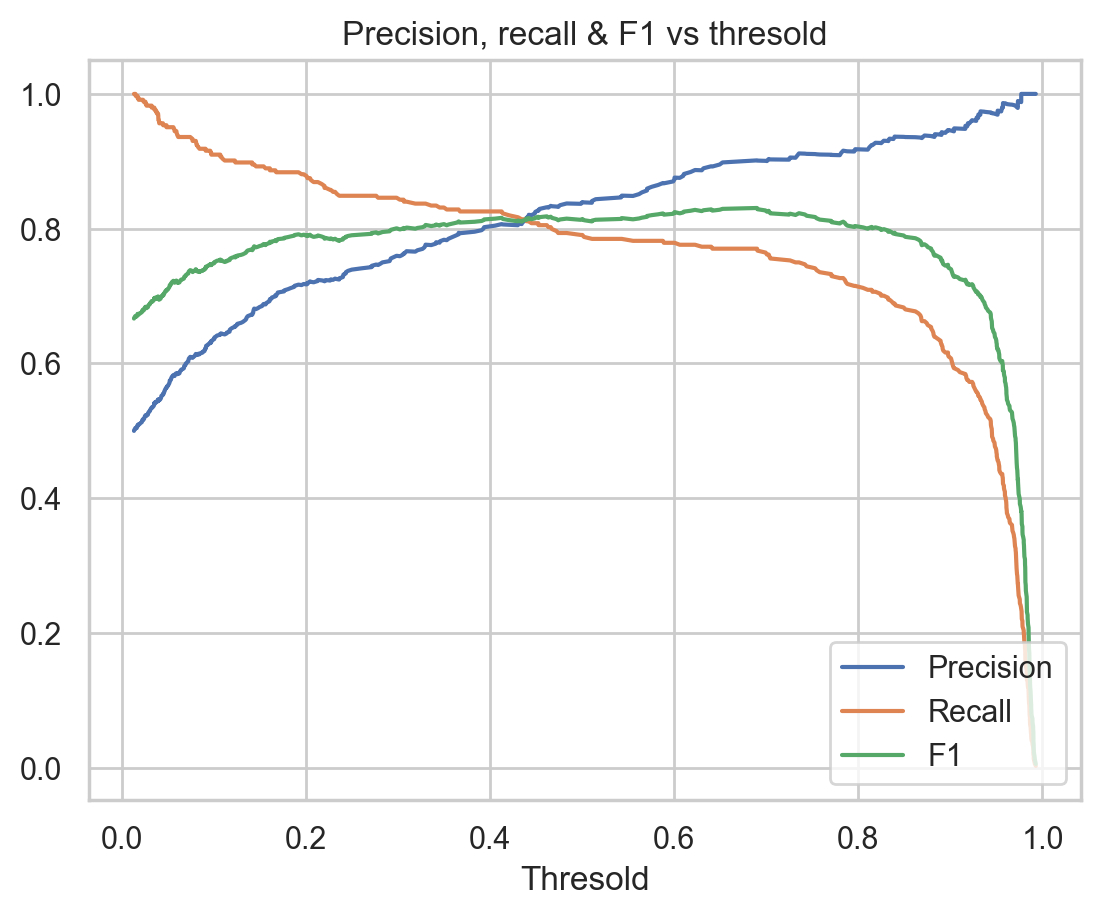

When F1 score is max 
      Precisions   Recalls        F1  Threshold
394    0.901361  0.770349  0.830721    0.68994


In [95]:
import yaml

# Load the YAML file
with open('../../model_artifact/training/orange/undersampling.yaml', 'r') as file:
    config = yaml.safe_load(file)

# Get the list of models
models = config["models"]

# Extract hyperparameters for each model
us_random_forest_params = next(model['hyperparameters'] for model in models if model['name'] == 'Random Forest')
us_decision_tree_params = next(model['hyperparameters'] for model in models if model['name'] == 'Decision Tree')
us_logistic_regression_params = next(model['hyperparameters'] for model in models if model['name'] == 'Logistic Regression')
us_xgboost_params = next(model['hyperparameters'] for model in models if model['name'] == 'XGBoost')

# Print the hyperparameters for each model
print("Random Forest Parameters:", us_random_forest_params)
print("Decision Tree Parameters:", us_decision_tree_params)
print("Logistic Regression Parameters:", us_logistic_regression_params)
print("XGBoost Parameters:", us_xgboost_params)

# Build model and evaluate
us_clsDT = DecisionTreeClassifier(**us_decision_tree_params)
us_clsLR = LogisticRegression(**us_logistic_regression_params)
us_clsXGB = XGBClassifier(**us_xgboost_params)
us_clsRF = RandomForestClassifier(**us_random_forest_params)

us_clsModels = [us_clsRF, us_clsDT, us_clsLR, us_clsXGB]
Cross_validation_score(us_clsModels, clsModelsNm, [(x_train_downsampled, y_train_downsampled,'Undersampling data')], scoreMatrix)

## Model Evaluation

In [96]:
def Cus_log_loss(target, predicted):
    if len(predicted) != len(target):
        print("Data object initiated")
        return
    
    target = [float(x) for x in target] # converting target into float
    predicted = [min([max([x,1e-15]), 1-1e-15]) for x in predicted]
        
    return -1.0 / len(target) *  sum([ target[i] * math.log(predicted[i]) + (1.0 - target[i]) * math.log(1.0 - predicted[i]) 
                                      for i in range(len(predicted))])

In [97]:
def Model_evaluation(models, clsModelsNm, x_train, y_train, x_test, y_test,  threshold ):
    
    predicted_val = {}
    for i, model in enumerate(clsModelsNm):
        models[i].fit(x_train,y_train)
        predicted_proba = models[i].predict_proba(x_test)
        
        predicted = predicted_proba[:,1].copy()
        predicted[predicted >=threshold[i]] = 1
        predicted[predicted < threshold[i]] = 0
        
        confusion_matrix_matrix = metrics.confusion_matrix(y_true = y_test
                                                   ,y_pred = predicted
                                                   #,normalize = 'true' 
                                                   )
        
        print("***********",clsModelsNm[i], "*************")
        print(metrics.classification_report(y_test, predicted))
        print("*******************************************")
        #print("Log loss score", round(metrics.log_loss(y_test,models[i].predict_proba(x_test)[:,1]),2))
        print("Log loss score", round(Cus_log_loss(y_test,predicted_proba[:,1]),2))
        print("*******************************************")
        print("Confusion matrix")
        sns.heatmap(confusion_matrix_matrix
                    , annot=True
                    , fmt="d"
                   )
        plt.xlabel("Predicted label")
        plt.ylabel("Actual label")
        plt.show()
        print("*******************************************")
        
        predicted_val[model] = predicted
        

### Original Data

*********** Random Forest *************
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       536
           1       0.74      0.68      0.71        98

    accuracy                           0.91       634
   macro avg       0.84      0.82      0.83       634
weighted avg       0.91      0.91      0.91       634

*******************************************
Log loss score 0.24
*******************************************
Confusion matrix


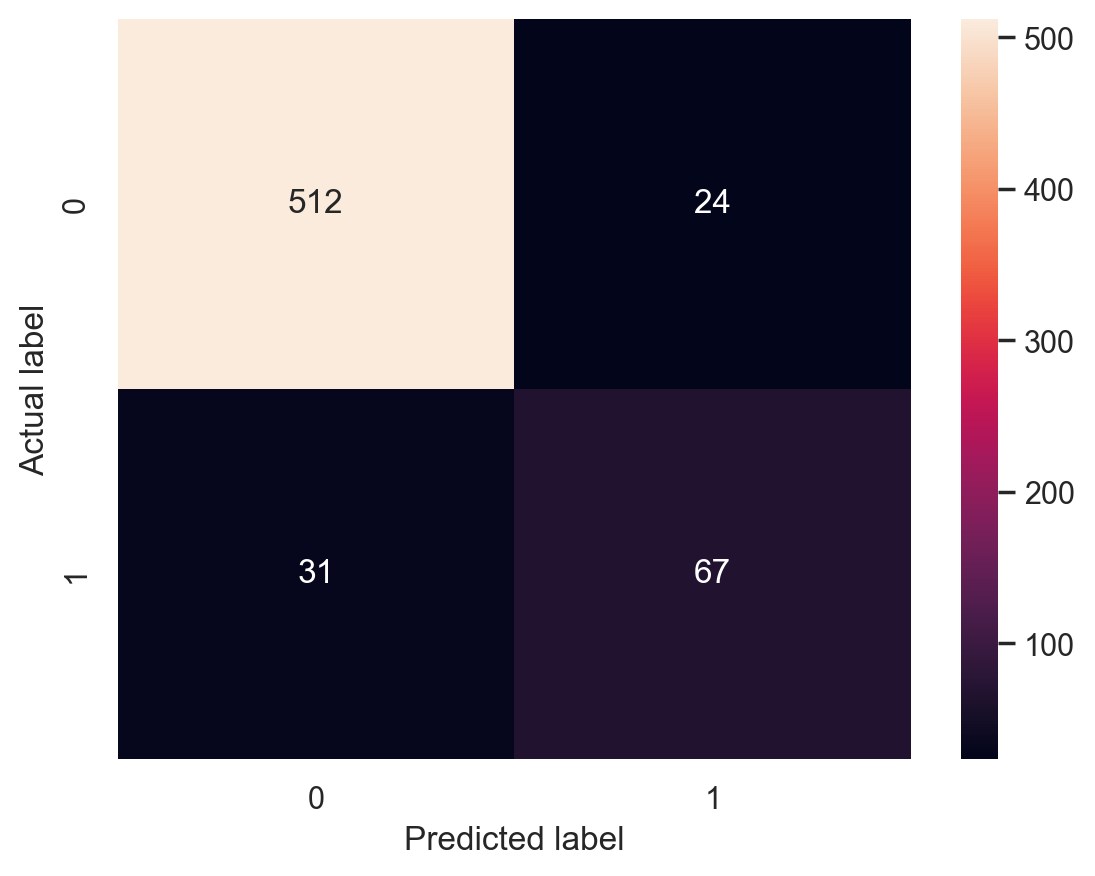

*******************************************
*********** Decision Tree *************
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       536
           1       0.71      0.61      0.66        98

    accuracy                           0.90       634
   macro avg       0.82      0.78      0.80       634
weighted avg       0.90      0.90      0.90       634

*******************************************
Log loss score 0.6
*******************************************
Confusion matrix


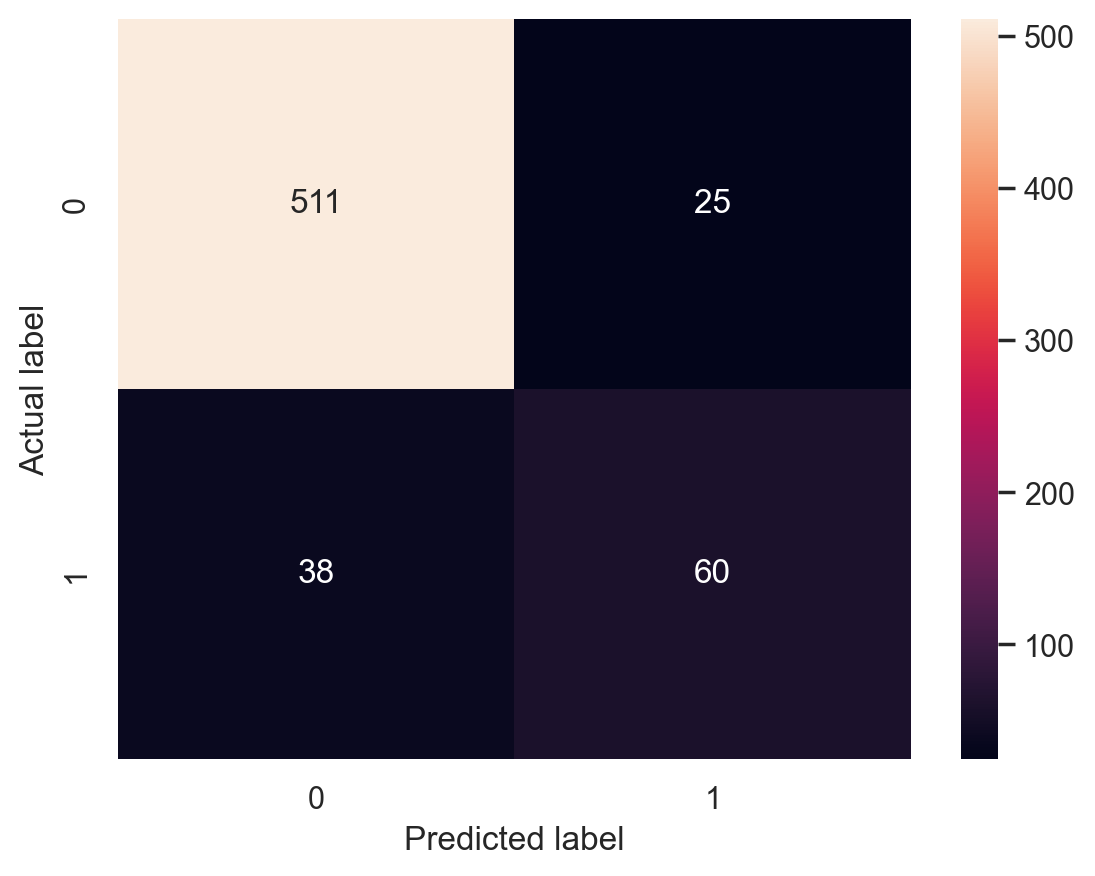

*******************************************
*********** Logistic Regression *************
              precision    recall  f1-score   support

           0       0.87      0.79      0.82       536
           1       0.22      0.34      0.27        98

    accuracy                           0.72       634
   macro avg       0.54      0.56      0.55       634
weighted avg       0.77      0.72      0.74       634

*******************************************
Log loss score 0.42
*******************************************
Confusion matrix


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


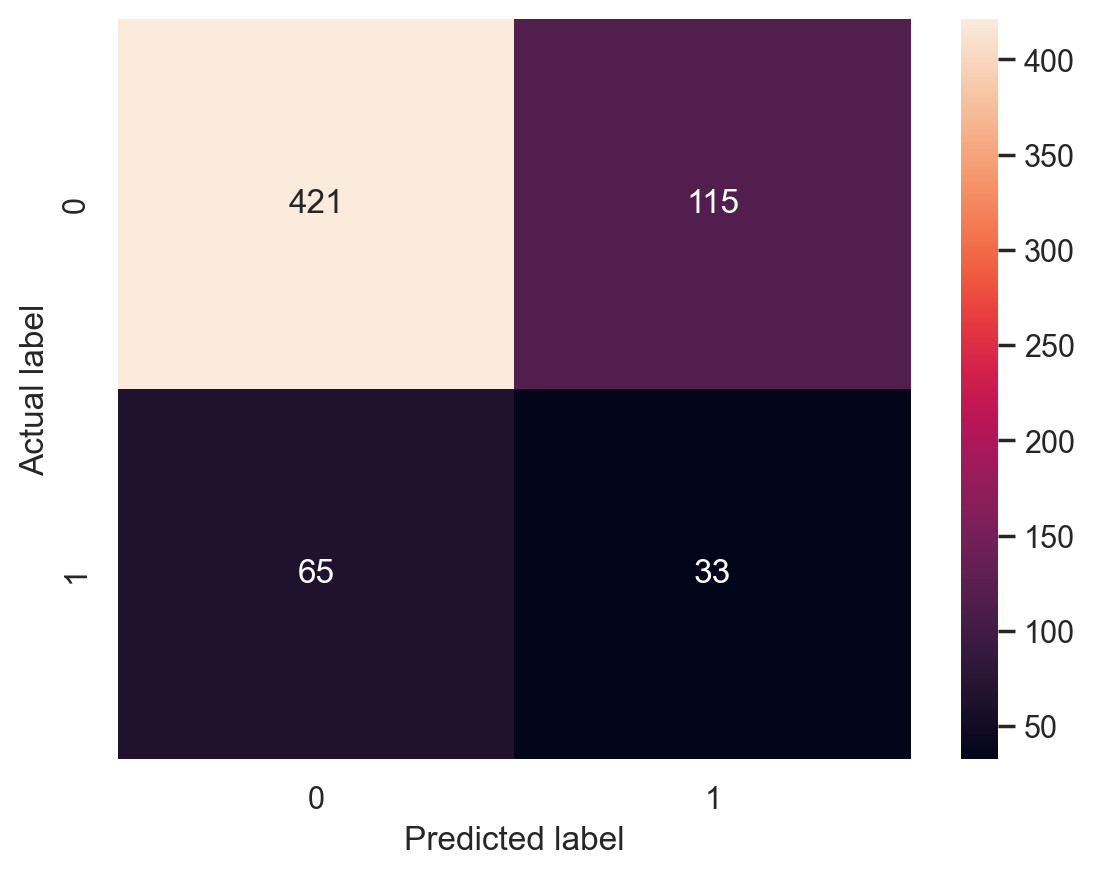

*******************************************
*********** XGBoost *************
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       536
           1       0.85      0.64      0.73        98

    accuracy                           0.93       634
   macro avg       0.89      0.81      0.85       634
weighted avg       0.92      0.93      0.92       634

*******************************************
Log loss score 0.24
*******************************************
Confusion matrix


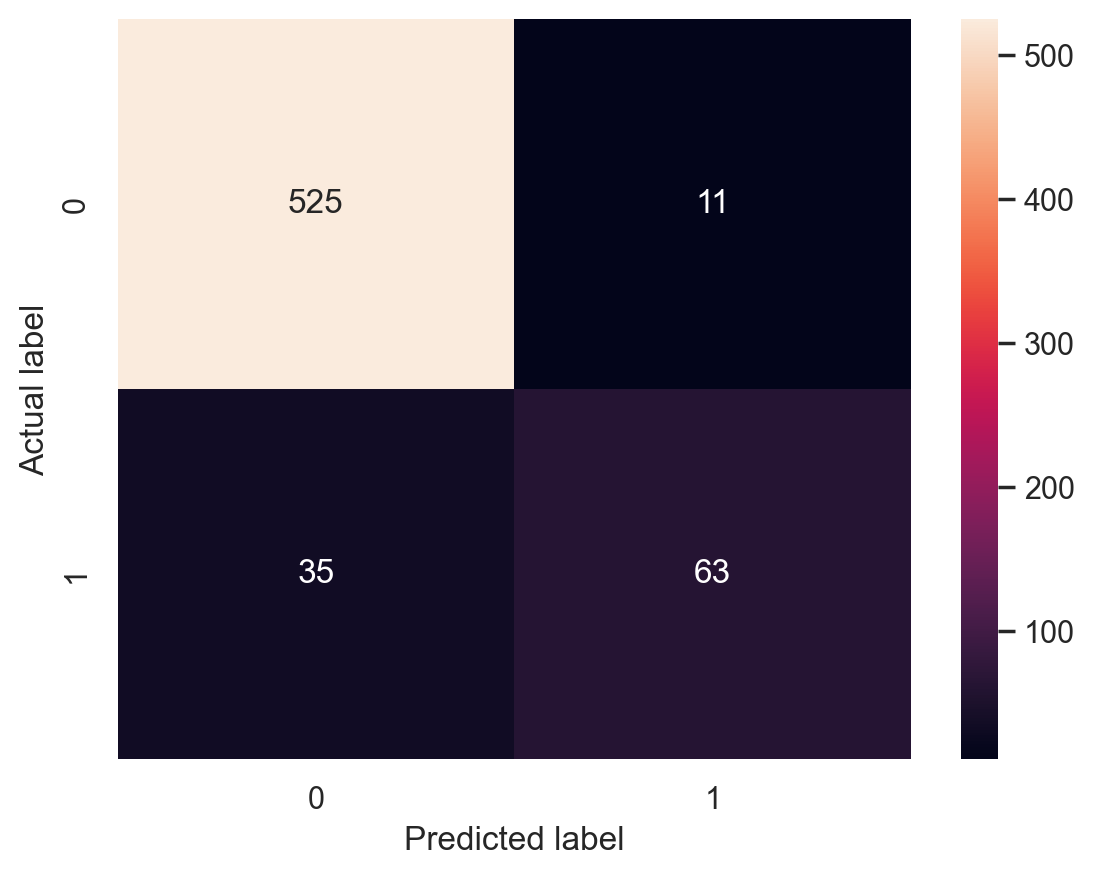

*******************************************


In [101]:
og_lr_threshold = 0.195009
og_dt_threshold = 0.294118
og_rf_threshold = 0.345588
og_xgb_threshold =  0.516375
Model_evaluation(og_clsModels
                 , clsModelsNm
                 , X_train
                 , y_train
                 , X_test
                 , y_test
                 , [og_rf_threshold
                    ,og_dt_threshold
                    , og_lr_threshold
                    , og_xgb_threshold] )


### Upsampling data

*********** Random Forest *************
              precision    recall  f1-score   support

           0       0.96      0.75      0.84       536
           1       0.37      0.83      0.51        98

    accuracy                           0.76       634
   macro avg       0.67      0.79      0.68       634
weighted avg       0.87      0.76      0.79       634

*******************************************
Log loss score 0.4
*******************************************
Confusion matrix


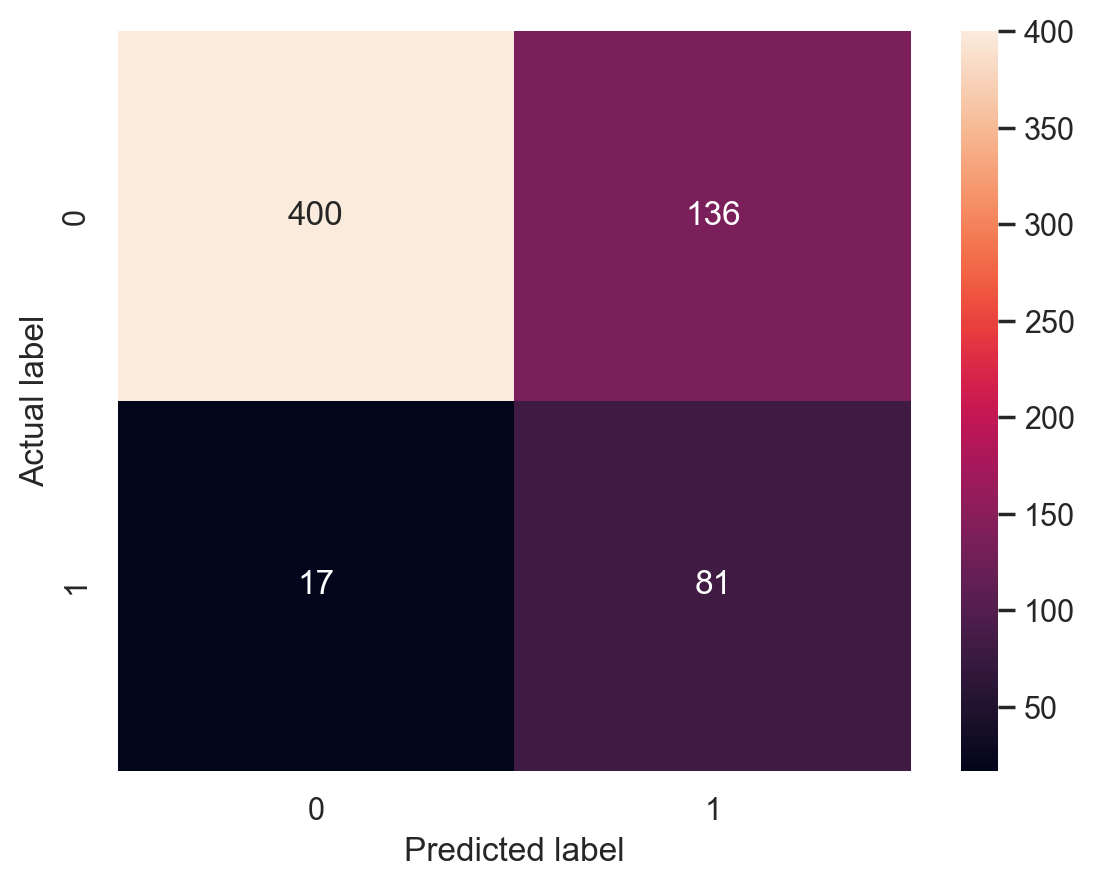

*******************************************
*********** Decision Tree *************
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       536
           1       0.53      0.71      0.61        98

    accuracy                           0.86       634
   macro avg       0.74      0.80      0.76       634
weighted avg       0.88      0.86      0.87       634

*******************************************
Log loss score 0.87
*******************************************
Confusion matrix


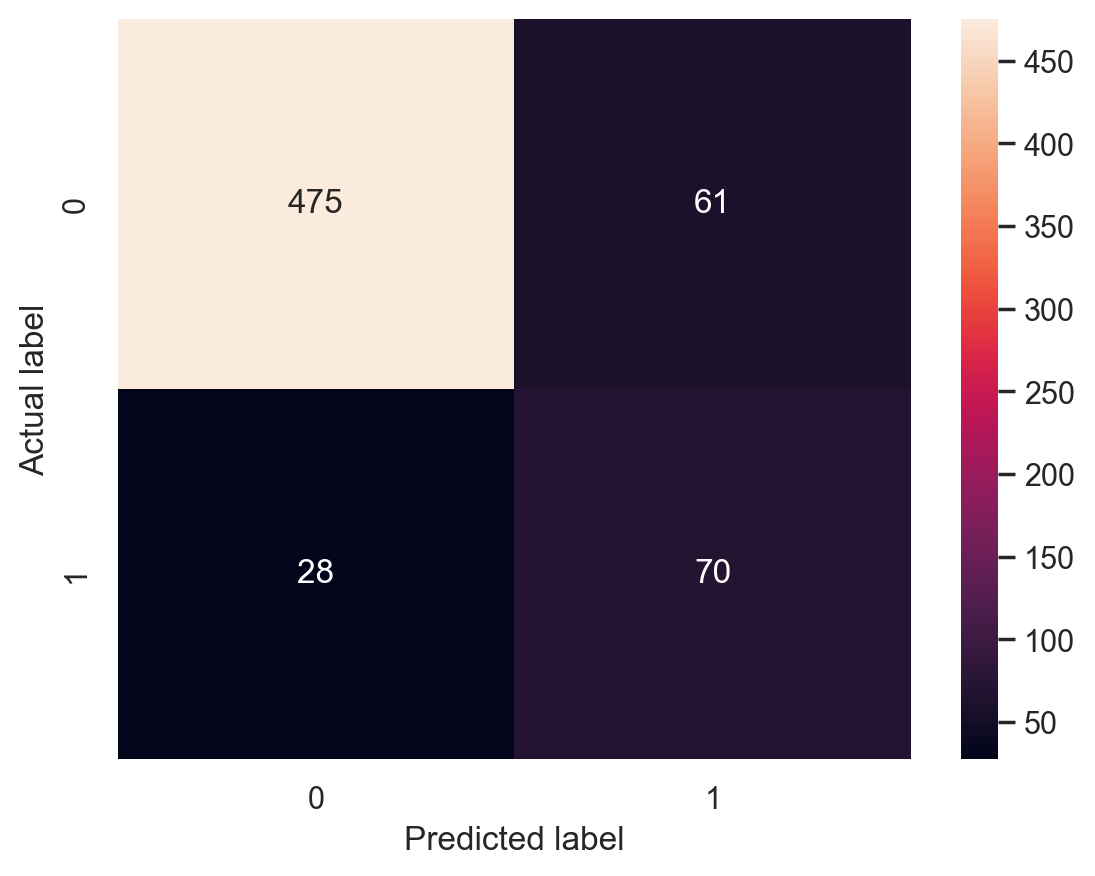

*******************************************
*********** Logistic Regression *************
              precision    recall  f1-score   support

           0       0.95      0.41      0.57       536
           1       0.21      0.88      0.34        98

    accuracy                           0.48       634
   macro avg       0.58      0.64      0.46       634
weighted avg       0.84      0.48      0.54       634

*******************************************
Log loss score 0.59
*******************************************
Confusion matrix


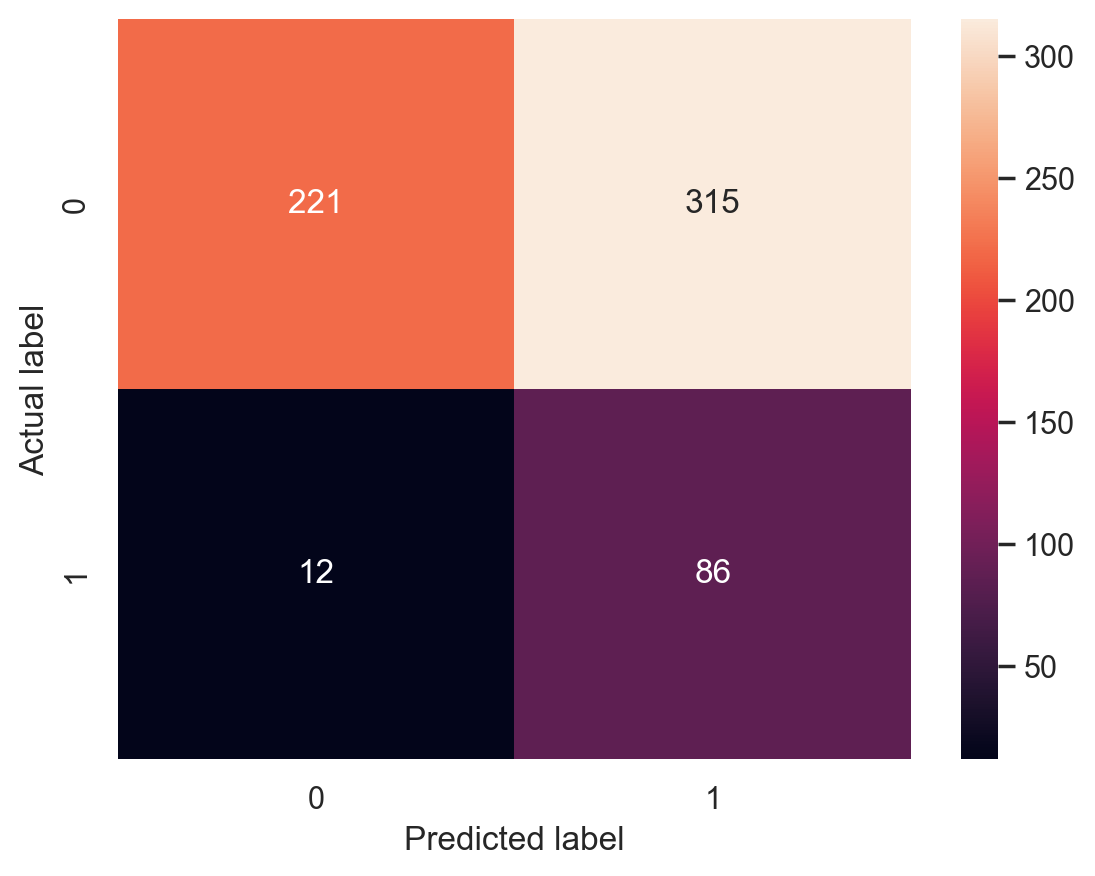

*******************************************
*********** XGBoost *************
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       536
           1       0.56      0.73      0.64        98

    accuracy                           0.87       634
   macro avg       0.76      0.82      0.78       634
weighted avg       0.89      0.87      0.88       634

*******************************************
Log loss score 0.3
*******************************************
Confusion matrix


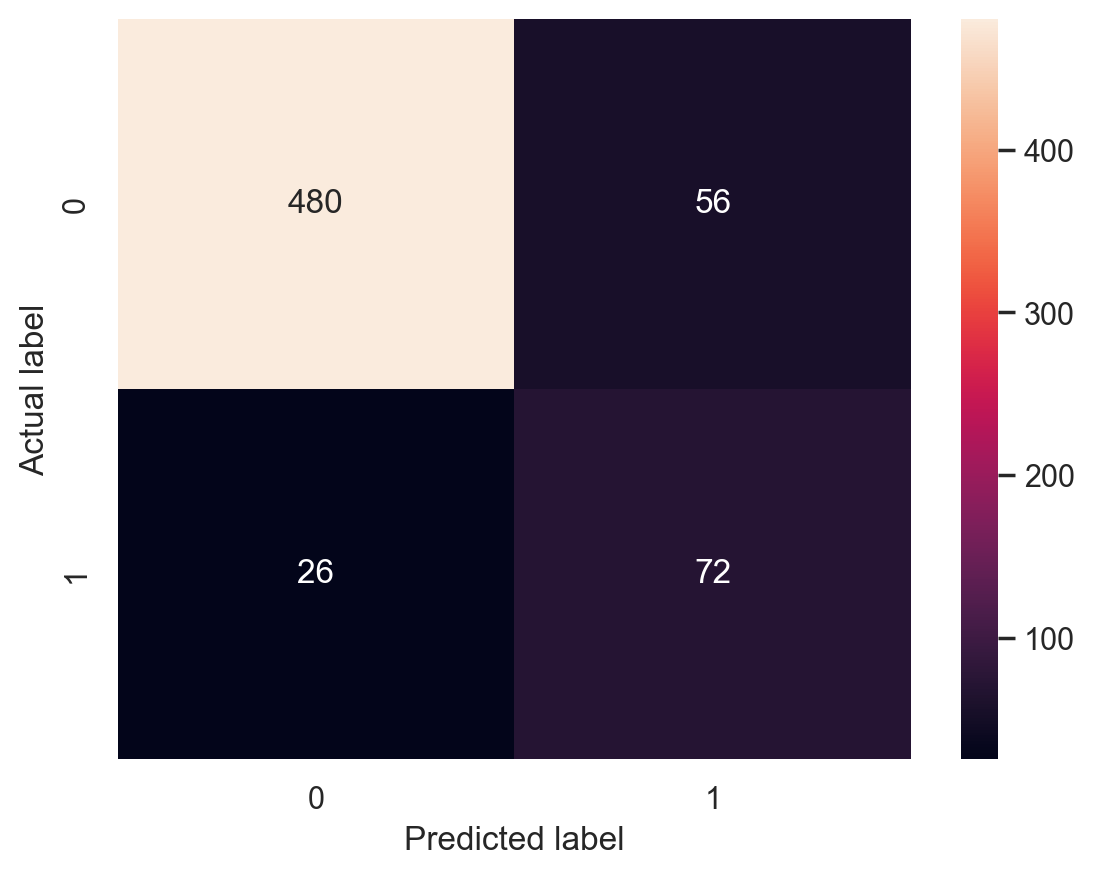

*******************************************


In [102]:
os_lr_threshold = 0.343299
os_dt_threshold = 0.495833
os_rf_threshold = 0.344945
os_xgb_threshold = 0.392403
Model_evaluation(os_clsModels
                 , clsModelsNm
                 , X_train_upsampled
                 , y_train_upsampled
                 , X_test
                 , y_test
                 , [os_rf_threshold
                    ,os_dt_threshold
                    , os_lr_threshold
                    , os_xgb_threshold] )


### Downsampling data

*********** Random Forest *************
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       536
           1       0.53      0.83      0.65        98

    accuracy                           0.86       634
   macro avg       0.75      0.85      0.78       634
weighted avg       0.90      0.86      0.87       634

*******************************************
Log loss score 0.39
*******************************************
Confusion matrix


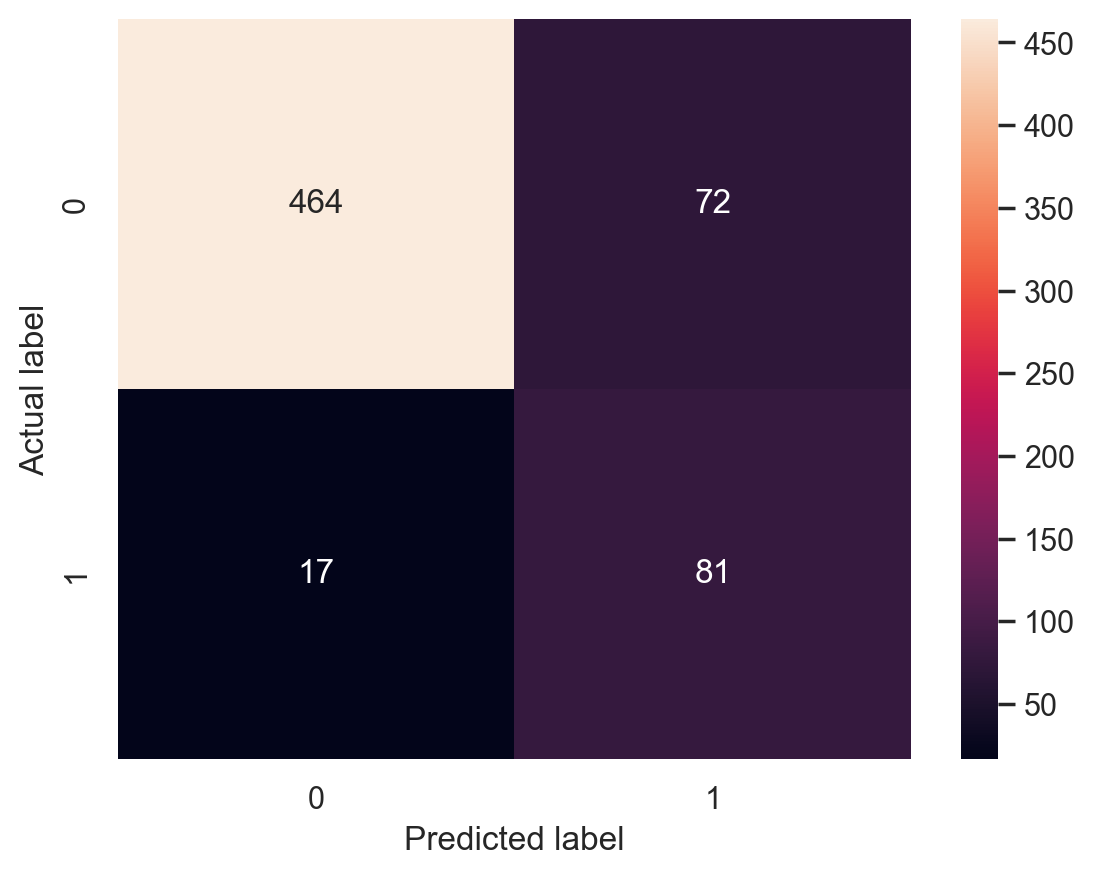

*******************************************
*********** Decision Tree *************
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       536
           1       0.52      0.78      0.62        98

    accuracy                           0.85       634
   macro avg       0.74      0.82      0.76       634
weighted avg       0.89      0.85      0.86       634

*******************************************
Log loss score 1.14
*******************************************
Confusion matrix


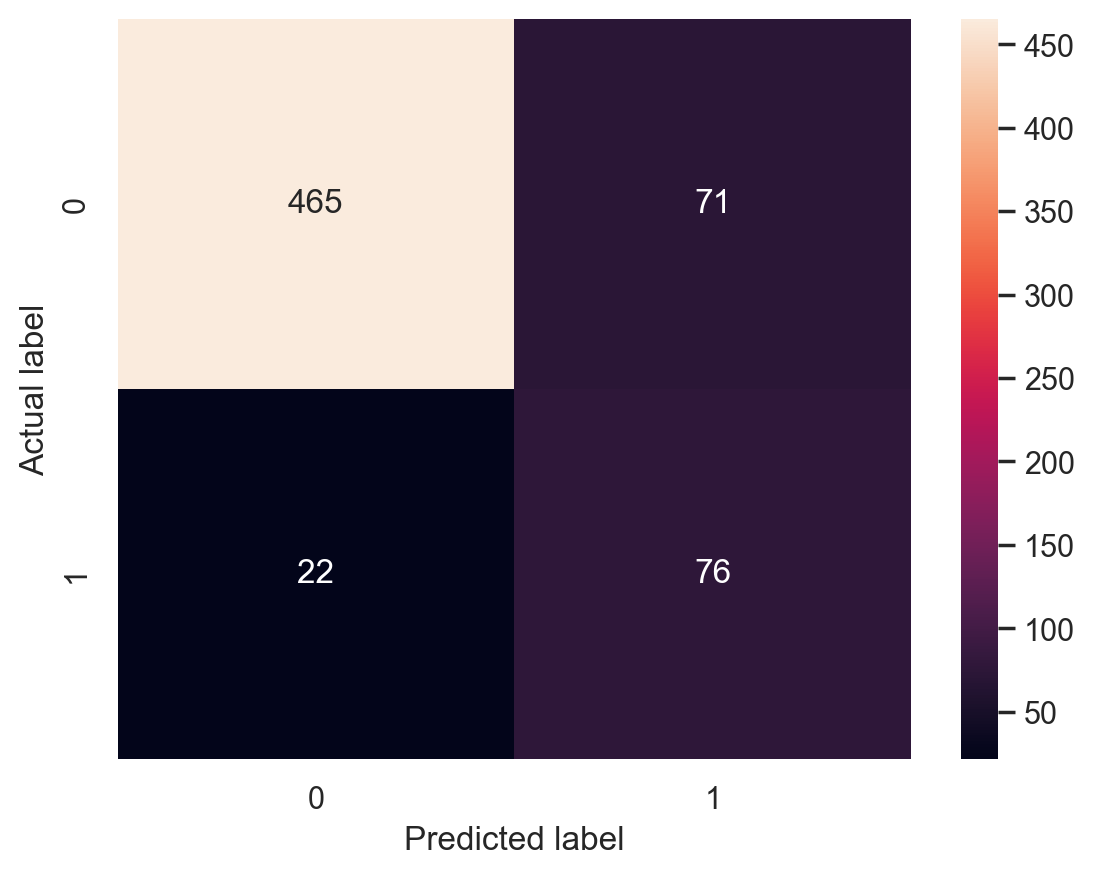

*******************************************
*********** Logistic Regression *************
              precision    recall  f1-score   support

           0       0.95      0.69      0.80       536
           1       0.32      0.80      0.46        98

    accuracy                           0.71       634
   macro avg       0.63      0.74      0.63       634
weighted avg       0.85      0.71      0.75       634

*******************************************
Log loss score 0.53
*******************************************
Confusion matrix


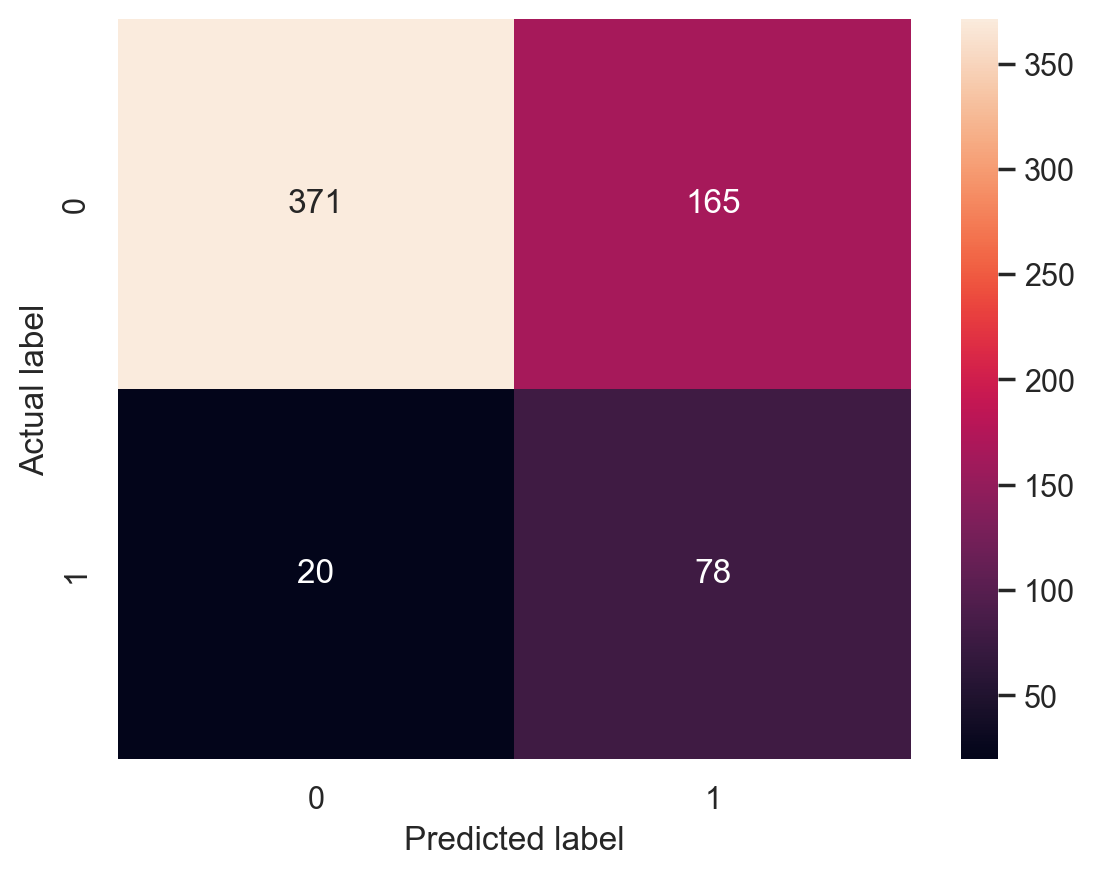

*******************************************
*********** XGBoost *************
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       536
           1       0.66      0.74      0.70        98

    accuracy                           0.90       634
   macro avg       0.81      0.84      0.82       634
weighted avg       0.91      0.90      0.90       634

*******************************************
Log loss score 0.38
*******************************************
Confusion matrix


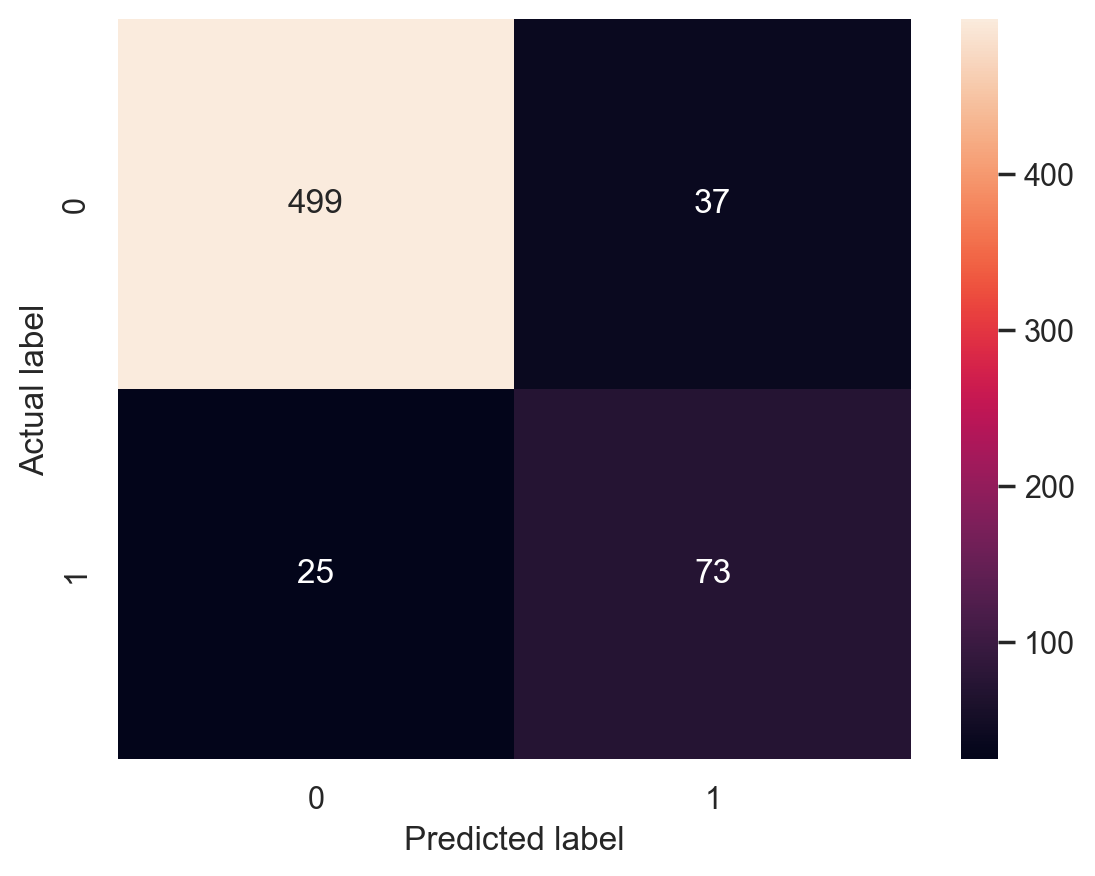

*******************************************


In [103]:
us_lr_threshold = 0.42778
us_dt_threshold = 0.473684
us_rf_threshold = 0.521469
us_xgb_threshold = 0.68994
Model_evaluation(us_clsModels
                 , clsModelsNm
                 , x_train_downsampled
                 , y_train_downsampled
                 , X_test
                 , y_test
                 , [us_rf_threshold
                    ,us_dt_threshold
                    , us_lr_threshold
                    , us_xgb_threshold] )


# Additional Material

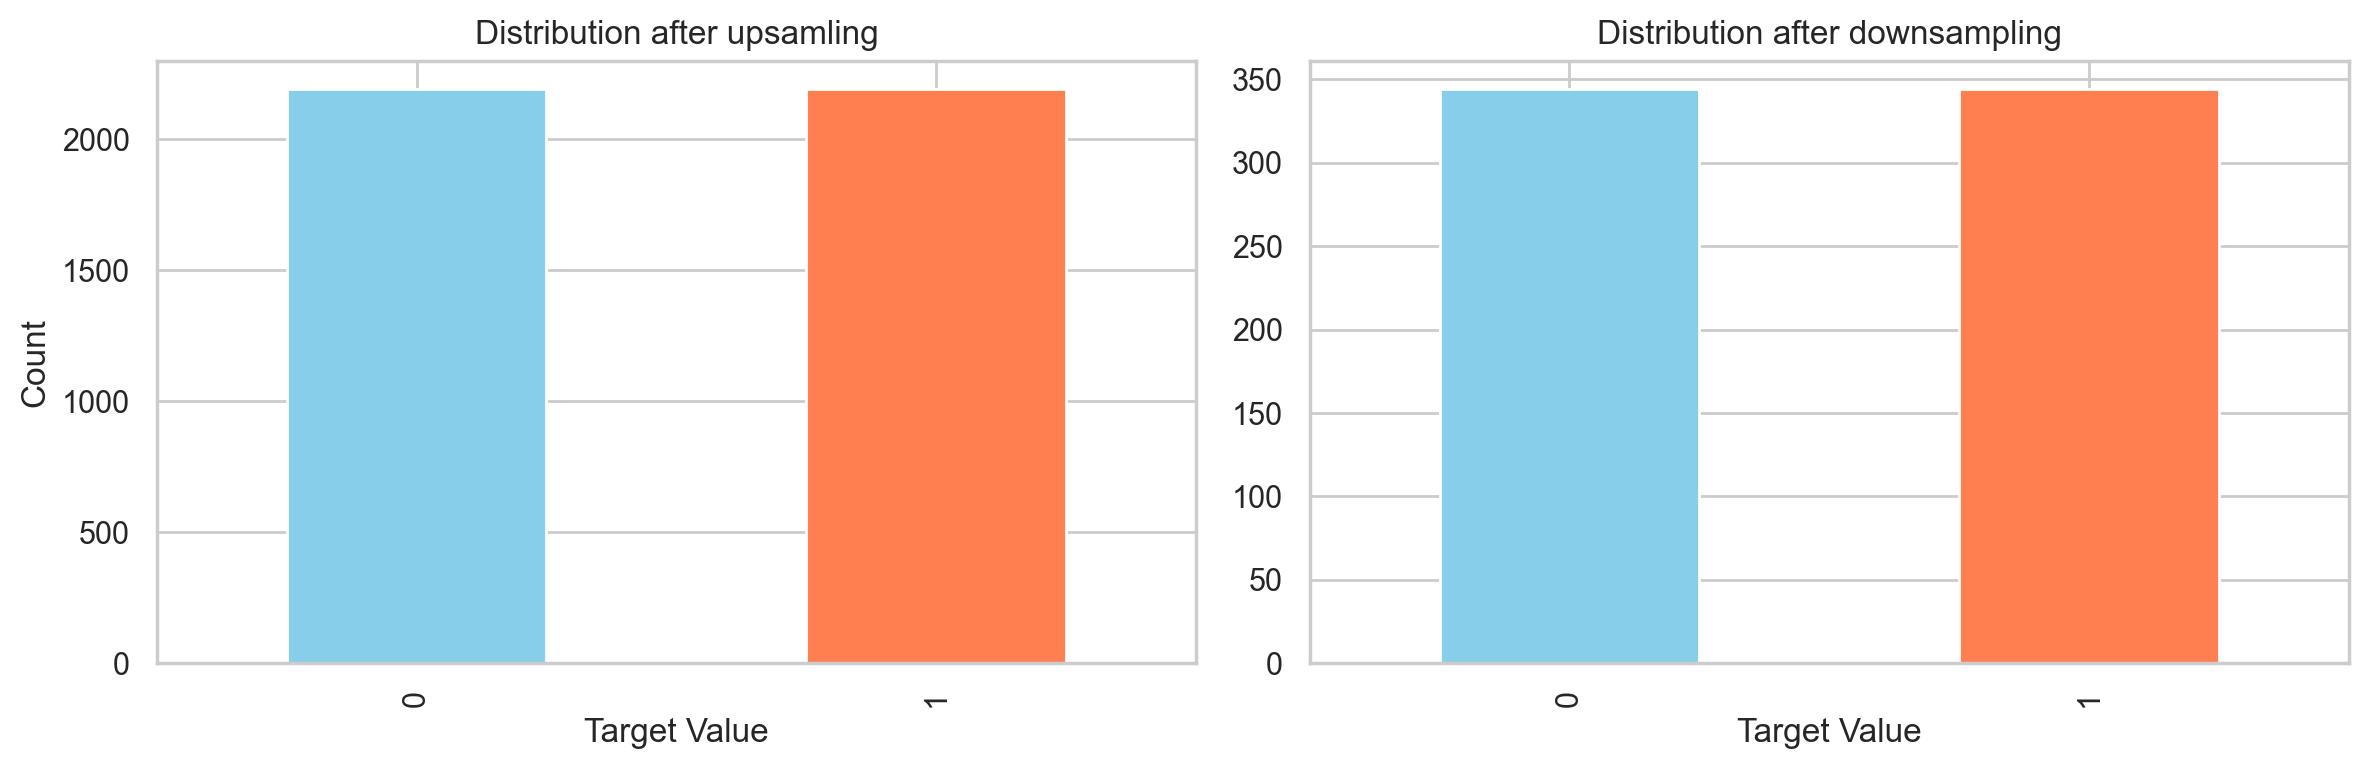

In [104]:
distribution_upsampled = y_train_upsampled.value_counts()
distribution_downsampled = y_train_downsampled.value_counts()
# Create subplots for side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot for y_train_upsampled
distribution_upsampled.plot(kind='bar', color=['skyblue', 'coral'], ax=axes[0])
axes[0].set_title('Distribution after upsamling')
axes[0].set_xlabel('Target Value')
axes[0].set_ylabel('Count')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['0', '1'])

# Plot for y_train_downsampled
distribution_downsampled.plot(kind='bar', color=['skyblue', 'coral'], ax=axes[1])
axes[1].set_title('Distribution after downsampling')
axes[1].set_xlabel('Target Value')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['0', '1'])

# Show the plot
plt.tight_layout()
plt.show()

In [109]:
data

Account length  International plan  Voice mail plan  \
0                128                   0                1   
1                107                   0                1   
2                137                   0                0   
3                 84                   1                0   
4                 75                   1                0   
...              ...                 ...              ...   
3328             192                   0                1   
3329              68                   0                0   
3330              28                   0                0   
3331             184                   1                0   
3332              74                   0                1   

      Number vmail messages  Total day charge  Total eve charge  \
0                        25             45.07             16.78   
1                        26             27.47             16.62   
2                         0             41.38             10.30   
3                         0             50.90              5.26   
4                         0             28.34             12.61   
...                     ...               ...               ...   
3328                     36             26.55             18.32   
3329                      0             39.29             13.04   
3330                      0             30.74             24.55   
3331                      0             36.35             13.57   
3332                     25             39.85             22.60   

      Total night charge  Total intl charge  Customer service calls  Churn  
0                  11.01               2.70                       1      0  
1                  11.45               3.70                       1      0  
2                   7.32               3.29                       0      0  
3                   8.86               1.78                       2      0  
4                   8.41               2.73                       3      0  
...                  ...                ...                     ...    ...  
3328               12.56               2.67                       2      0  
3329                8.61               2.59                       3      0  
3330                8.64               3.81                       2      0  
3331                6.26               1.35                       2      0  
3332               10.86               3.70                       0      0  

[3169 rows x 10 columns]